## Решение системы уравнений упругой динамики (одномерный случай)
#### с отражающими граничными условиями

In [28]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.interpolate import interp1d
%matplotlib inline

In [29]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)
h = (b - a) / n

Enter number of segments
100
Enter ends of segment
-1 1


$$
\frac{\partial \vec U}{\partial t} + A \frac{\partial \vec U}{\partial x} = 0
$$

Enter A

In [30]:
l = 1
m = 1
rho = 1

In [31]:
A = np.array([[0,0,0,-(l+2*m),0],[0,0,0,-l,0],[0,0,0,0,-m],[-1./rho,0,0,0,0],[0,0,-1./rho,0,0]])
As = [0 for i in range(n)]
for i in range(n):
    As[i] = A

In [32]:
np.shape(As)

(100, 5, 5)

In [33]:
lams = [0 for i in range(n)]
OMEGA_s = [0 for i in range(n)]
OMEGAs = [0 for i in range(n)]

In [34]:
for i in range(n):
    lam, OMEGA_ = LA.eig(As[i])
    lam = np.array([lam[2], lam[4], lam[0], lam[3], lam[1]])
    OMEGA_ = np.array([OMEGA_[:, 2], OMEGA_[:, 4], OMEGA_[:, 0], OMEGA_[:, 3], OMEGA_[:, 1]])
    OMEGA_ = np.transpose(OMEGA_)
    OMEGA = LA.inv(OMEGA_)
    lams[i] = lam
    OMEGA_s[i] = OMEGA_
    OMEGAs[i] = OMEGA

In [35]:
print lams[1]

[-1.73205081 -1.          0.          1.          1.73205081]


In [36]:
LAMBDAs = [0 for i in range(n)]
LAMBDA = np.zeros([5,5])
for j in range(n):
    for i in range(5):
        LAMBDA[i,i] = lams[j][i]
    LAMBDAs[j] = LAMBDA

In [37]:
np.shape(LAMBDAs)

(100, 5, 5)

In [38]:
TEMP = np.matmul(OMEGA_s[1], LAMBDAs[1])
print np.matmul(TEMP, OMEGAs[1])

[[ -1.54916829e-16   0.00000000e+00   0.00000000e+00  -3.00000000e+00
    0.00000000e+00]
 [  6.68533256e-17   0.00000000e+00   0.00000000e+00  -1.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.01465364e-17   0.00000000e+00
   -1.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00   0.00000000e+00  -6.85479099e-17
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.00000000e+00   0.00000000e+00
   -1.01465364e-17]]


In [39]:
nul = [0,0,0,0,0]

In [40]:
# tau = h / c *(X), такое что c*tau/h < 1
print 'Enter X for tau'
X = float(raw_input())

Enter X for tau
0.499


In [41]:
def f(x):
    if (a + 0.25*(b-a) <= x <= a + 0.5*(b-a)):
        return (x - (a + 0.25*(b-a))) / (0.25*(b-a))
    elif (a + 0.5*(b-a) <= x <= a + 0.75*(b-a)):
        return (x - (a + 0.75*(b-a))) / (-0.25*(b-a))
    else:
        return 0

In [42]:
U = np.zeros([10,n+1]) # решение
x = np.linspace(a, b, n+1) #сетка
xmid = np.zeros(n)
for i in range(n):
    xmid[i] = (x[i] + x[i+1])/2
Umid = np.zeros([10, n])

In [43]:
#for j in range(5):
for i in range(n+1):
    U[3][i] = f(x[i])
    U[8][i] = f(x[i])
for i in range(n):
    Umid[3][i] = f(xmid[i])

1.0


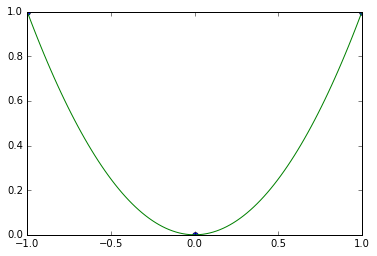

In [44]:
test = interp1d([-1, 0, 1], [1 ,0, 1], kind='quadratic')
print test(-1)
testx = np.linspace(-1, 1, 100)
testnew = test(testx)
plt.plot([-1, 0, 1], [1 ,0, 1], 'o', testx, testnew, '-')
plt.show()

In [45]:
right = interp1d(x, U[3])
right(0.135)

array(0.73)

In [46]:
print U[3]

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44  0.48
  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92  0.96
  1.    0.96  0.92  0.88  0.84  0.8   0.76  0.72  0.68  0.64  0.6   0.56
  0.52  0.48  0.44  0.4   0.36  0.32  0.28  0.24  0.2   0.16  0.12  0.08
  0.04 -0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


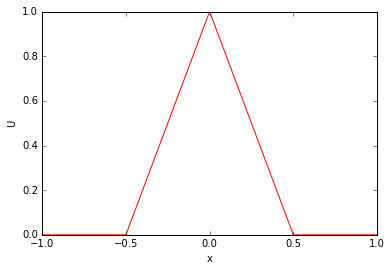

In [47]:
py.figure()
py.xlabel('x')
py.ylabel('U')
#py.ylim(0,1.1)
py.plot(x, U[3], 'r')
py.show()

In [48]:
lmax = max([max(lams[i]) for i in range(n)])
tau = h * X / lmax
print tau

0.00576195568651


In [49]:
result = []
result.append(list(U[3]))
x_ed = x[1:n]

In [50]:
print OMEGA[0]
print OMEGAs[0][0]

[ 0.60092521  0.          0.          1.040833    0.        ]
[ 0.60092521  0.          0.          1.040833    0.        ]


In [51]:
for i in range(1,n):
    '''print x[i-1], x[i] - lams[i-1][0]*tau, x[i+1]'''
    print x[i-1] <= x[i] - lams[i-1][0]*tau <= x[i+1]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [52]:
time = int(1.0 / tau) + 1
print time

174


In [53]:
lams[0]

array([-1.73205081, -1.        ,  0.        ,  1.        ,  1.73205081])

In [54]:
for j in range(2*time):
    Um = []
    Up = []
    Umid_new = []
    '''
    Um.append(list([0,0,0,0,0]))
    Up.append(list([0,0,0,0,0]))
    '''
    u01 = interp1d([x[0],xmid[0], x[1]], [U[0][0],Umid[0][0], U[0][1]], kind = 'quadratic')
    u02 = interp1d([x[0],xmid[0], x[1]], [U[1][0],Umid[1][0], U[1][1]], kind = 'quadratic')
    u03 = interp1d([x[0],xmid[0], x[1]], [U[2][0],Umid[2][0], U[2][1]], kind = 'quadratic')
    u04 = interp1d([x[0],xmid[0], x[1]], [U[3][0],Umid[3][0], U[3][1]], kind = 'quadratic')
    u05 = interp1d([x[0],xmid[0], x[1]], [U[4][0],Umid[4][0], U[4][1]], kind = 'quadratic')
    B = [OMEGAs[0][0], OMEGAs[0][1], OMEGAs[0][2], np.array([0,0,0,0,1]), np.array([0,0,0,1,0])]
    u0 = [u01(x[0] - lams[0][0]*tau), u02(x[0] - lams[0][0]*tau), u03(x[0] - lams[0][0]*tau), u04(x[0] - lams[0][0]*tau), u05(x[0] - lams[0][0]*tau)]
    right = [np.matmul(OMEGAs[0][0], u0)]
    u0 = [u01(x[0] - lams[0][1]*tau), u02(x[0] - lams[0][1]*tau), u03(x[0] - lams[0][1]*tau), u04(x[0] - lams[0][1]*tau), u05(x[0] - lams[0][1]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][1], u0))
    u0 = [u01(x[0] - lams[0][2]*tau), u02(x[0] - lams[0][2]*tau), u03(x[0] - lams[0][2]*tau), u04(x[0] - lams[0][2]*tau), u05(x[0] - lams[0][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][2], u0))
    right = np.append(right, [0,0])
    v = np.linalg.solve(B, right)
    Um.append(list(v))
    Up.append(list(v))
    #mid_point
    B = [np.append(OMEGAs[0][0], nul), np.append(OMEGAs[0][1], nul), np.append(OMEGAs[0][2], nul), np.append(nul, OMEGAs[0][2]), np.append(nul, OMEGAs[0][3]), np.append(nul, OMEGAs[0][4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
    u0 = [u01(xmid[0] - lams[0][0]*tau), u02(xmid[0] - lams[0][0]*tau), u03(xmid[0] - lams[0][0]*tau), u04(xmid[0] - lams[0][0]*tau), u05(xmid[0] - lams[0][0]*tau)]
    right = [np.matmul(OMEGAs[0][0], u0)]
    u0 = [u01(xmid[0] - lams[0][1]*tau), u02(xmid[0] - lams[0][1]*tau), u03(xmid[0] - lams[0][1]*tau), u04(xmid[0] - lams[0][1]*tau), u05(xmid[0] - lams[0][1]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][1], u0))
    u0 = [u01(xmid[0] - lams[0][2]*tau), u02(xmid[0] - lams[0][2]*tau), u03(xmid[0] - lams[0][2]*tau), u04(xmid[0] - lams[0][2]*tau), u05(xmid[0] - lams[0][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][2], u0))
    u0 = [u01(xmid[0] - lams[0][2]*tau), u02(xmid[0] - lams[0][2]*tau), u03(xmid[0] - lams[0][2]*tau), u04(xmid[0] - lams[0][2]*tau), u05(xmid[0] - lams[0][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][2], u0))
    u0 = [u01(xmid[0] - lams[0][3]*tau), u02(xmid[0] - lams[0][3]*tau), u03(xmid[0] - lams[0][3]*tau), u04(xmid[0] - lams[0][3]*tau), u05(xmid[0] - lams[0][3]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][3], u0))
    u0 = [u01(xmid[0] - lams[0][4]*tau), u02(xmid[0] - lams[0][4]*tau), u03(xmid[0] - lams[0][4]*tau), u04(xmid[0] - lams[0][4]*tau), u05(xmid[0] - lams[0][4]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][4], u0))
    right = np.append(right, [0,0,0,0])
    v = np.linalg.solve(B, right)
    Umid_new.append(list(v[:5]))
    for i in range(1,n):
        u01m = interp1d([x[i-1], xmid[i-1], x[i]], [U[0][i-1], Umid[0][i-1], U[0][i]], kind = 'quadratic')
        u02m = interp1d([x[i-1], xmid[i-1], x[i]], [U[1][i-1], Umid[1][i-1], U[1][i]], kind = 'quadratic')
        u03m = interp1d([x[i-1], xmid[i-1], x[i]], [U[2][i-1], Umid[2][i-1], U[2][i]], kind = 'quadratic')
        u04m = interp1d([x[i-1], xmid[i-1], x[i]], [U[3][i-1], Umid[3][i-1], U[3][i]], kind = 'quadratic')
        u05m = interp1d([x[i-1], xmid[i-1], x[i]], [U[4][i-1], Umid[4][i-1], U[4][i]], kind = 'quadratic')
        u01p = interp1d([x[i], xmid[i], x[i+1]], [U[0][i], Umid[0][i], U[0][i+1]], kind = 'quadratic')
        u02p = interp1d([x[i], xmid[i], x[i+1]], [U[1][i], Umid[1][i], U[1][i+1]], kind = 'quadratic')
        u03p = interp1d([x[i], xmid[i], x[i+1]], [U[2][i], Umid[2][i], U[2][i+1]], kind = 'quadratic')
        u04p = interp1d([x[i], xmid[i], x[i+1]], [U[3][i], Umid[3][i], U[3][i+1]], kind = 'quadratic')
        u05p = interp1d([x[i], xmid[i], x[i+1]], [U[4][i], Umid[4][i], U[4][i+1]], kind = 'quadratic')
        B = [np.append(OMEGAs[i][0], nul), np.append(OMEGAs[i][1], nul), np.append(OMEGAs[i][2], nul), np.append(nul, OMEGAs[i-1][2]), np.append(nul, OMEGAs[i-1][3]), np.append(nul, OMEGAs[i-1][4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
        u0 = [u01p(x[i] - lams[i][0]*tau), u02p(x[i] - lams[i][0]*tau), u03p(x[i] - lams[i][0]*tau), u04p(x[i] - lams[i][0]*tau), u05p(x[i] - lams[i][0]*tau)]
        right = [np.matmul(OMEGAs[i][0], u0)]
        u0 = [u01p(x[i] - lams[i][1]*tau), u02p(x[i] - lams[i][1]*tau), u03p(x[i] - lams[i][1]*tau), u04p(x[i] - lams[i][1]*tau), u05p(x[i] - lams[i][1]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][1], u0))
        u0 = [u01p(x[i] - lams[i][2]*tau), u02p(x[i] - lams[i][2]*tau), u03p(x[i] - lams[i][2]*tau), u04p(x[i] - lams[i][2]*tau), u05p(x[i] - lams[i][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][2], u0))
        u0 = [u01m(x[i] - lams[i-1][2]*tau), u02m(x[i] - lams[i-1][2]*tau), u03m(x[i] - lams[i-1][2]*tau), u04m(x[i] - lams[i-1][2]*tau), u05m(x[i] - lams[i-1][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][2], u0))
        u0 = [u01m(x[i] - lams[i-1][3]*tau), u02m(x[i] - lams[i-1][3]*tau), u03m(x[i] - lams[i-1][3]*tau), u04m(x[i] - lams[i-1][3]*tau), u05m(x[i] - lams[i-1][3]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][3], u0))
        u0 = [u01m(x[i] - lams[i-1][4]*tau), u02m(x[i] - lams[i-1][4]*tau), u03m(x[i] - lams[i-1][4]*tau), u04m(x[i] - lams[i-1][4]*tau), u05m(x[i] - lams[i-1][4]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][4], u0))
        right = np.append(right, [0,0,0,0])
        v = np.linalg.solve(B, right)
        Up.append(list(v[:5]))
        Um.append(list(v[5:]))
        #mid_point
        B = [np.append(OMEGAs[i][0], nul), np.append(OMEGAs[i][1], nul), np.append(OMEGAs[i][2], nul), np.append(nul, OMEGAs[i][2]), np.append(nul, OMEGAs[i][3]), np.append(nul, OMEGAs[i][4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
        u0 = [u01p(xmid[i] - lams[i][0]*tau), u02p(xmid[i] - lams[i][0]*tau), u03p(xmid[i] - lams[i][0]*tau), u04p(xmid[i] - lams[i][0]*tau), u05p(xmid[i] - lams[i][0]*tau)]
        right = [np.matmul(OMEGAs[i][0], u0)]
        u0 = [u01p(xmid[i] - lams[i][1]*tau), u02p(xmid[i] - lams[i][1]*tau), u03p(xmid[i] - lams[i][1]*tau), u04p(xmid[i] - lams[i][1]*tau), u05p(xmid[i] - lams[i][1]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][1], u0))
        u0 = [u01p(xmid[i] - lams[i][2]*tau), u02p(xmid[i] - lams[i][2]*tau), u03p(xmid[i] - lams[i][2]*tau), u04p(xmid[i] - lams[i][2]*tau), u05p(xmid[i] - lams[i][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][2], u0))
        u0 = [u01p(xmid[i] - lams[i][2]*tau), u02p(xmid[i] - lams[i][2]*tau), u03p(xmid[i] - lams[i][2]*tau), u04p(xmid[i] - lams[i][2]*tau), u05p(xmid[i] - lams[i][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][2], u0))
        u0 = [u01p(xmid[i] - lams[i][3]*tau), u02p(xmid[i] - lams[i][3]*tau), u03p(xmid[i] - lams[i][3]*tau), u04p(xmid[i] - lams[i][3]*tau), u05p(xmid[i] - lams[i][3]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][3], u0))
        u0 = [u01p(xmid[i] - lams[i][4]*tau), u02p(xmid[i] - lams[i][4]*tau), u03p(xmid[i] - lams[i][4]*tau), u04p(xmid[i] - lams[i][4]*tau), u05p(xmid[i] - lams[i][4]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][4], u0))
        right = np.append(right, [0,0,0,0])
        v = np.linalg.solve(B, right)
        Umid_new.append(list(v[:5]))
    u01 = interp1d([x[n-1],xmid[n-1], x[n]], [U[0][n-1],Umid[0][n-1], U[0][n]], kind = 'quadratic')
    u02 = interp1d([x[n-1],xmid[n-1], x[n]], [U[1][n-1],Umid[1][n-1], U[1][n]], kind = 'quadratic')
    u03 = interp1d([x[n-1],xmid[n-1], x[n]], [U[2][n-1],Umid[2][n-1], U[2][n]], kind = 'quadratic')
    u04 = interp1d([x[n-1],xmid[n-1], x[n]], [U[3][n-1],Umid[3][n-1], U[3][n]], kind = 'quadratic')
    u05 = interp1d([x[n-1],xmid[n-1], x[n]], [U[4][n-1],Umid[4][n-1], U[4][n]], kind = 'quadratic')
    B = [OMEGAs[n-1][2], OMEGAs[n-1][3], OMEGAs[n-1][4], np.array([0,0,0,0,1]), np.array([0,0,0,1,0])]
    u0 = [u01(x[n] - lams[n-1][2]*tau), u02(x[n] - lams[n-1][2]*tau), u03(x[n] - lams[n-1][2]*tau), u04(x[n] - lams[n-1][2]*tau), u05(x[n] - lams[n-1][2]*tau)]
    right = [np.matmul(OMEGAs[n-1][2], u0)]
    u0 = [u01(x[n] - lams[n-1][3]*tau), u02(x[n] - lams[n-1][3]*tau), u03(x[n] - lams[n-1][3]*tau), u04(x[n] - lams[n-1][3]*tau), u05(x[n] - lams[n-1][3]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][3], u0))
    u0 = [u01(x[n] - lams[n-1][4]*tau), u02(x[n] - lams[n-1][4]*tau), u03(x[n] - lams[n-1][4]*tau), u04(x[n] - lams[n-1][4]*tau), u05(x[n] - lams[n-1][4]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][4], u0))
    right = np.append(right, [0,0])
    v = np.linalg.solve(B, right)
    Um.append(list(v))
    Up.append(list(v))
    '''
    #mid_point
    B = [np.append(OMEGAs[n-1][0], nul), np.append(OMEGAs[n-1][1], nul), np.append(OMEGAs[n-1][2], nul), np.append(nul, OMEGAs[n-1][2]), np.append(nul, OMEGAs[n-1][3]), np.append(nul, OMEGAs[n-1][4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
    u0 = [u01(xmid[n-1] - lams[n-1][0]*tau), u02(xmid[n-1] - lams[n-1][0]*tau), u03(xmid[n-1] - lams[n-1][0]*tau), u04(xmid[n-1] - lams[n-1][0]*tau), u05(xmid[n-1] - lams[n-1][0]*tau)]
    right = [np.matmul(OMEGAs[n-1][0], u0)]
    u0 = [u01(xmid[n-1] - lams[n-1][1]*tau), u02(xmid[n-1] - lams[n-1][1]*tau), u03(xmid[n-1] - lams[n-1][1]*tau), u04(xmid[n-1] - lams[n-1][1]*tau), u05(xmid[n-1] - lams[n-1][1]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][1], u0))
    u0 = [u01(xmid[n-1] - lams[n-1][2]*tau), u02(xmid[n-1] - lams[n-1][2]*tau), u03(xmid[n-1] - lams[n-1][2]*tau), u04(xmid[n-1] - lams[n-1][2]*tau), u05(xmid[n-1] - lams[n-1][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][2], u0))
    u0 = [u01(xmid[n-1] - lams[n-1][2]*tau), u02(xmid[n-1] - lams[n-1][2]*tau), u03(xmid[n-1] - lams[n-1][2]*tau), u04(xmid[n-1] - lams[n-1][2]*tau), u05(xmid[n-1] - lams[n-1][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][2], u0))
    u0 = [u01(xmid[n-1] - lams[n-1][3]*tau), u02(xmid[n-1] - lams[n-1][3]*tau), u03(xmid[n-1] - lams[n-1][3]*tau), u04(xmid[n-1] - lams[n-1][3]*tau), u05(xmid[n-1] - lams[n-1][3]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][3], u0))
    u0 = [u01(xmid[n-1] - lams[n-1][4]*tau), u02(xmid[n-1] - lams[n-1][4]*tau), u03(xmid[n-1] - lams[n-1][4]*tau), u04(xmid[n-1] - lams[n-1][4]*tau), u05(xmid[n-1] - lams[n-1][4]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][4], u0))
    right = np.append(right, [0,0,0,0])
    v = np.linalg.solve(B, right)
    Umid_new.append(list(v[:5]))
    '''
    for i in range(5):
        U[i] = np.array(Um)[:, i]
        Umid[i] = np.array(Umid_new)[:, i]
    result.append(list(U[3]))

[-1.0, 1.0, -1, 1]

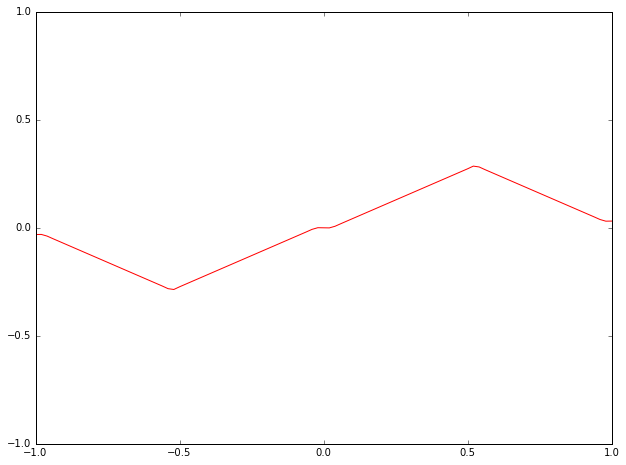

In [55]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])
axis.clear()
axis.plot(x, np.array(Um)[:, 1], 'r') #, x, result[1][i], 'b')
axis.axis([a, b, -1, 1])


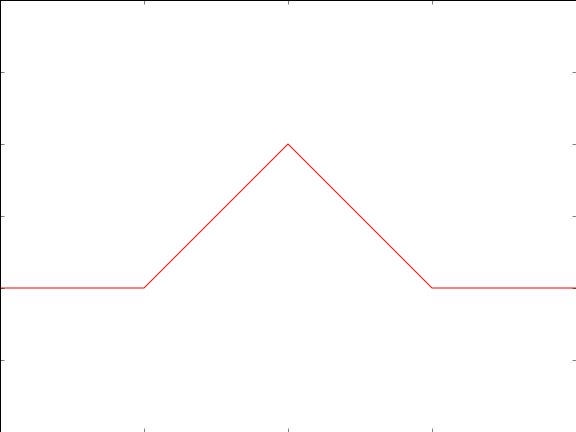
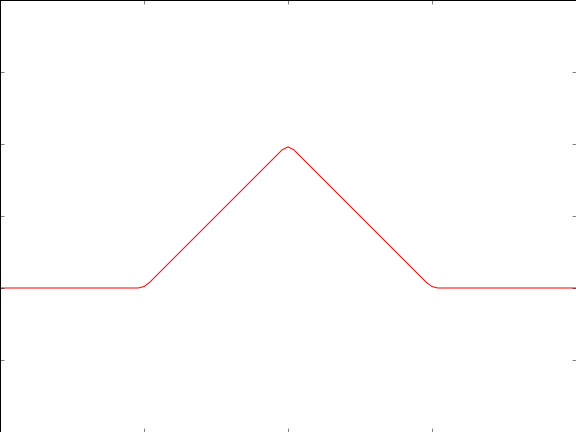
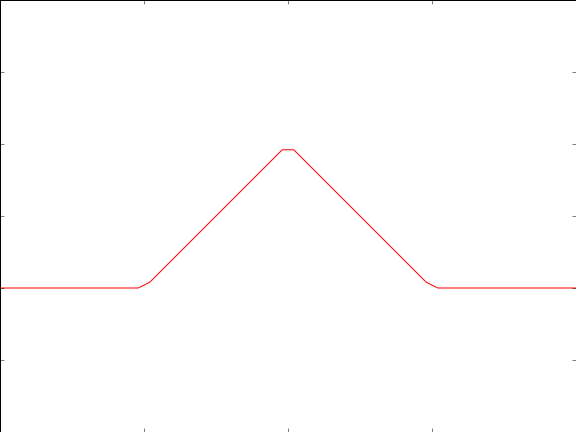
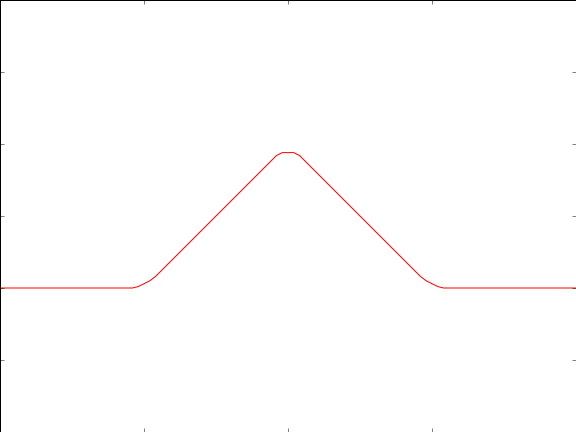
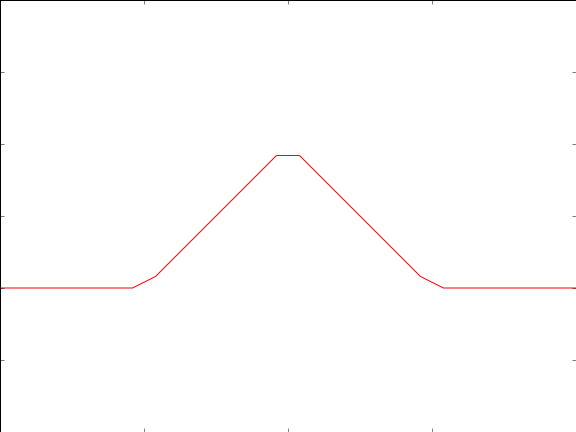
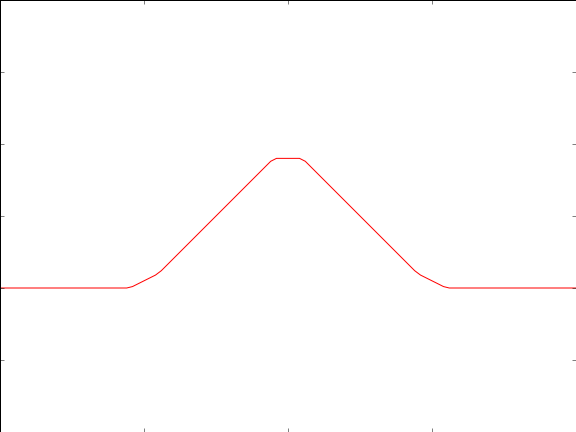
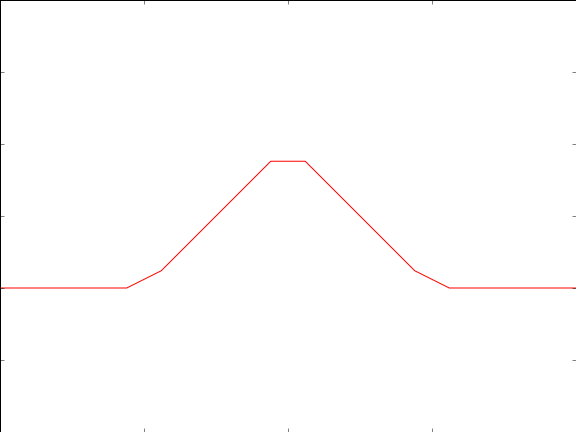
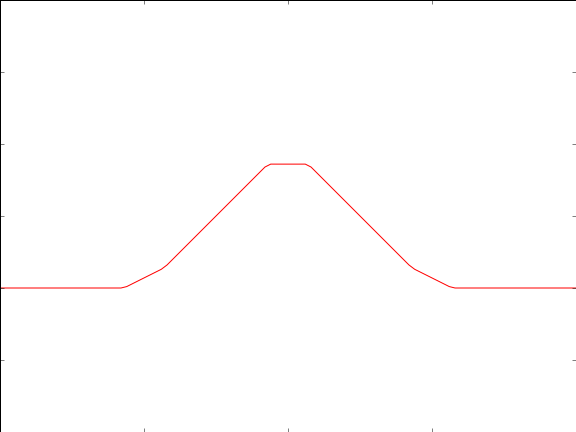
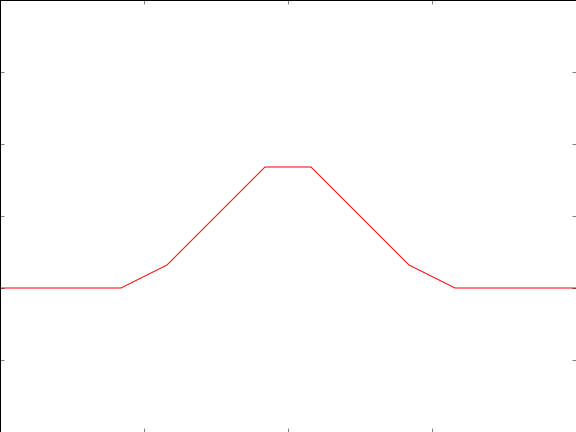
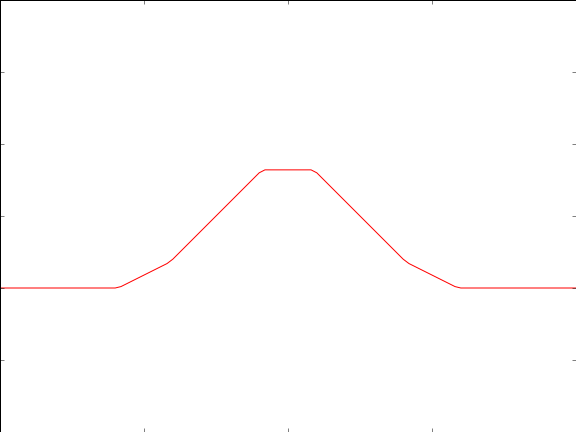
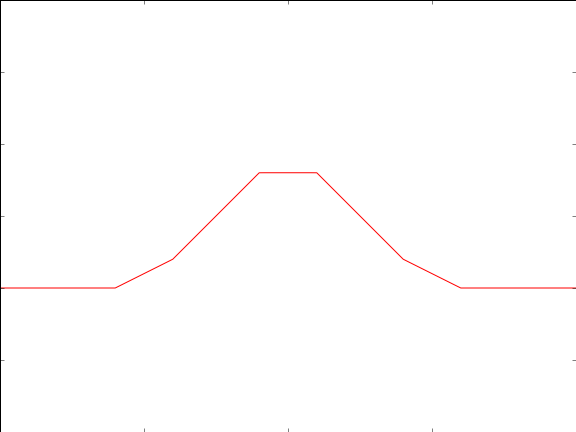
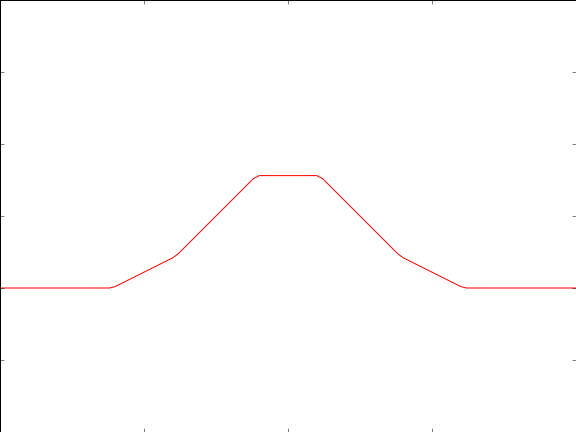
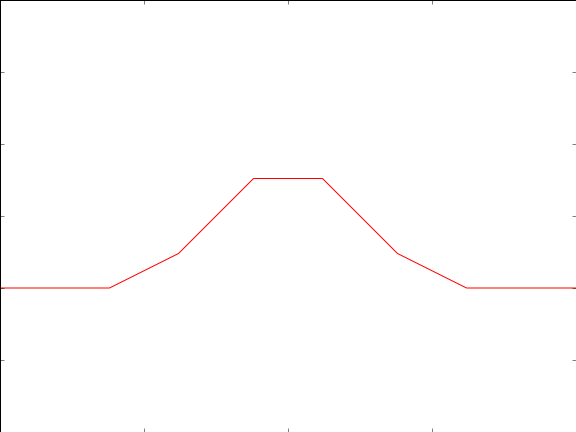
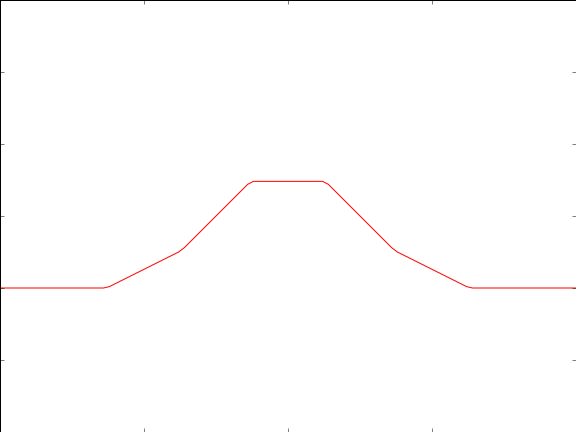
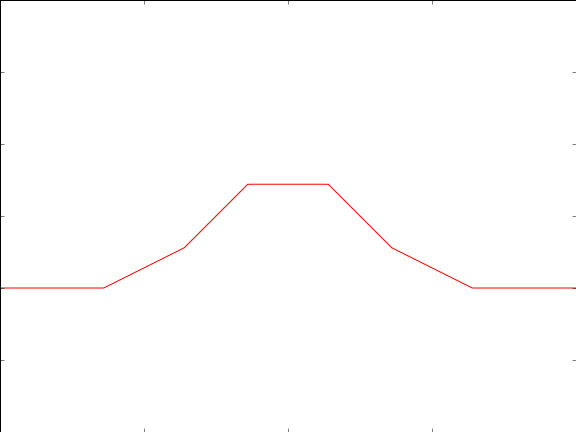
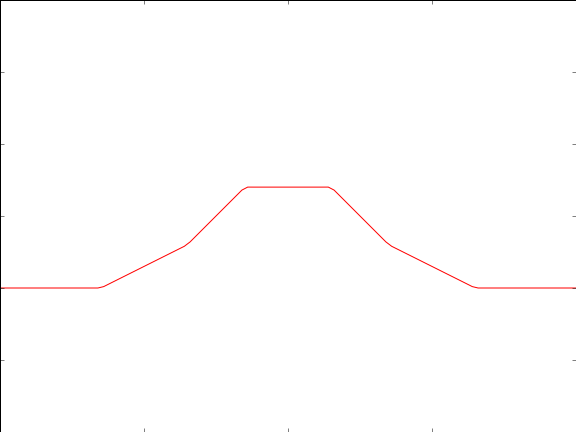
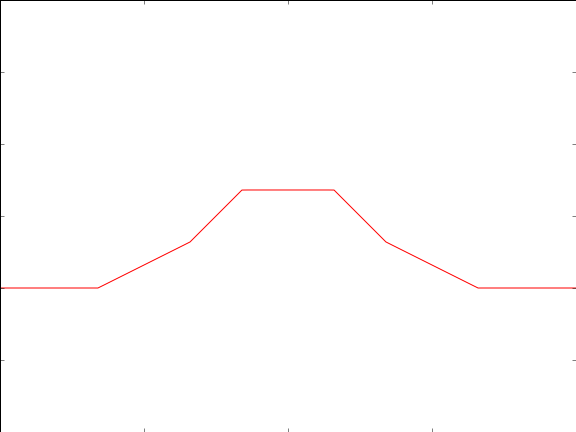
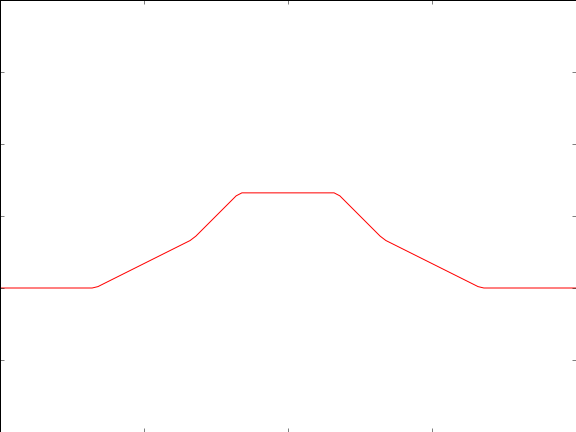
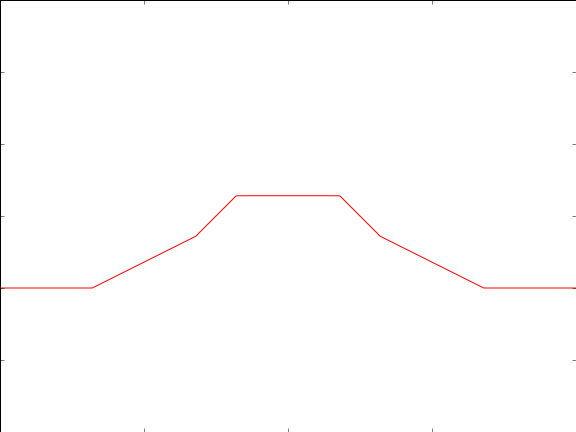
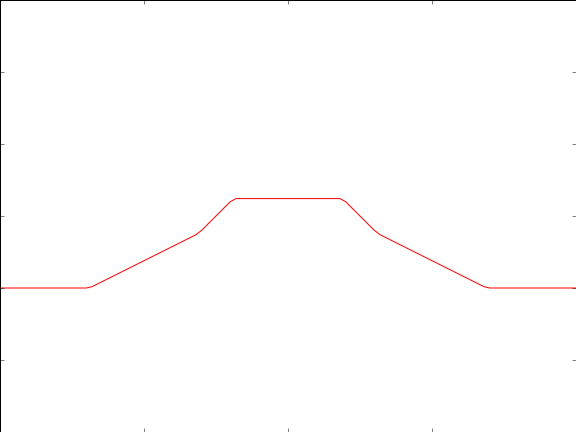
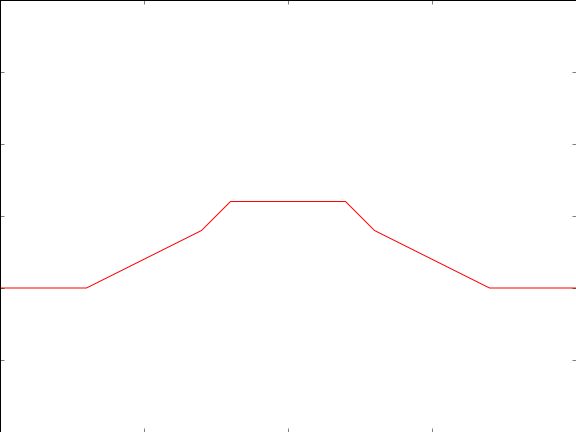
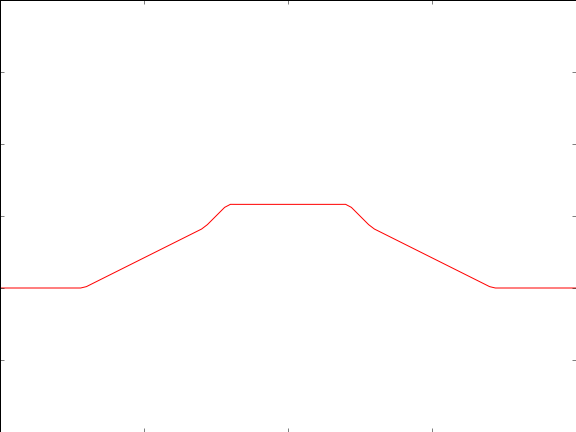
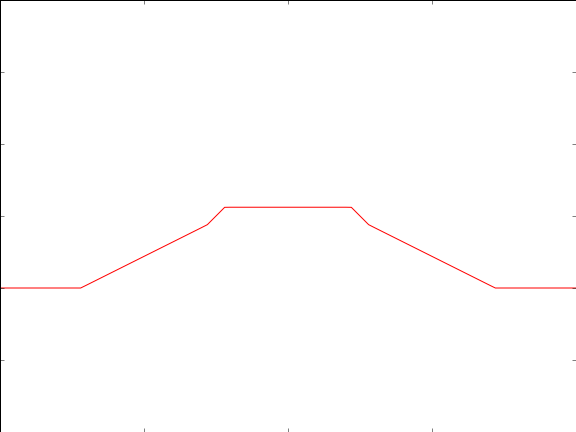
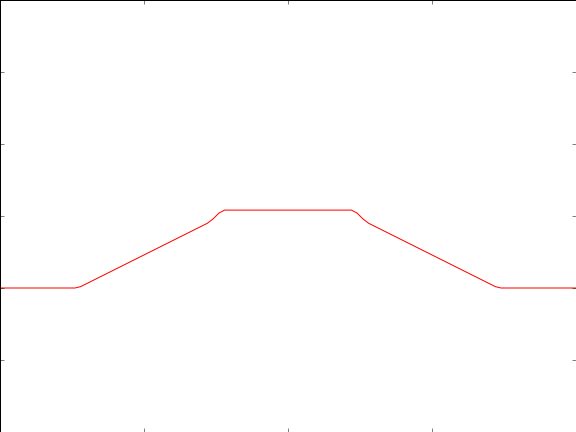
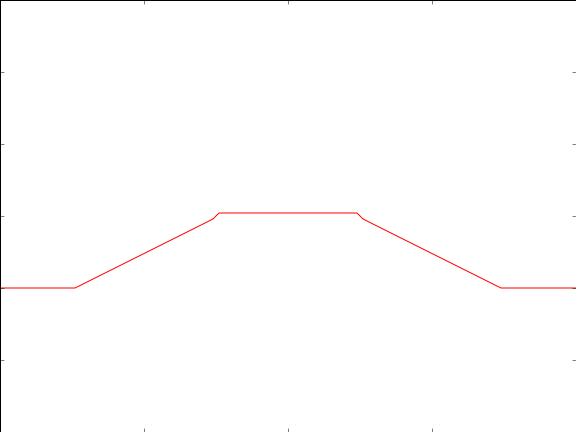
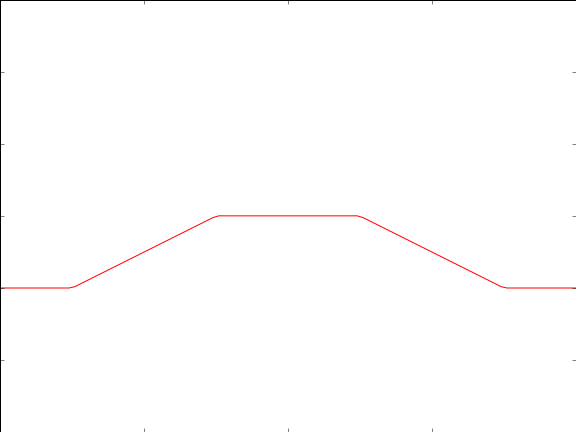
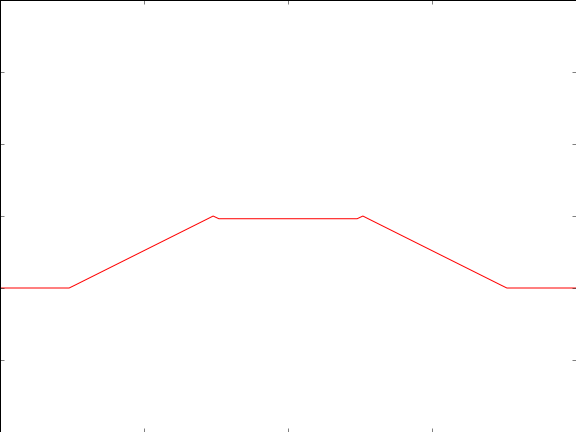
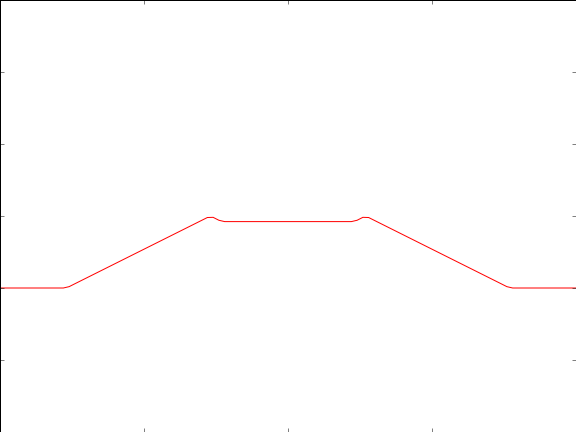
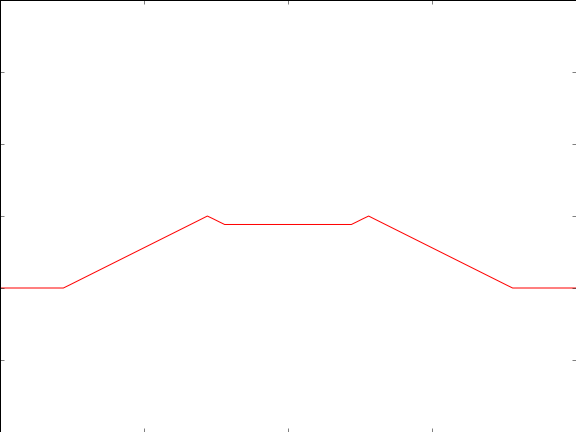
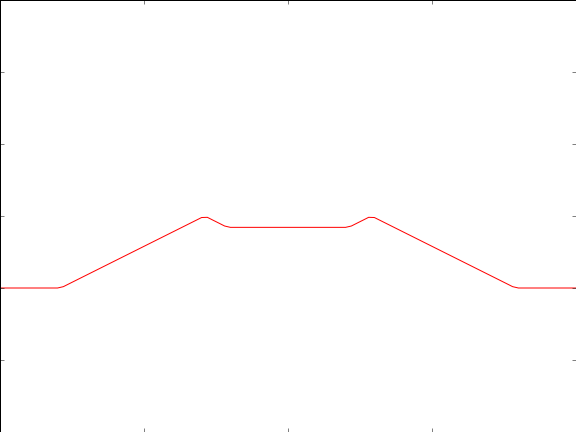
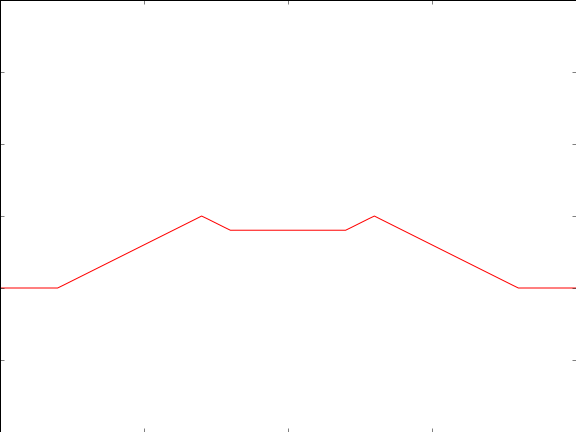
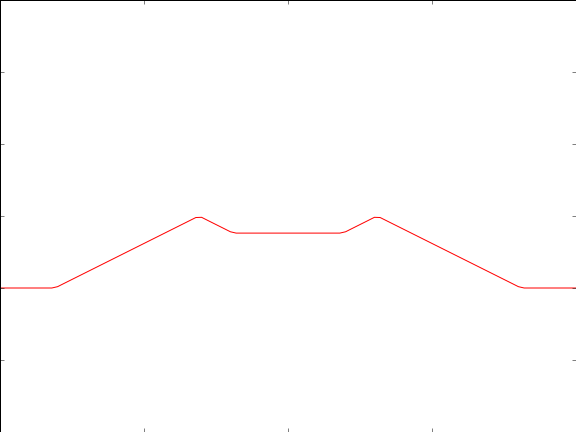
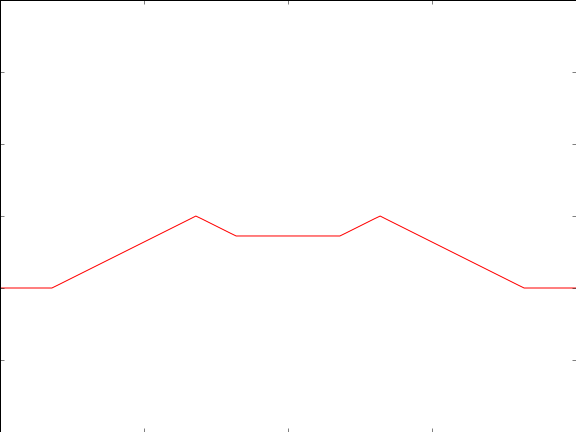
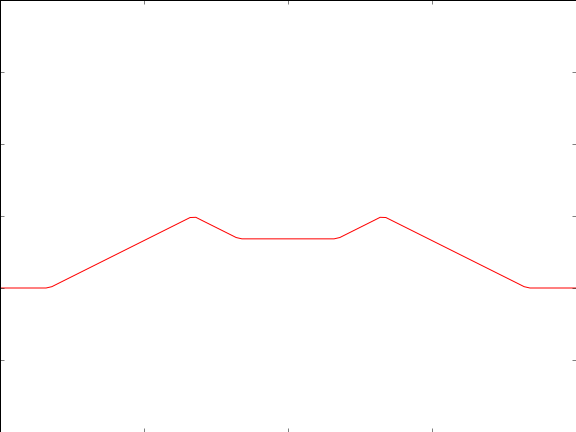
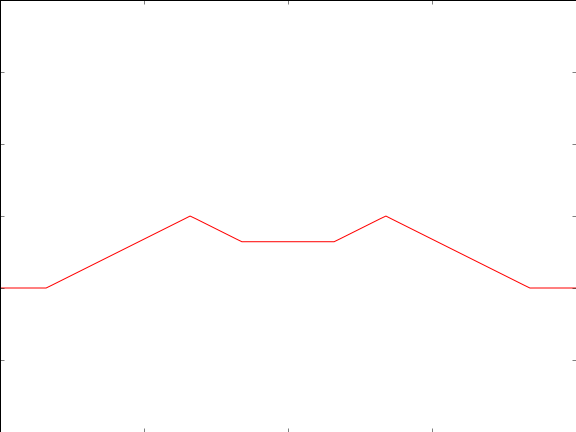
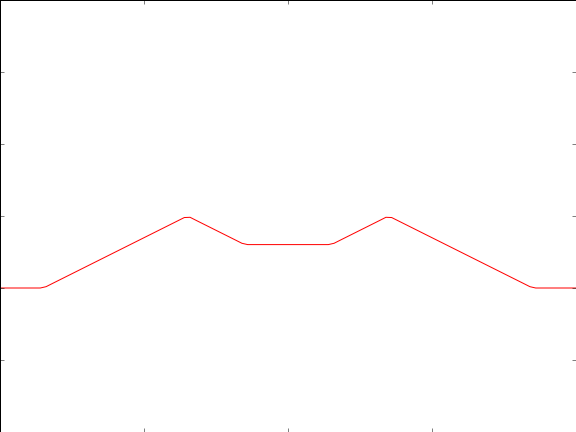
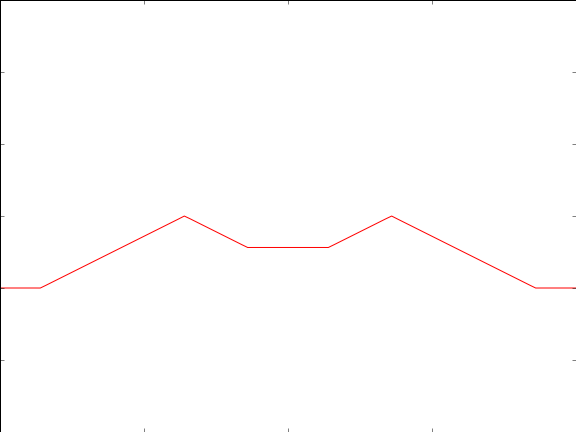
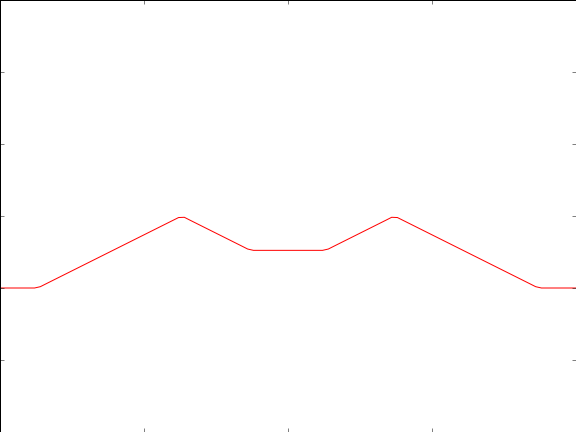
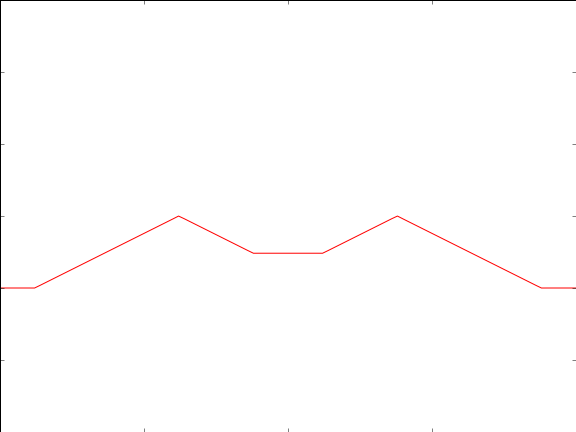
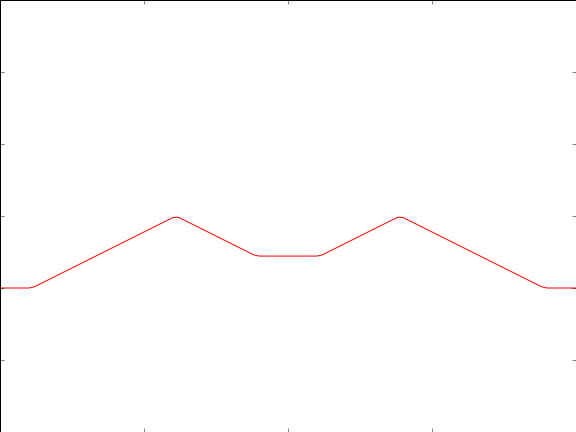
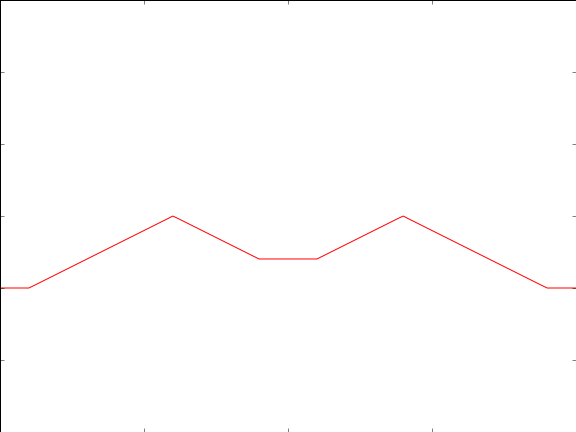
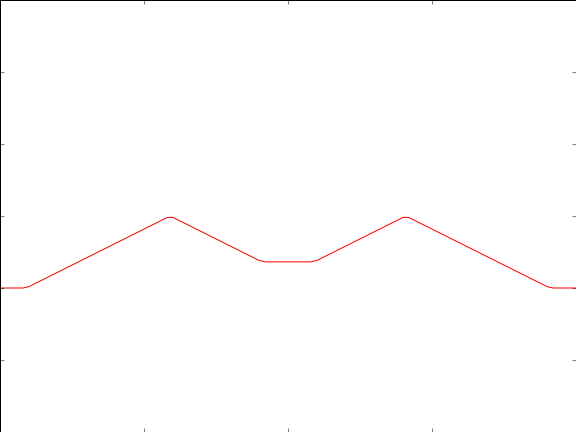
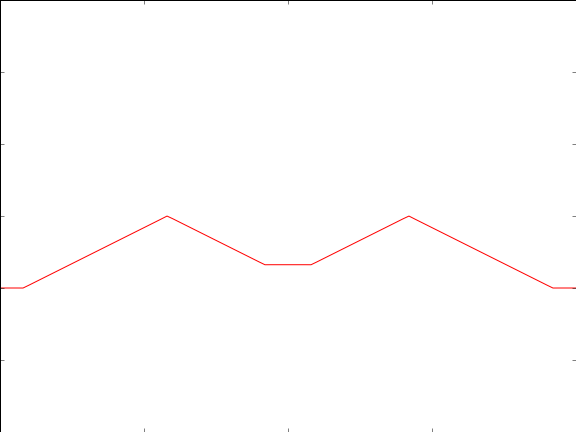
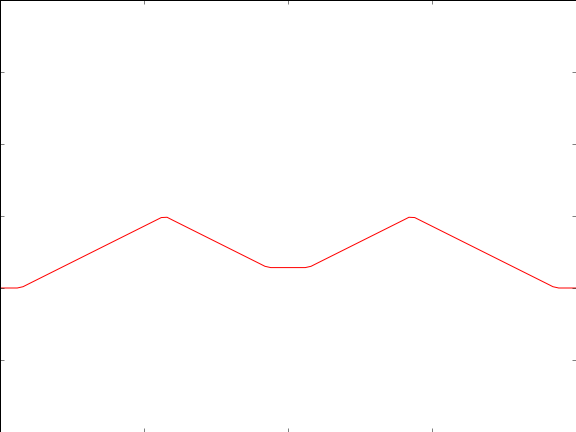
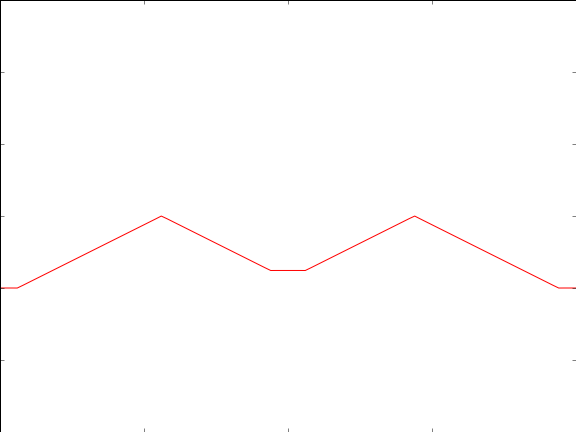
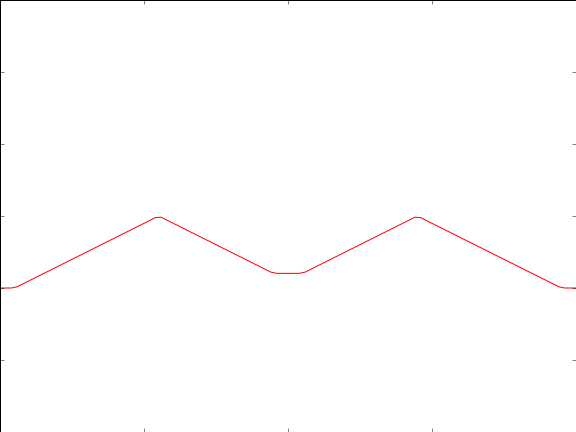
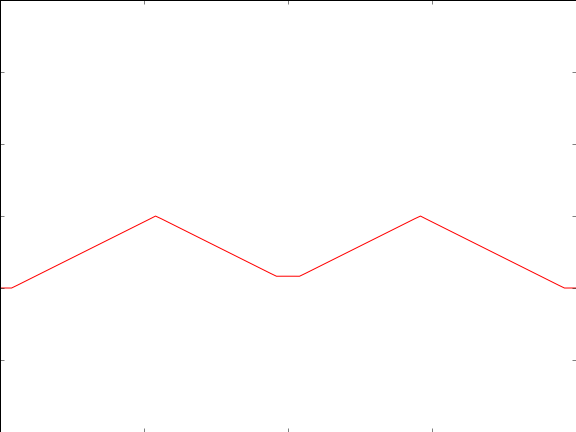
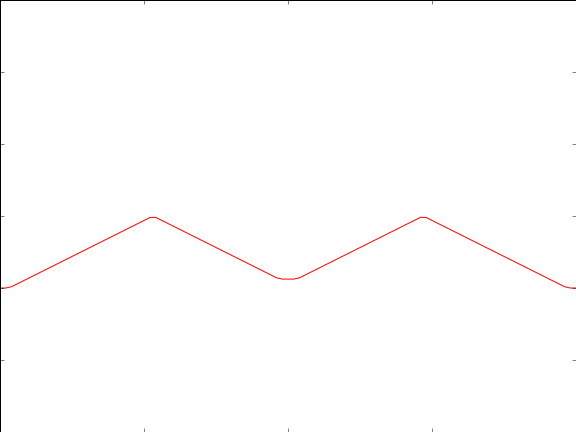
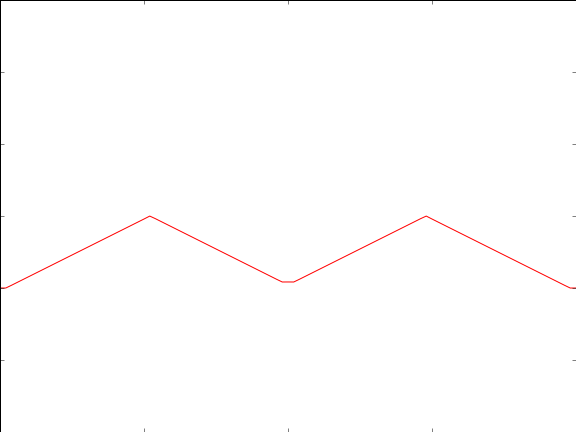
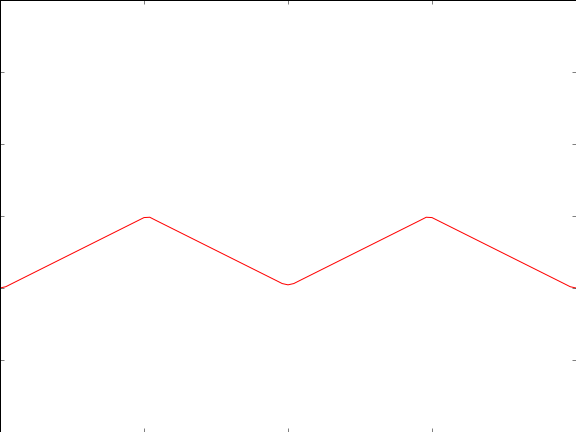
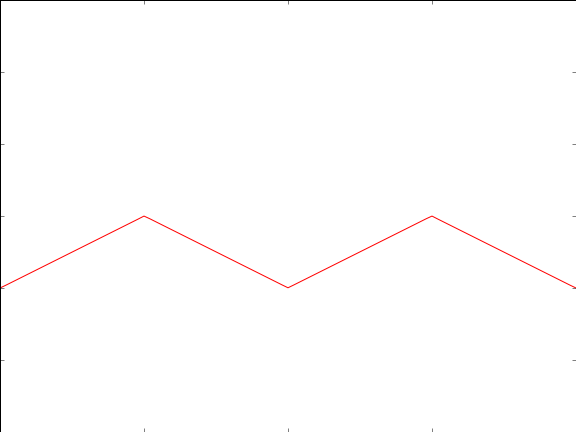
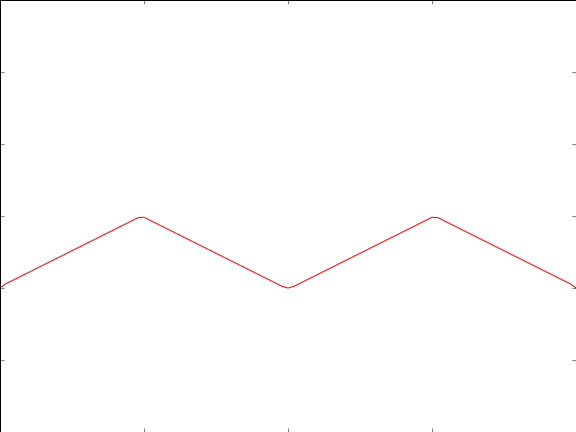
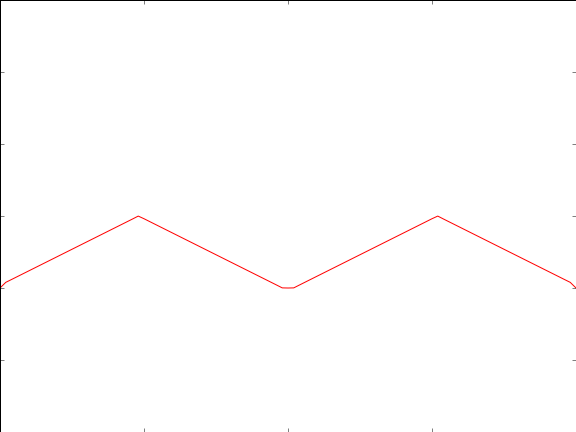
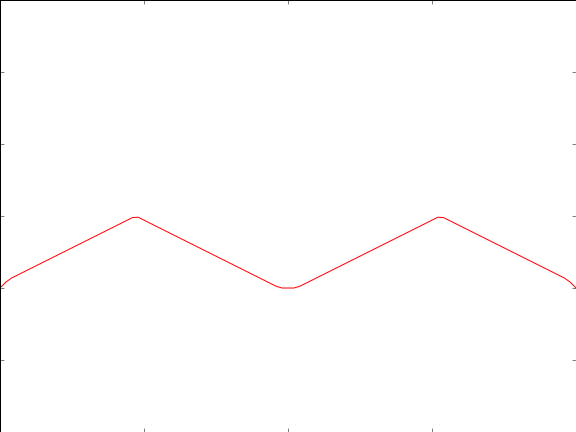
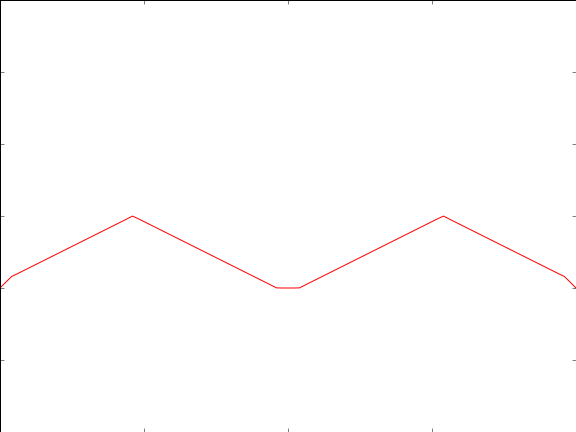
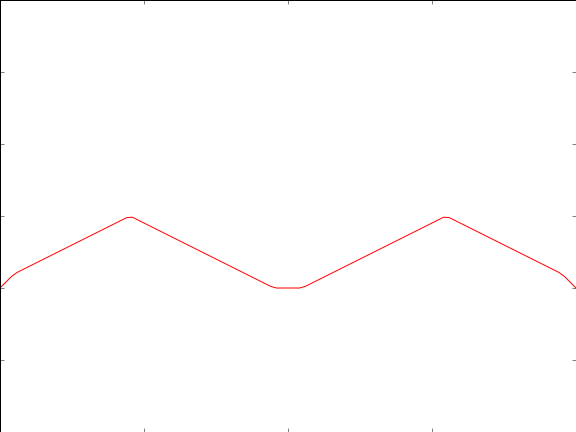
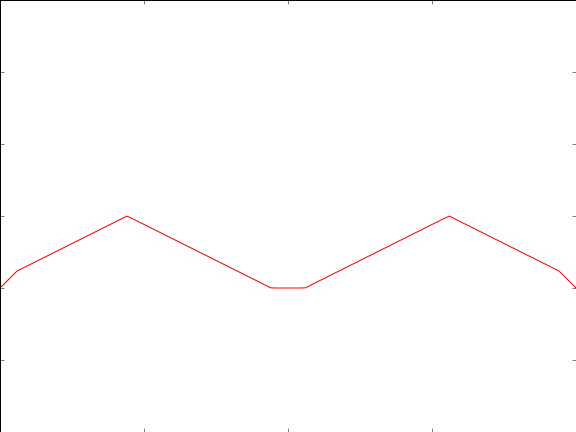
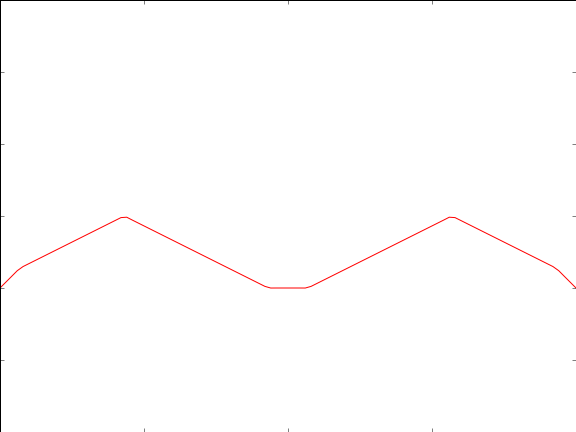
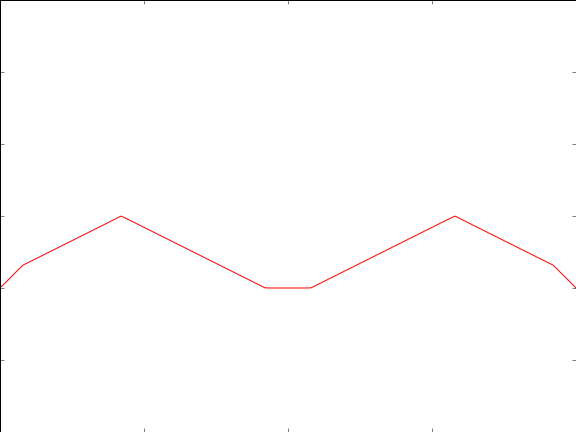
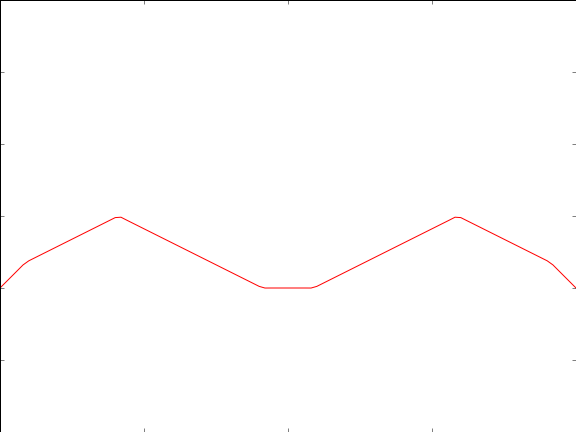
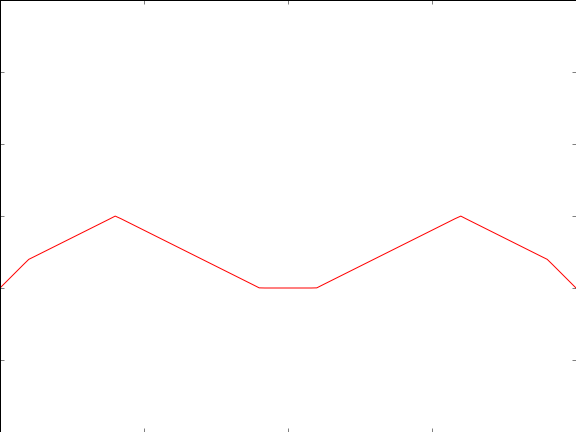
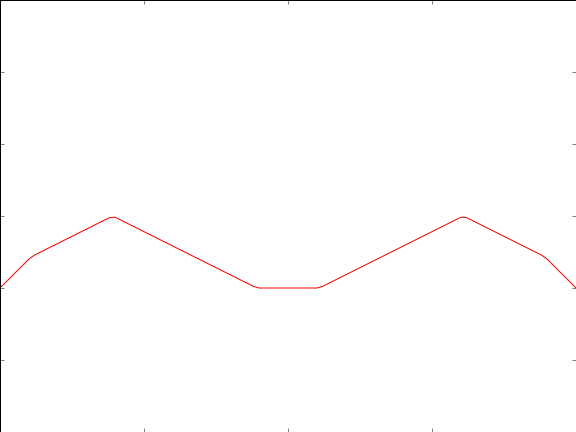
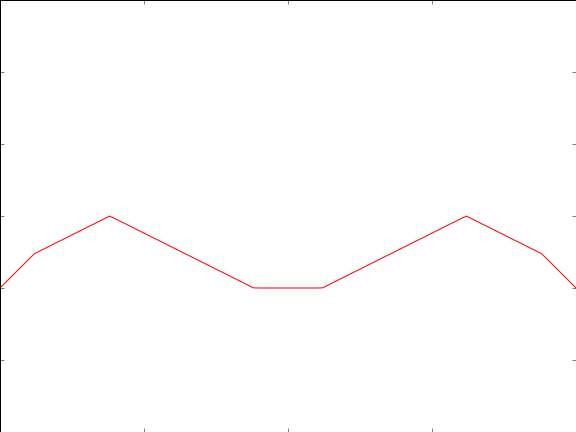
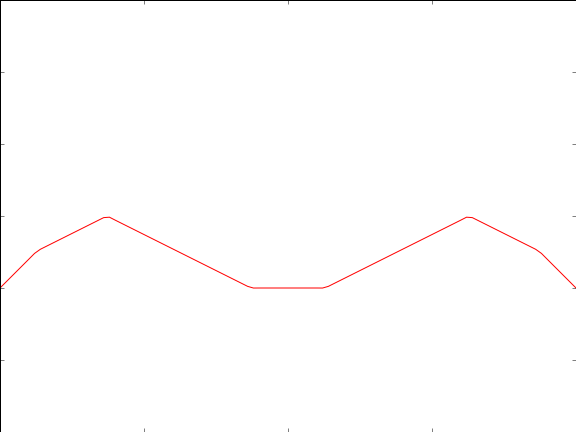
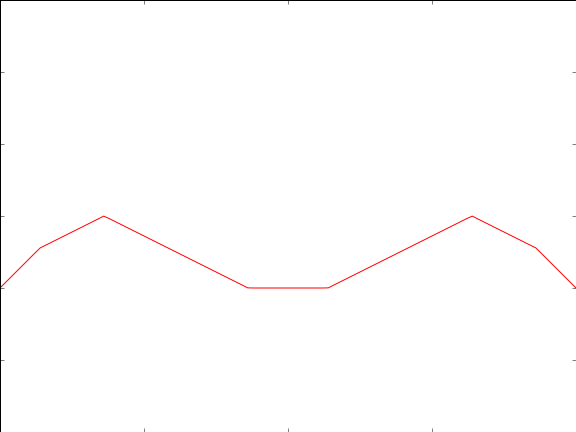
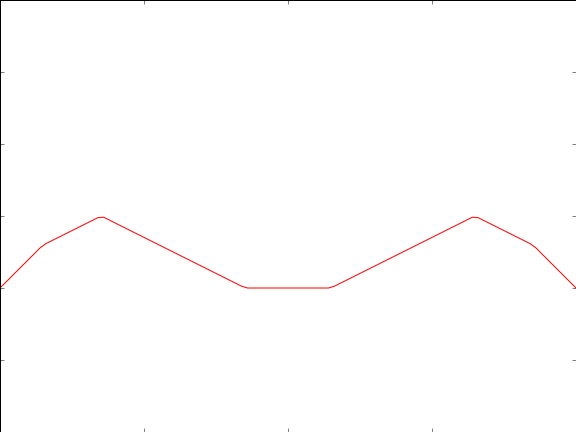
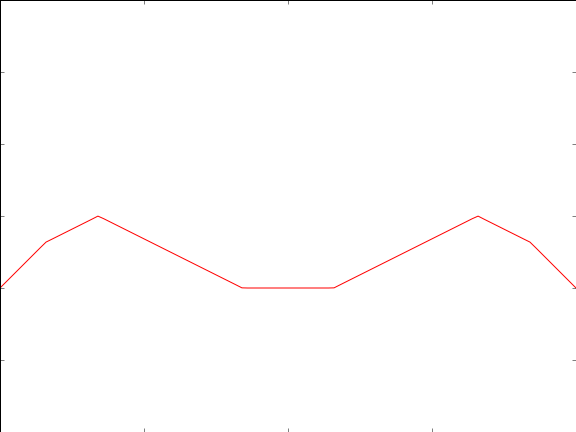
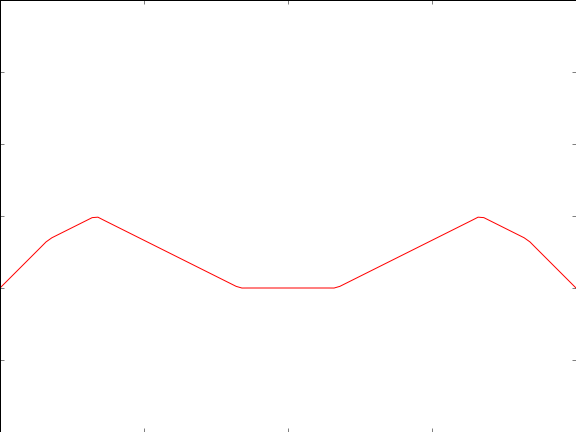
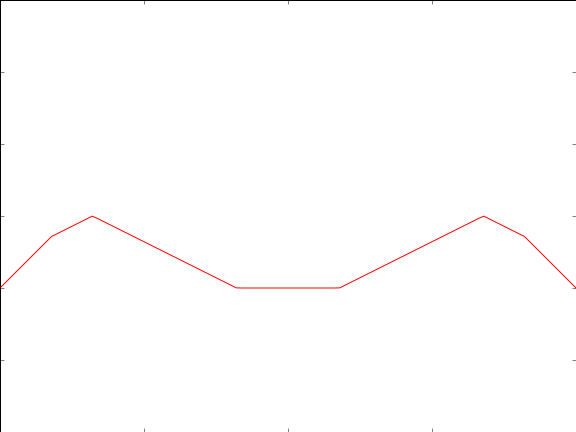
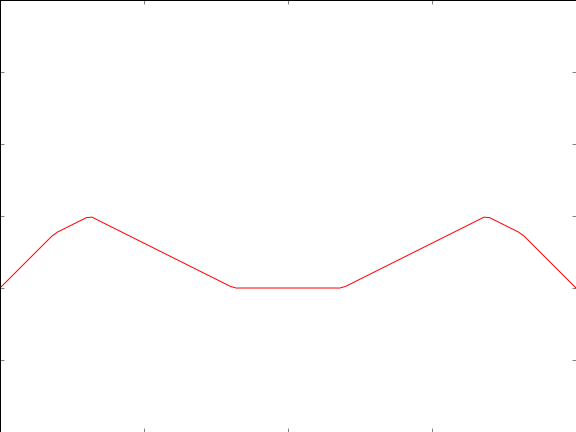
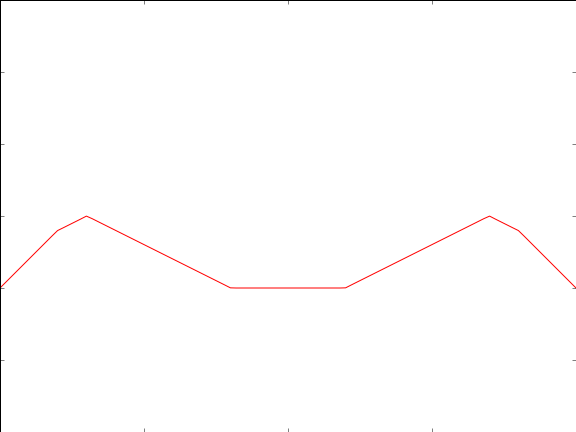
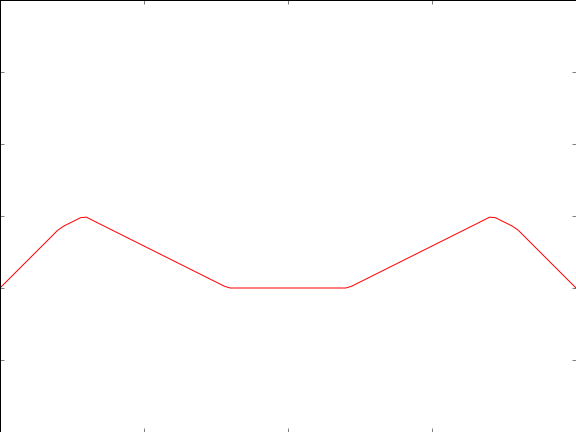
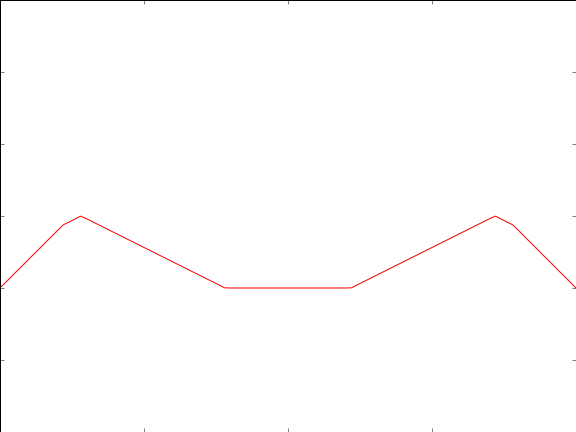
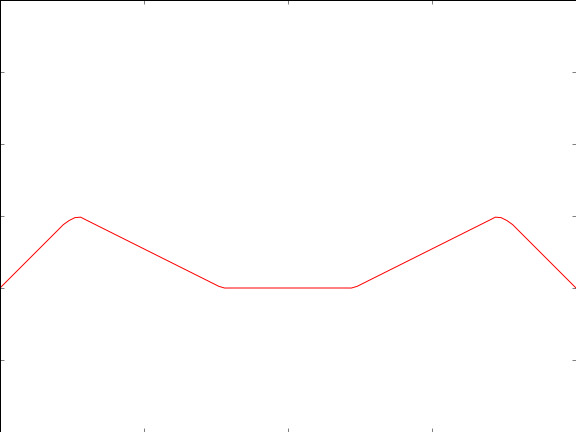
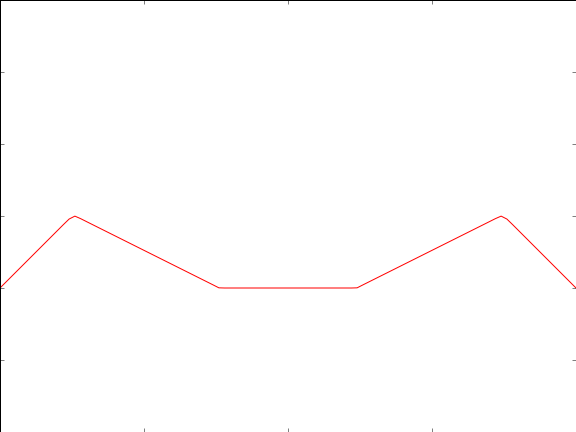
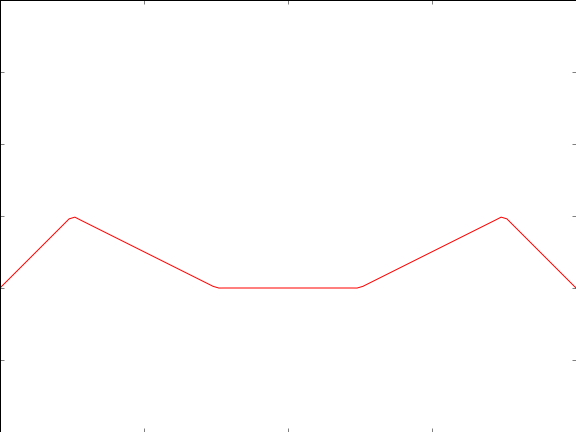
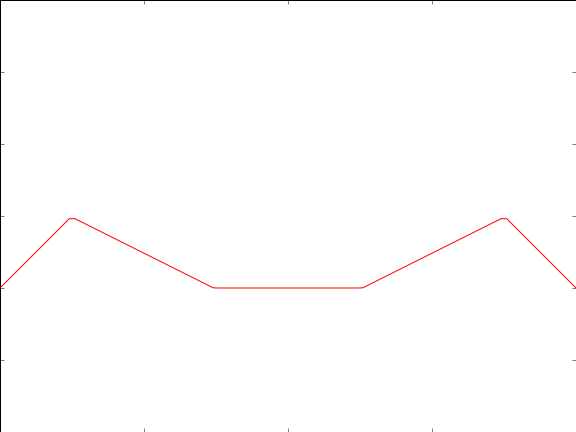
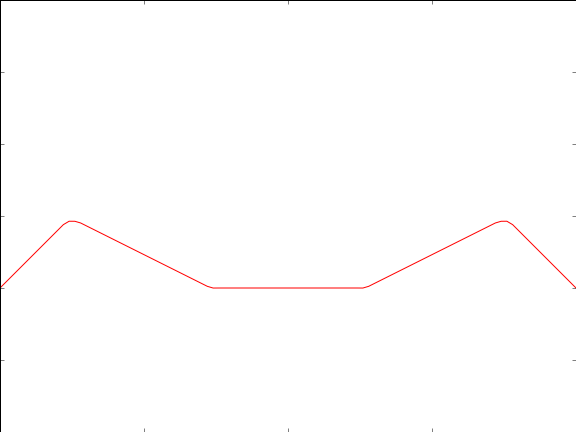
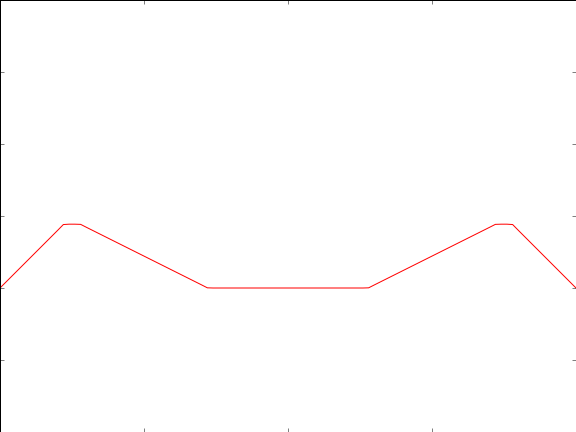
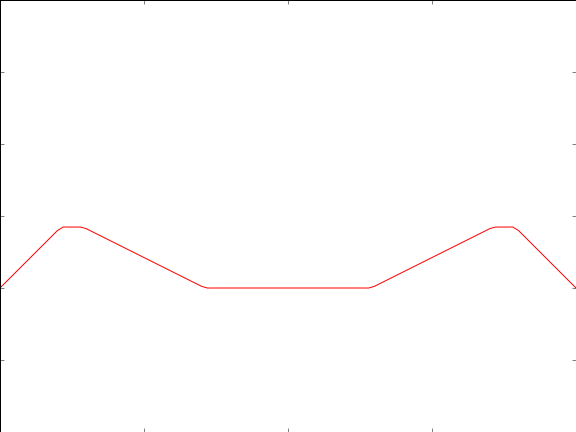
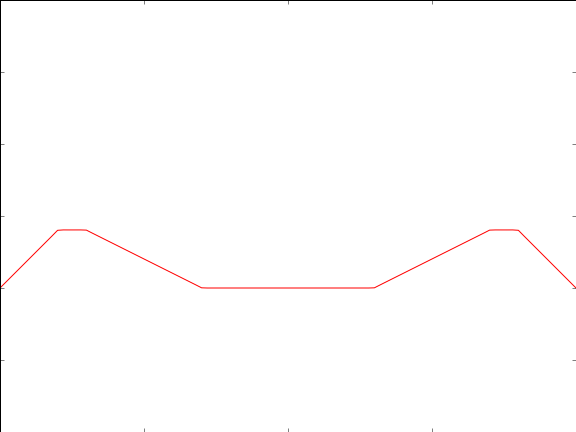
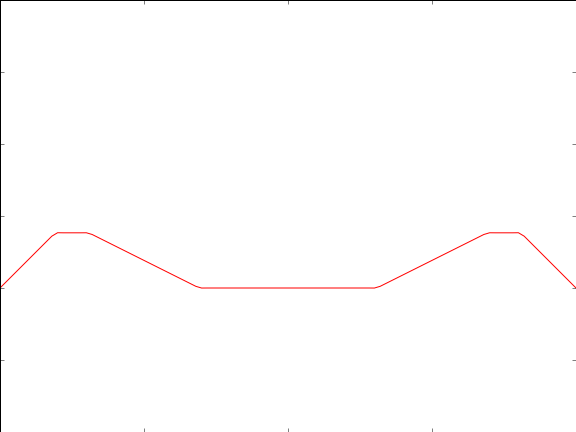
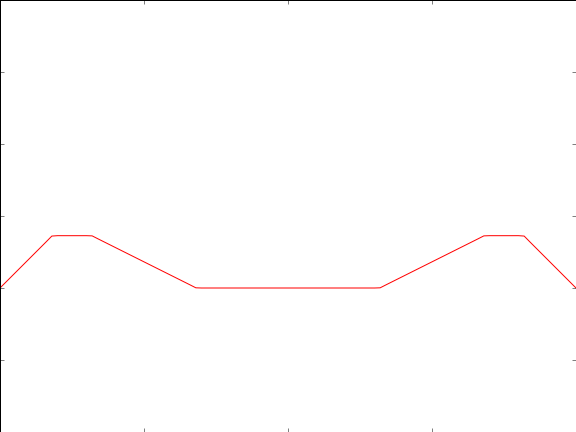
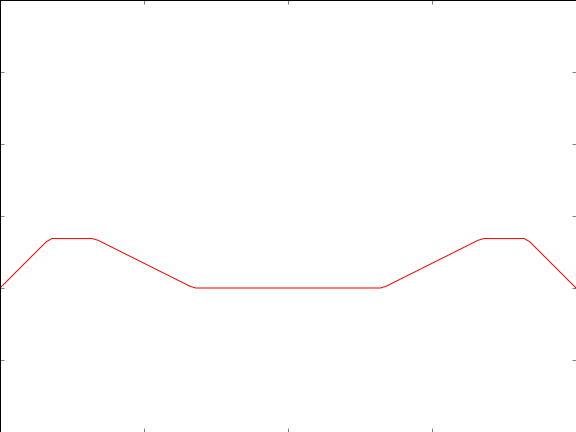
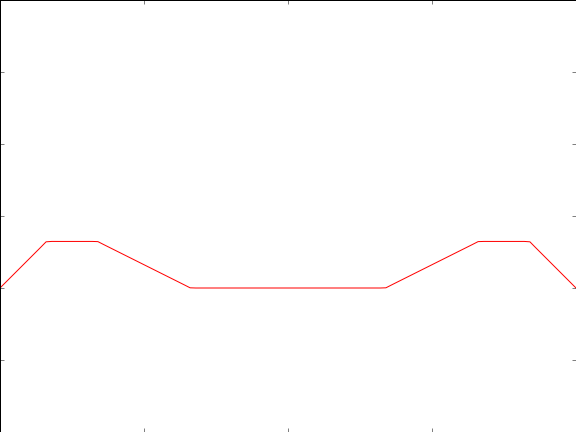
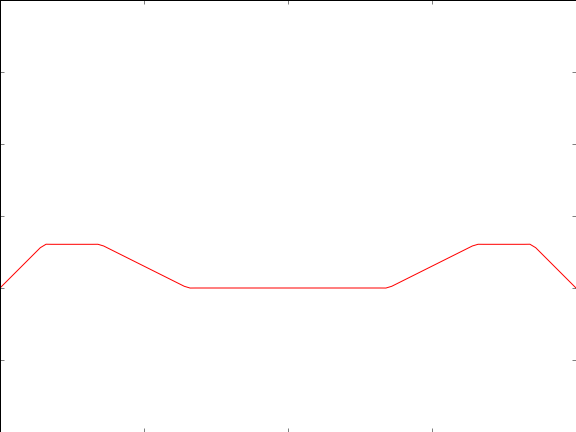
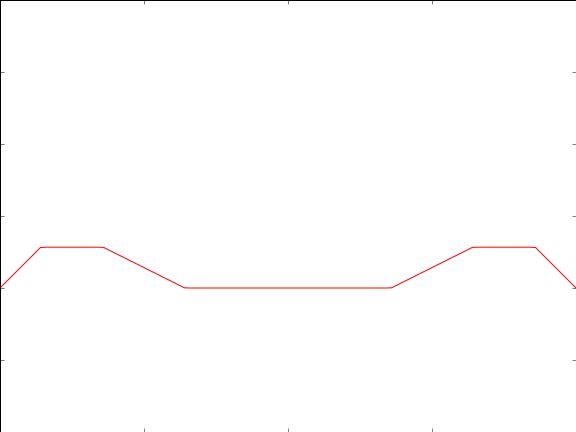
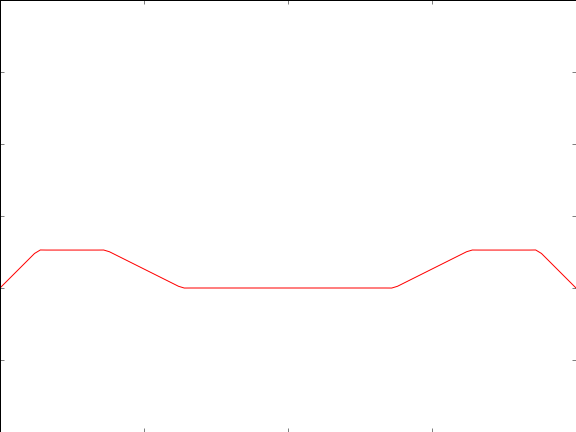
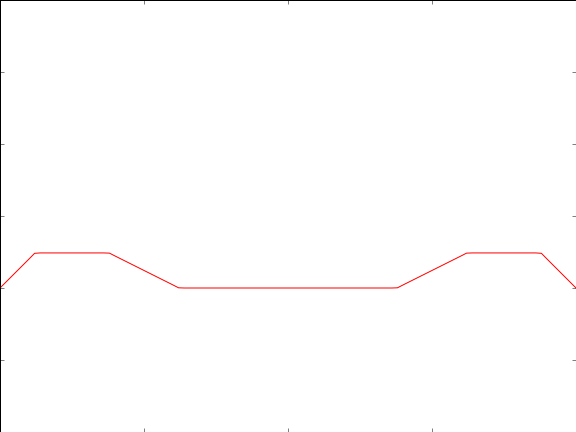
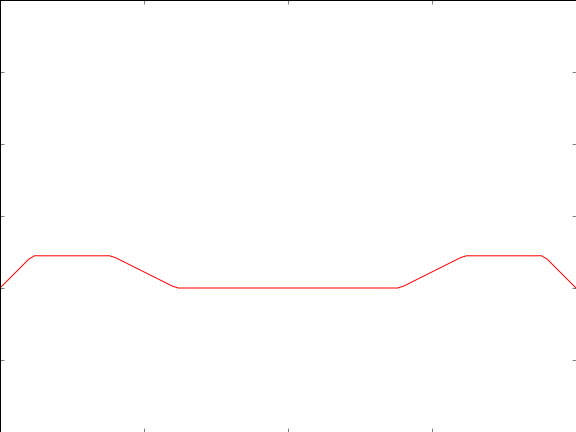
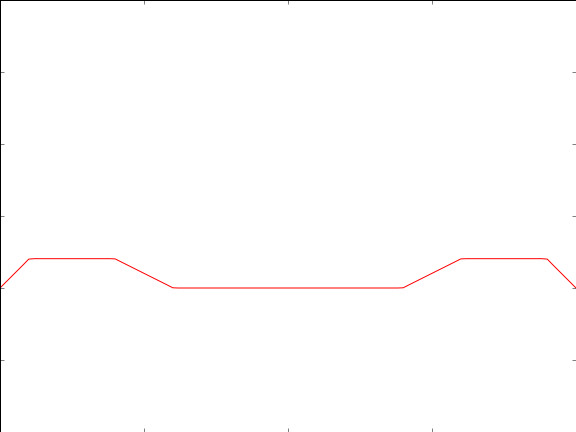
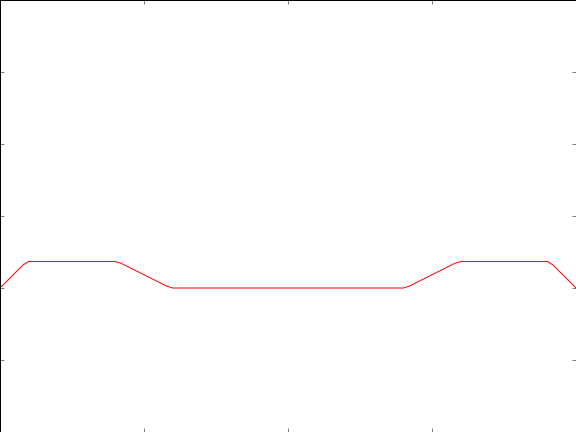
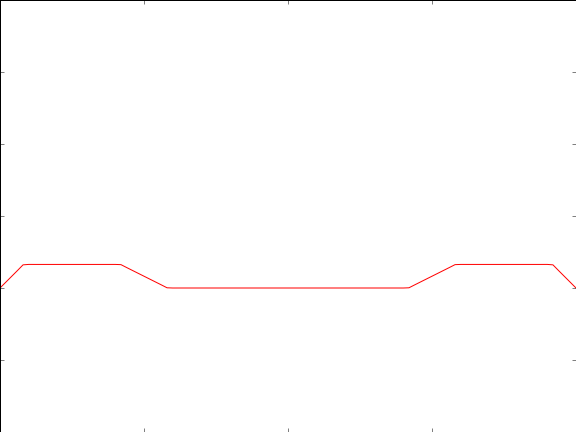
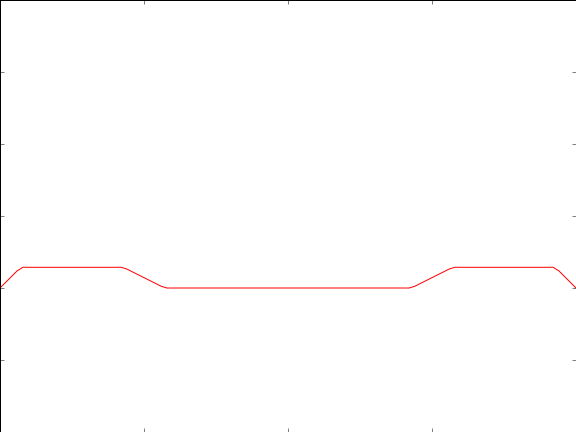
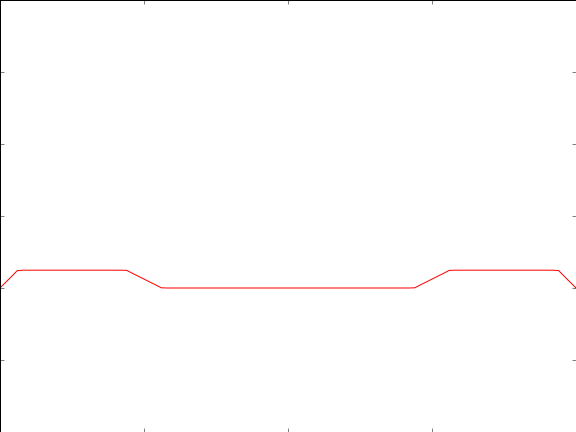
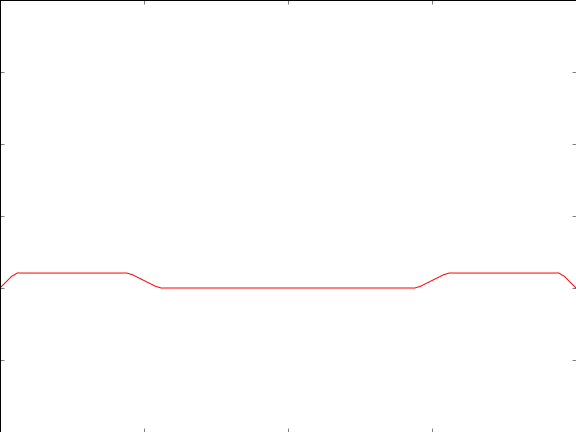
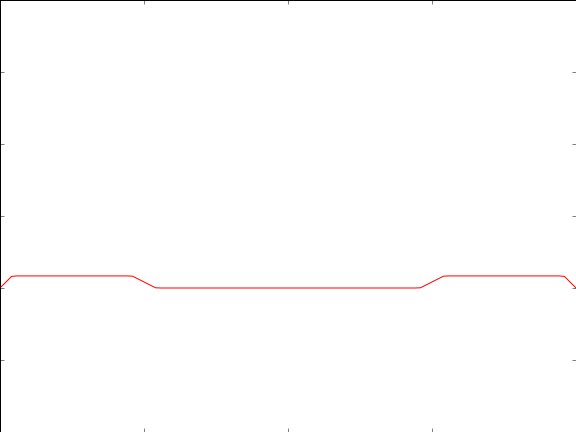
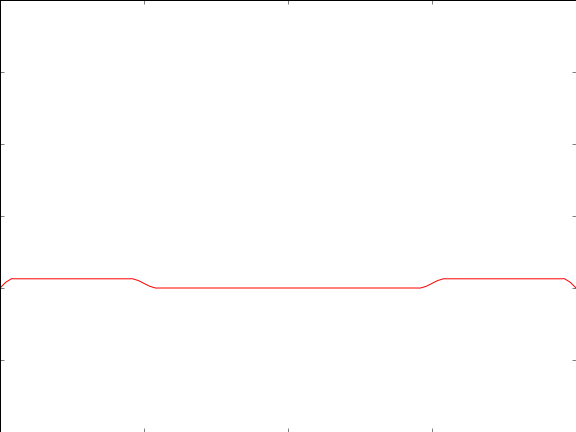
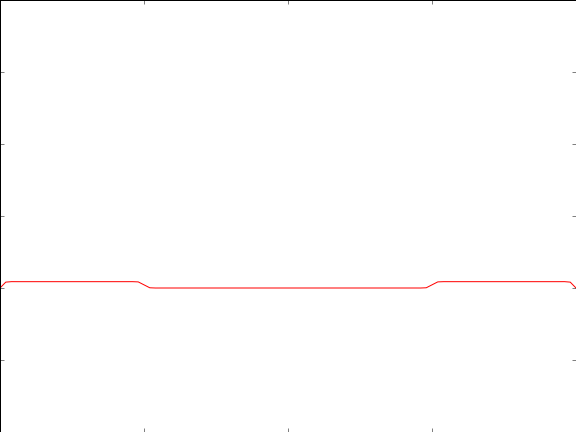
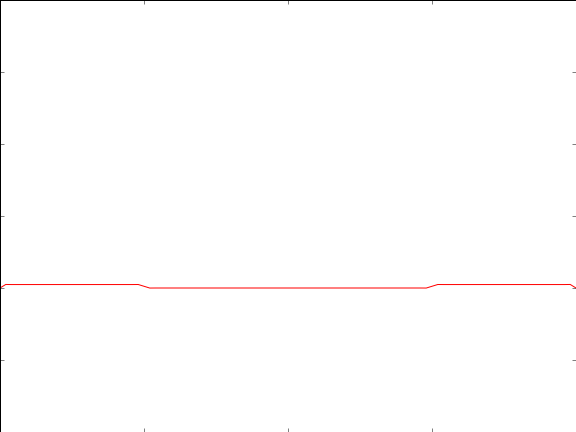
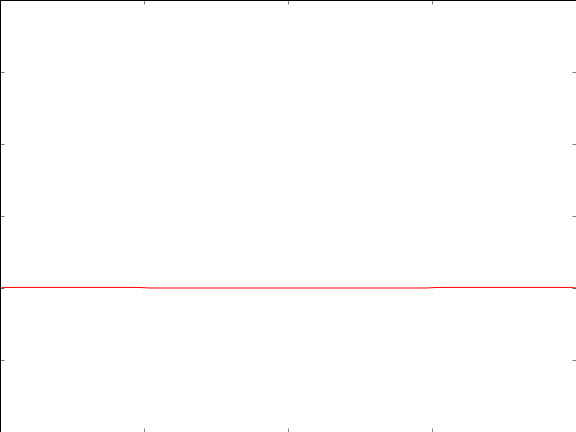
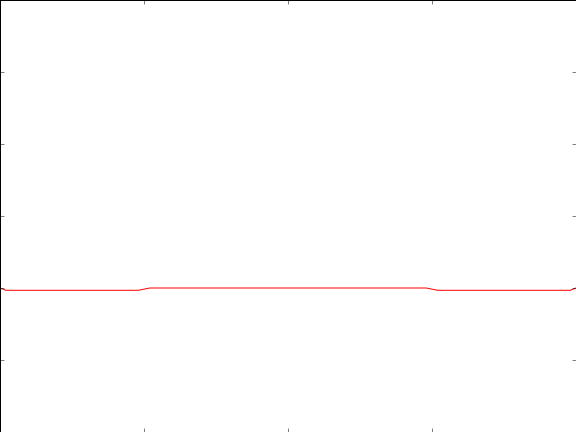
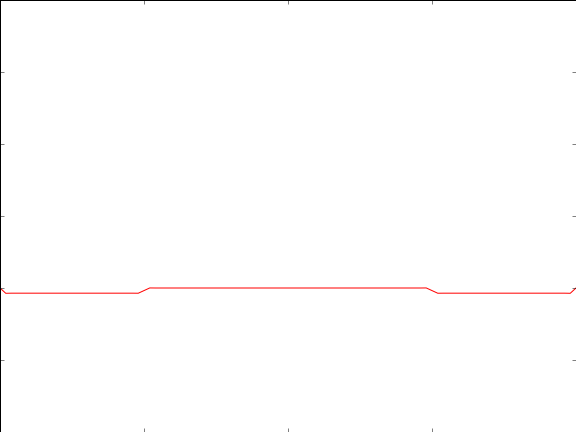
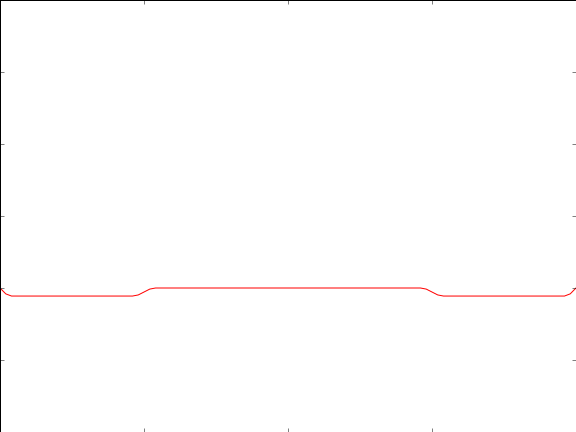
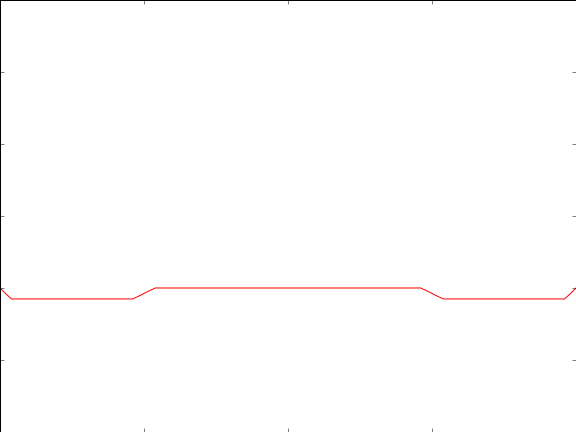
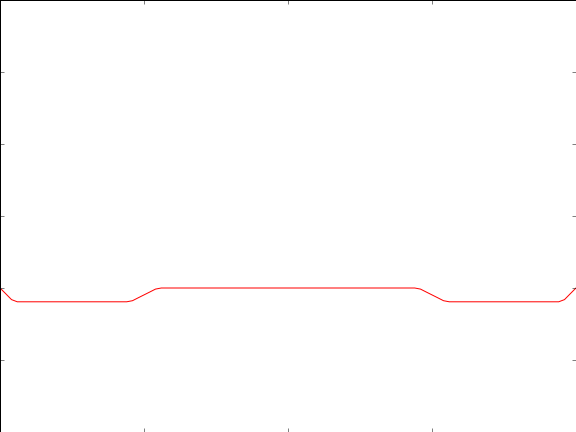
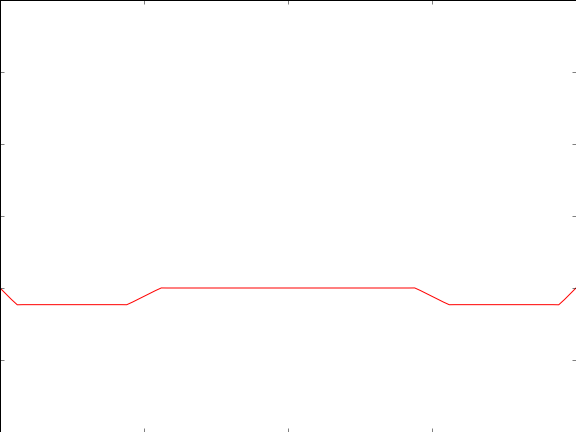
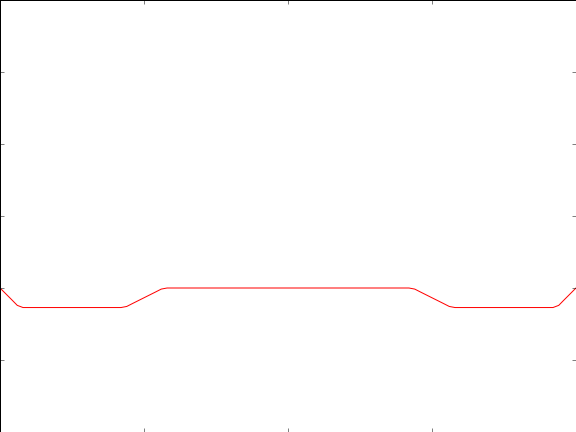
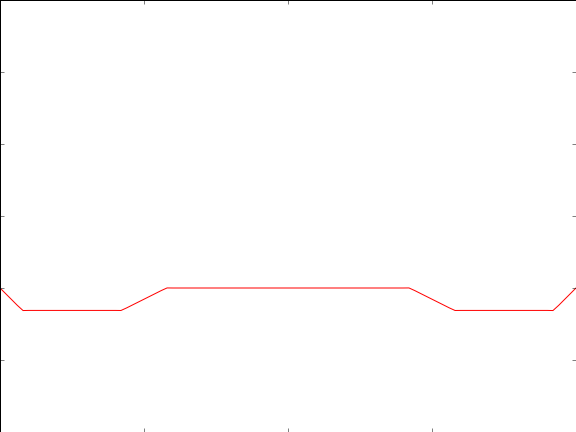
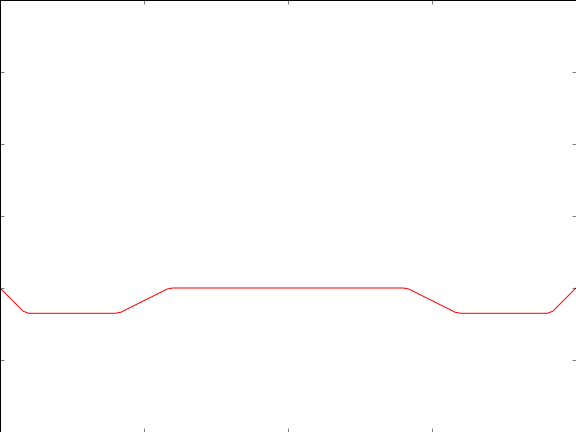
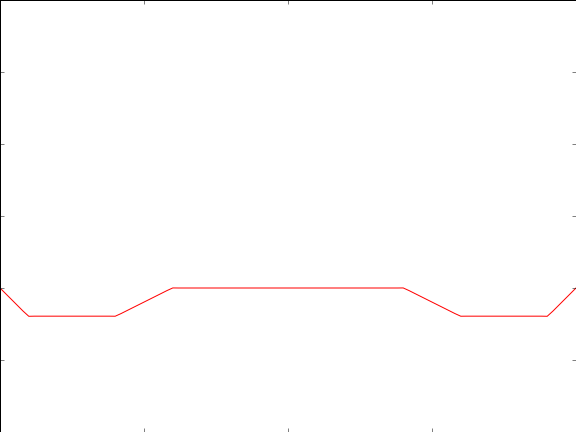
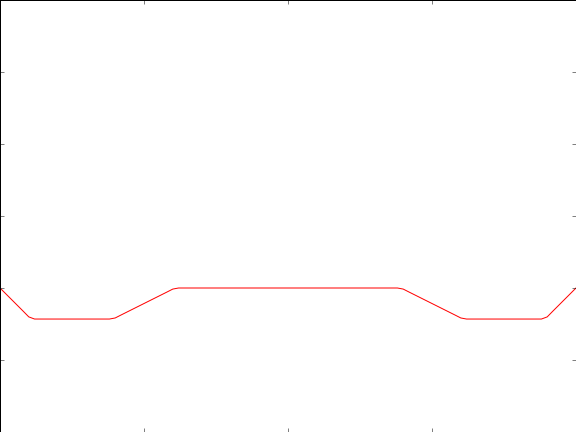
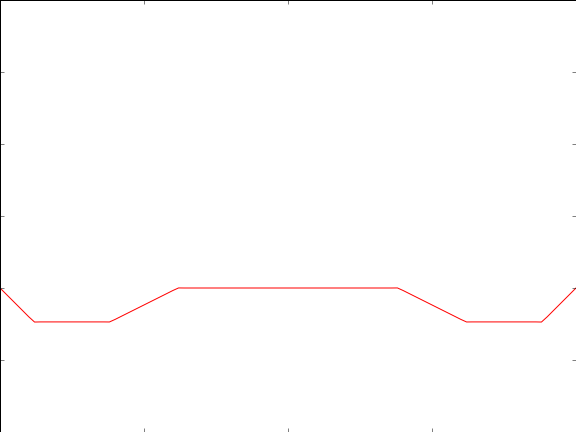
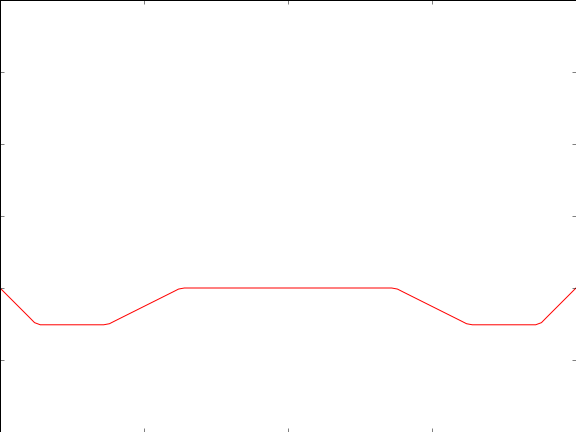
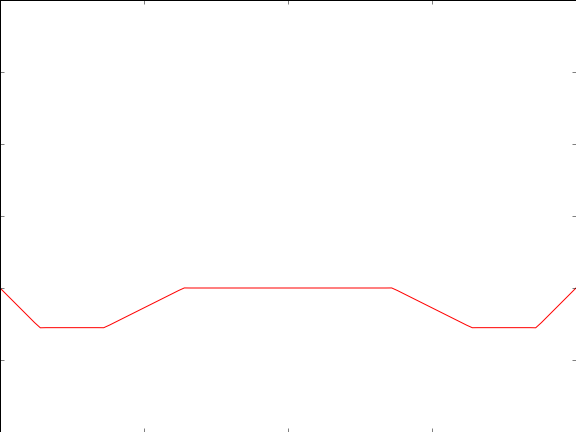
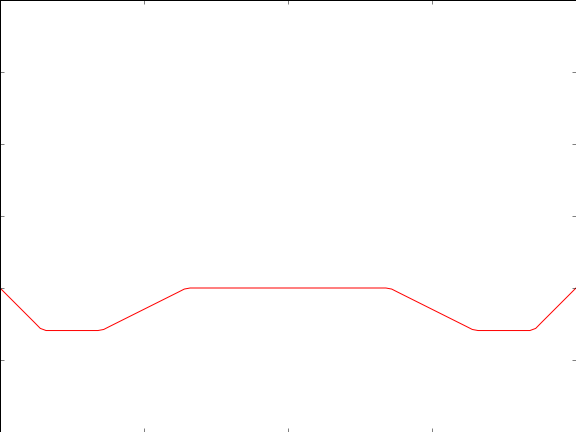
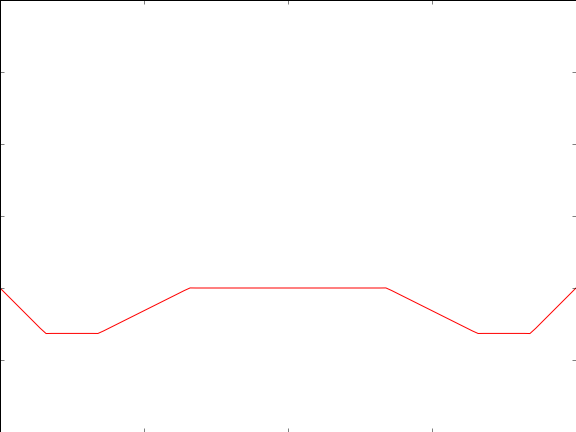
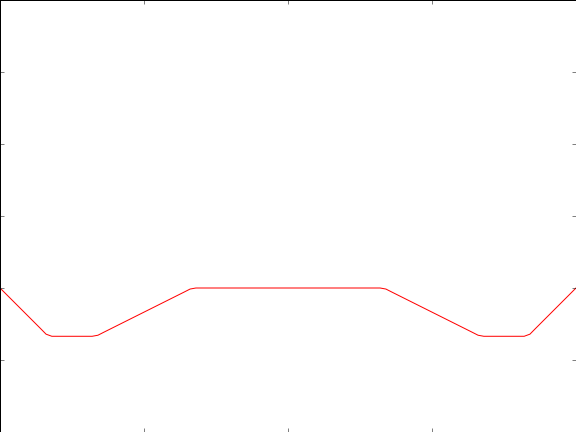
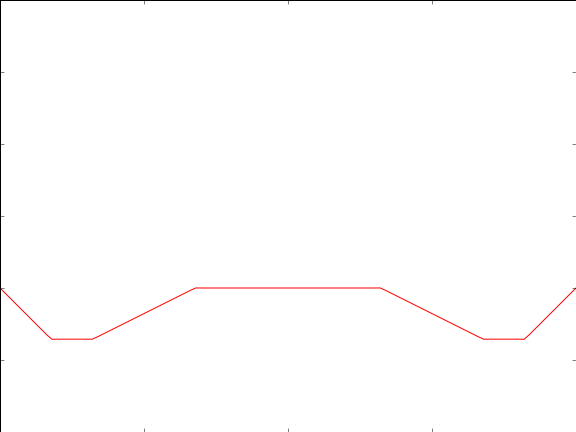
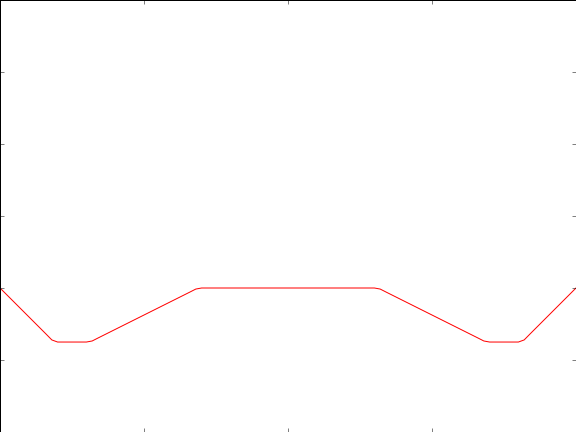
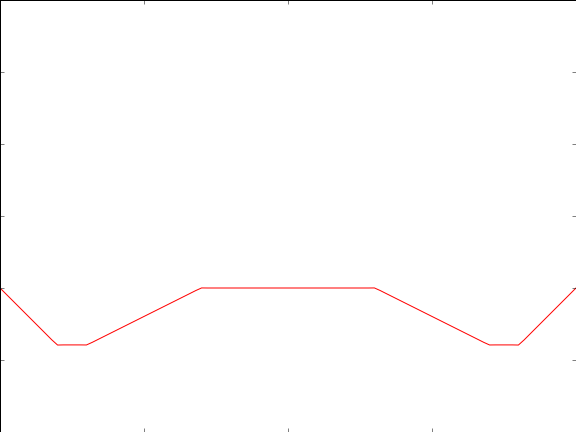
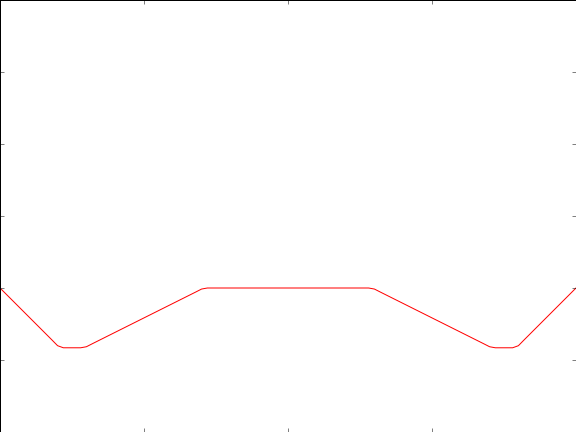
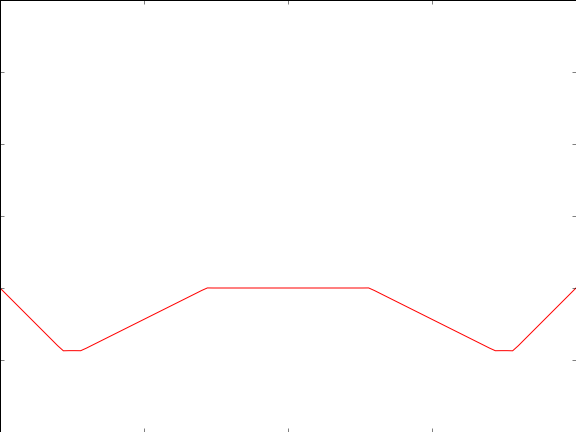
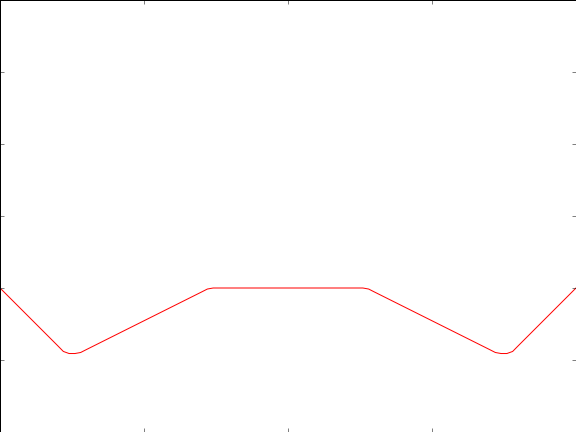
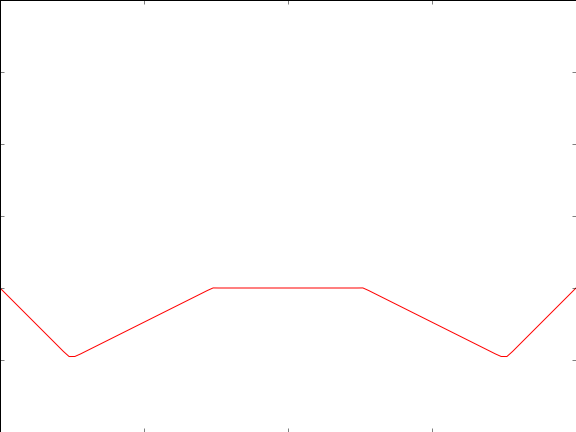
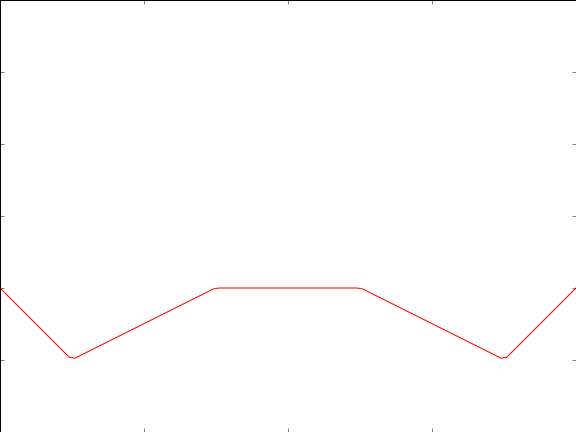
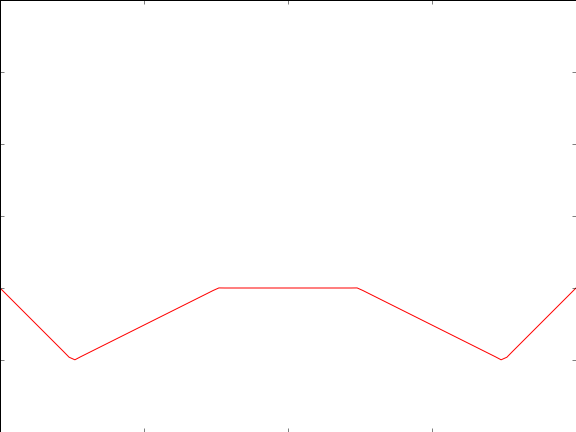
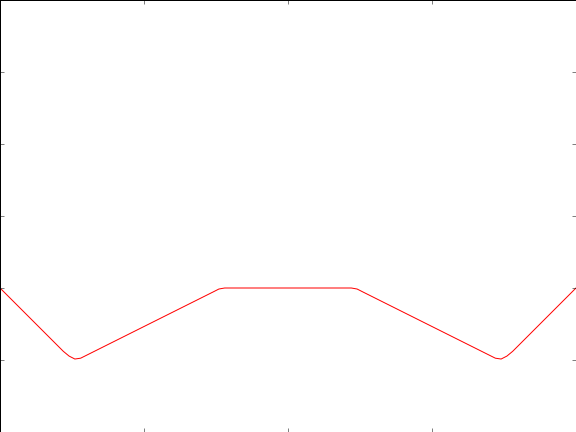
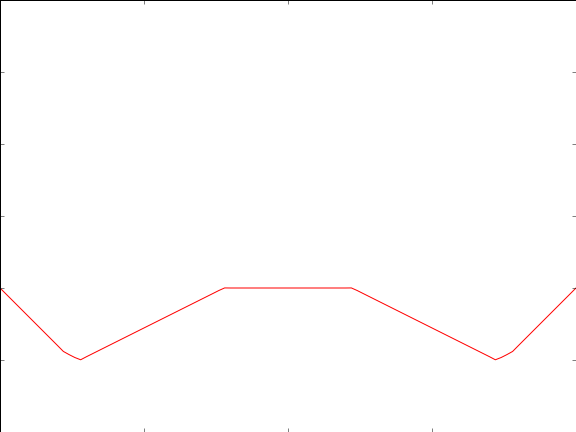
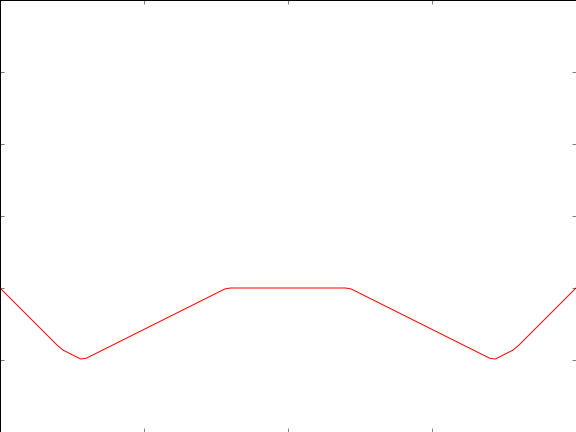
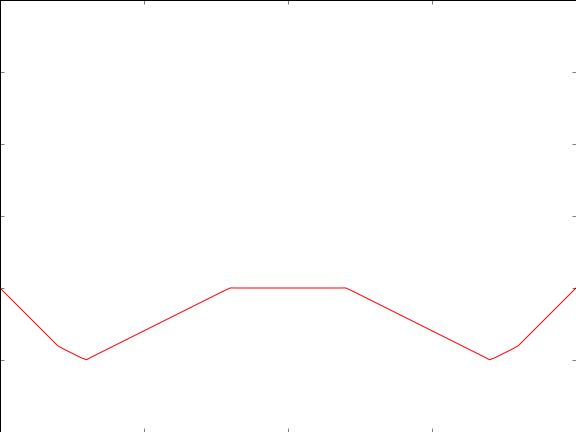
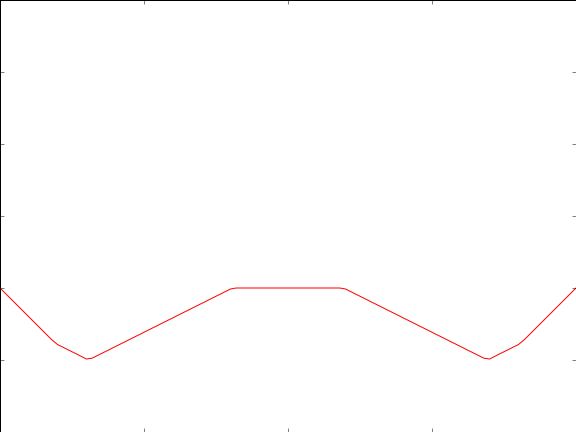
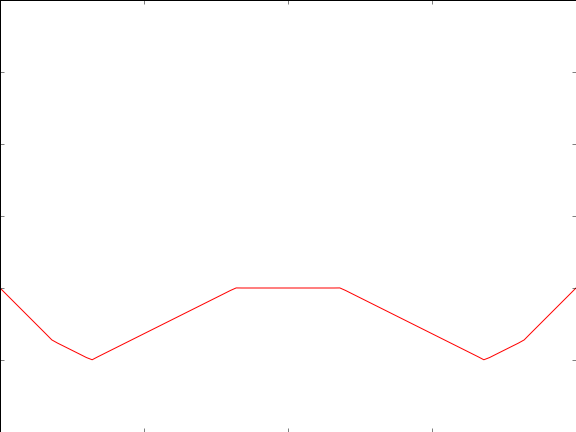
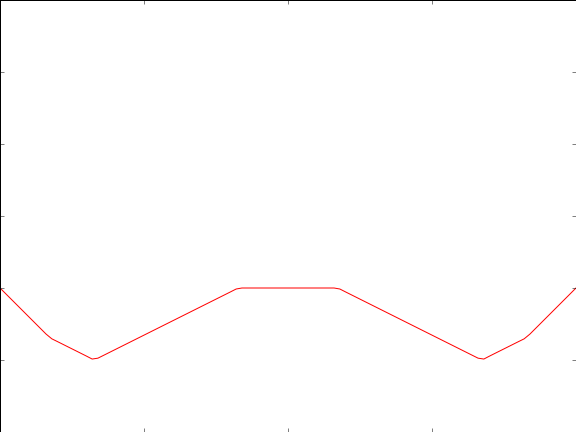
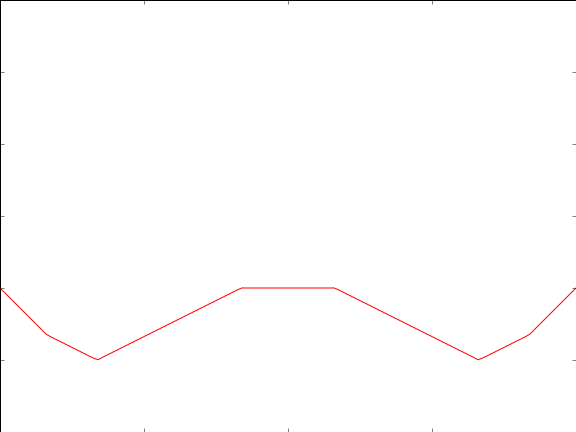
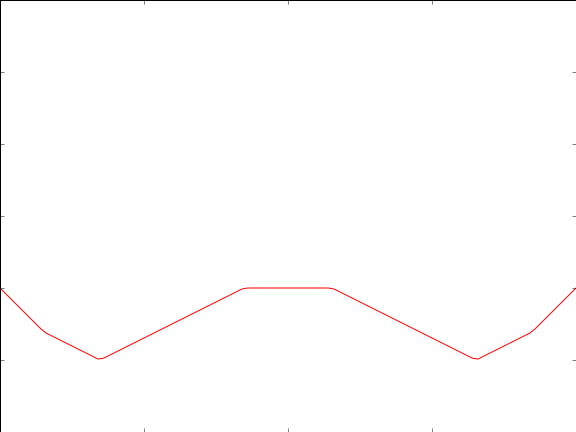
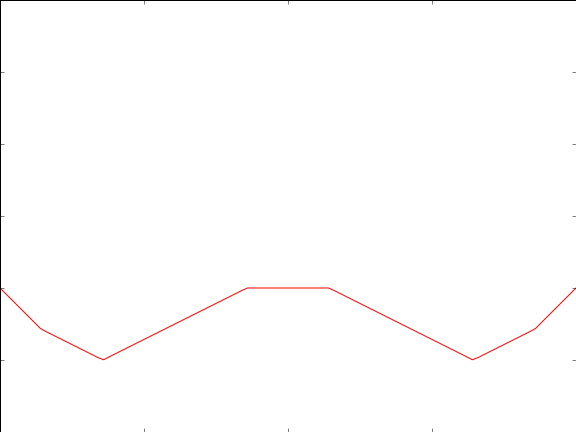
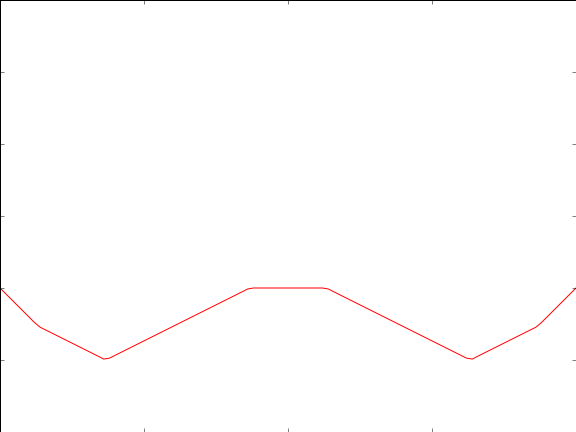
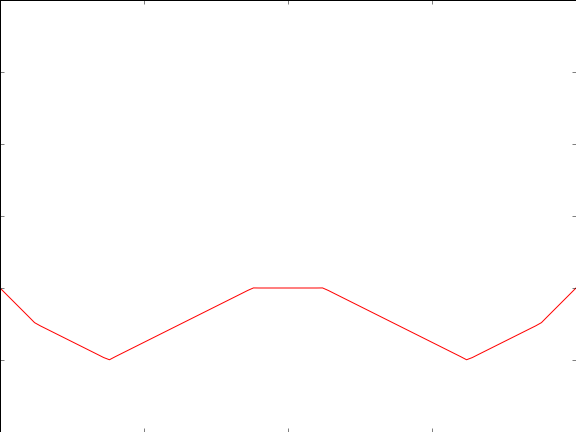
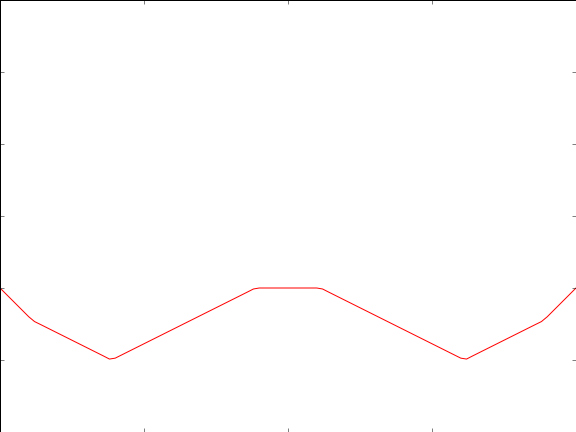
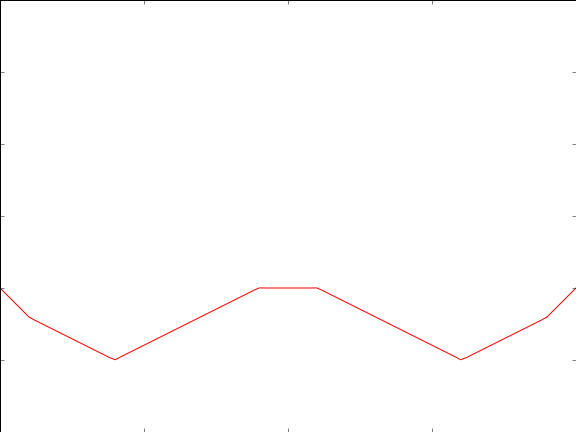
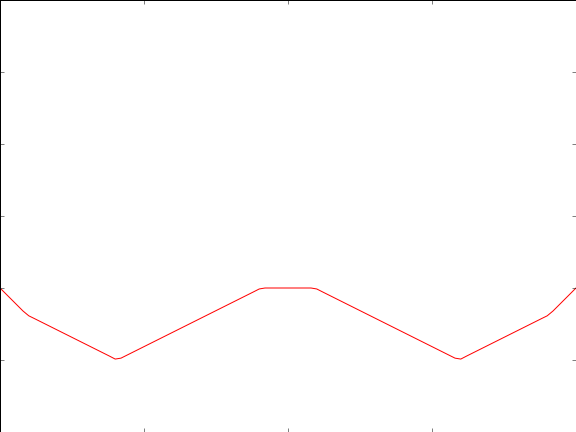
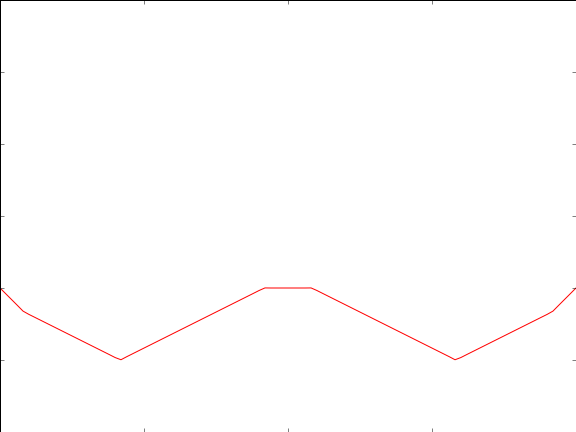
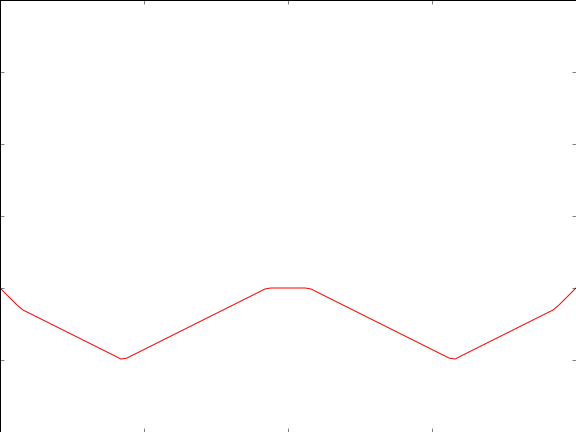
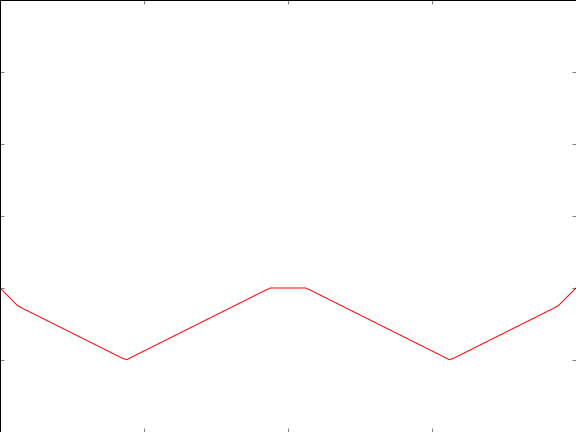
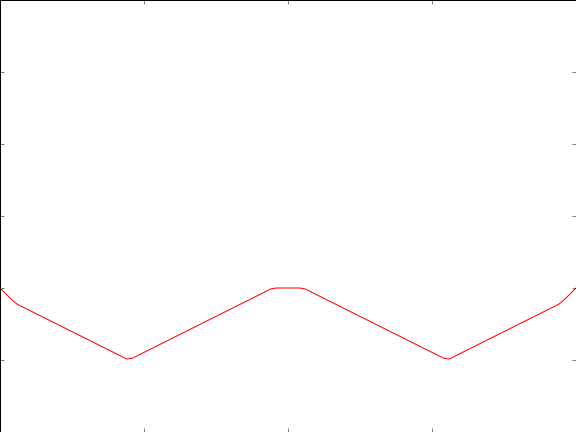
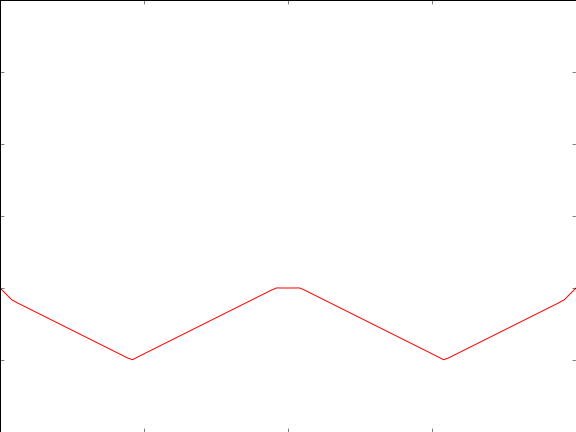
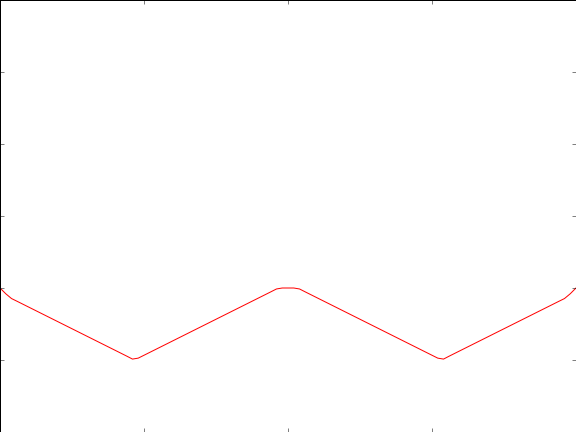
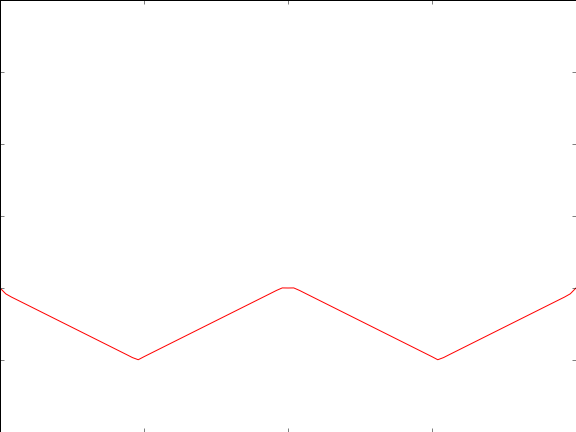
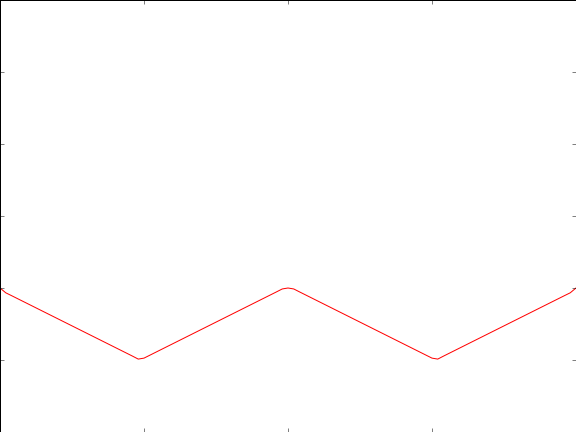
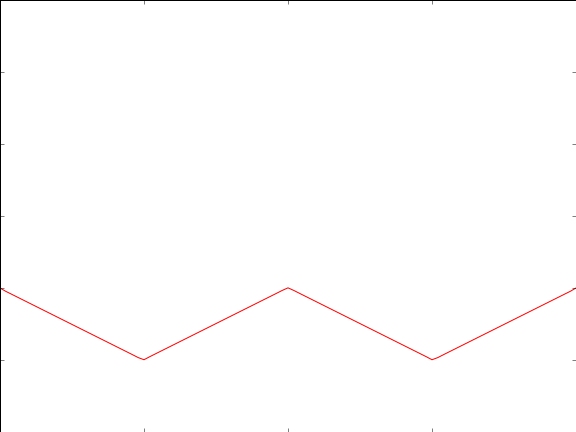
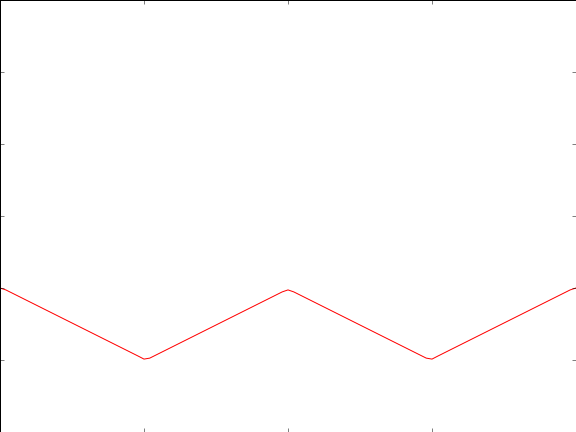
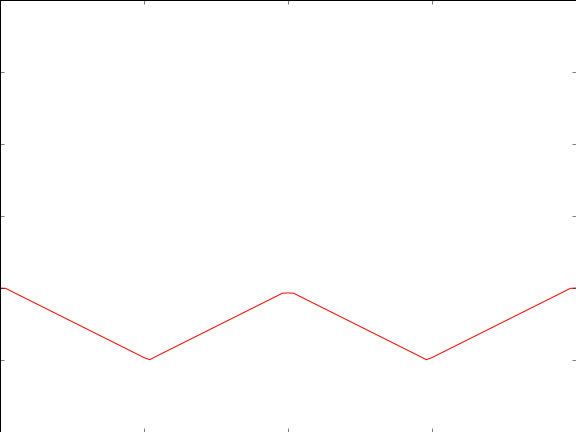
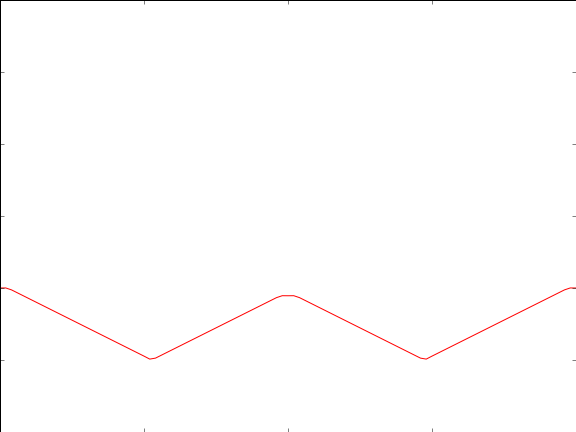
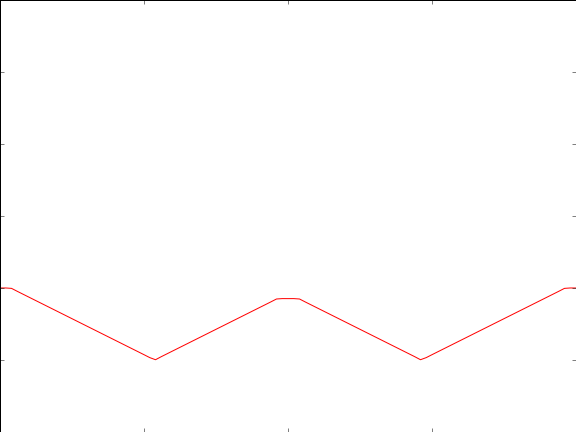
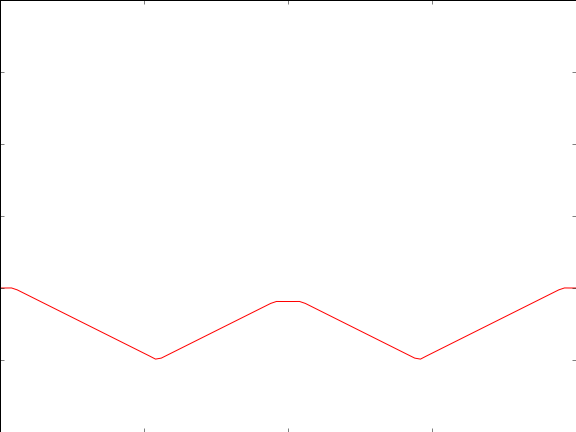
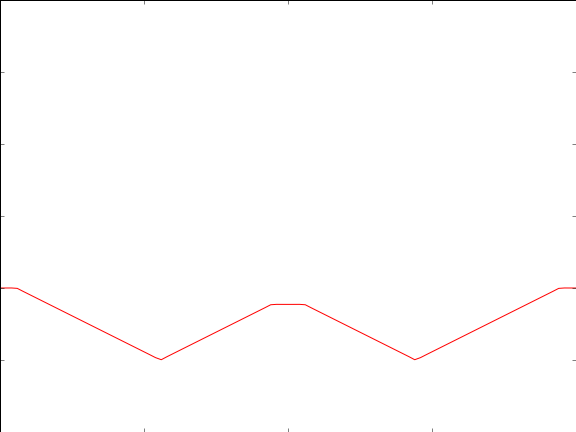
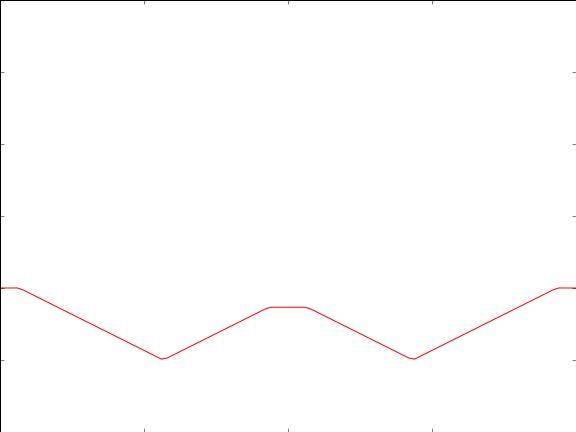
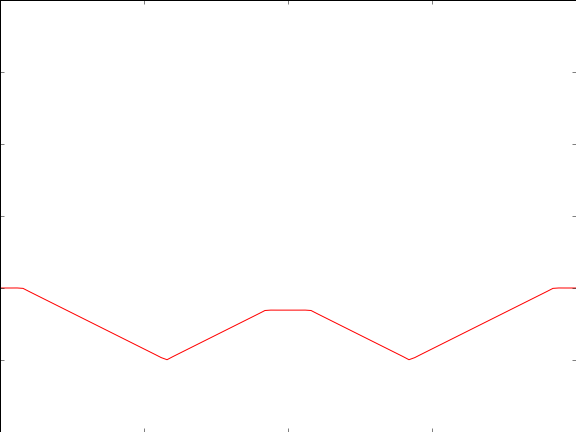
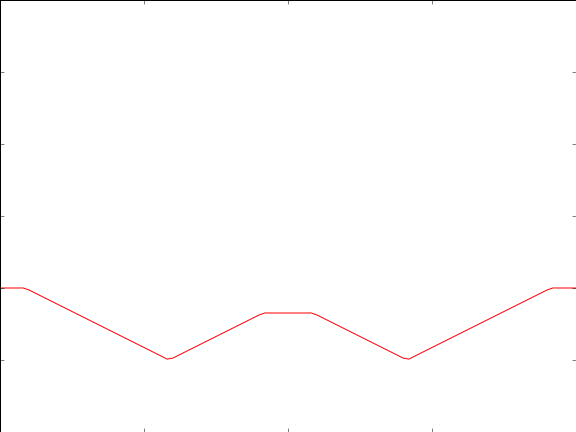
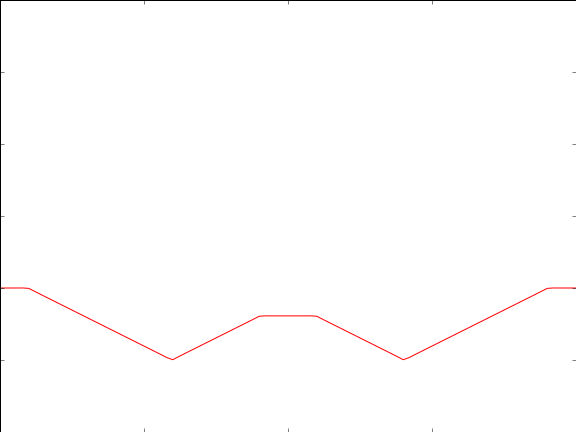
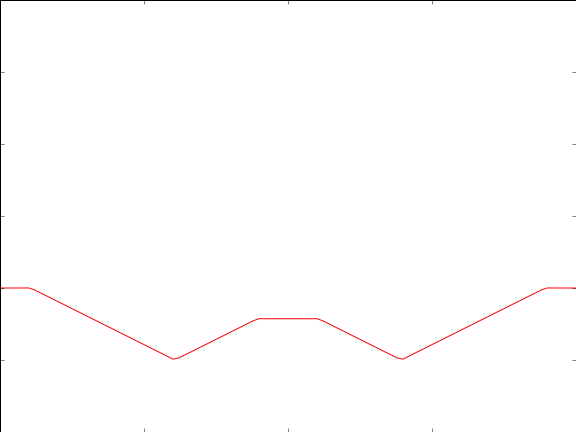
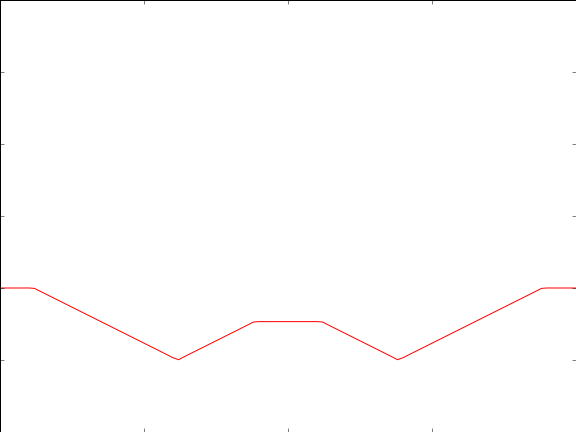
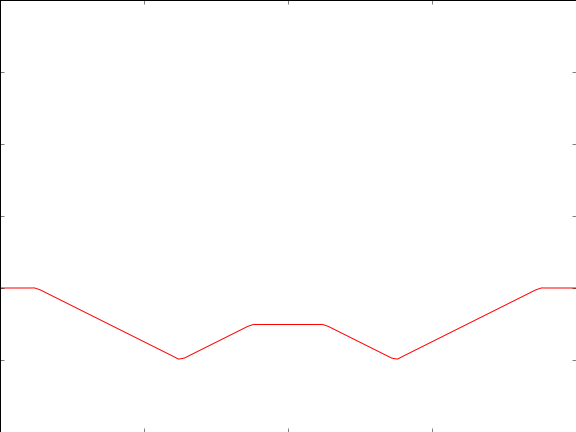
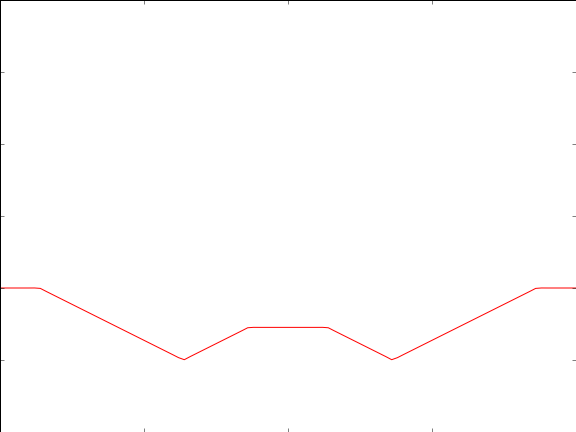
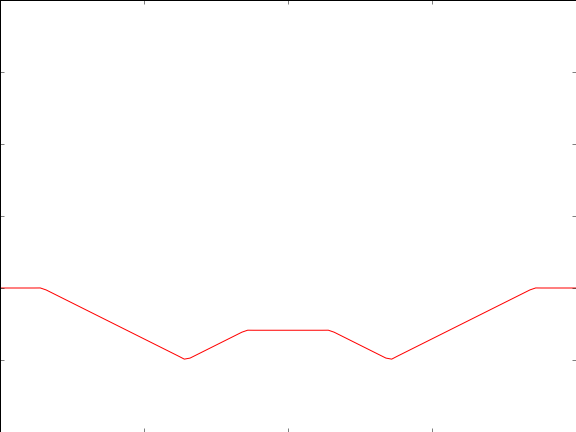
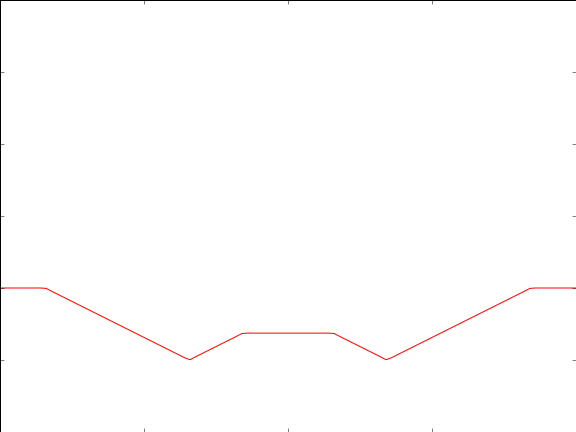
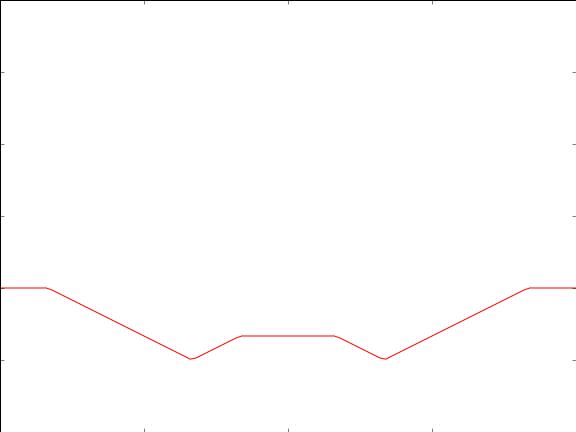
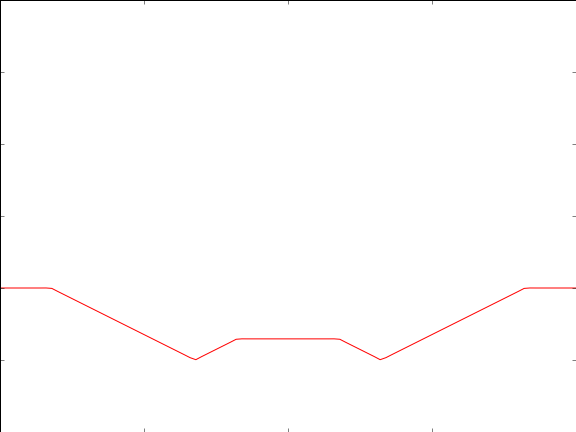
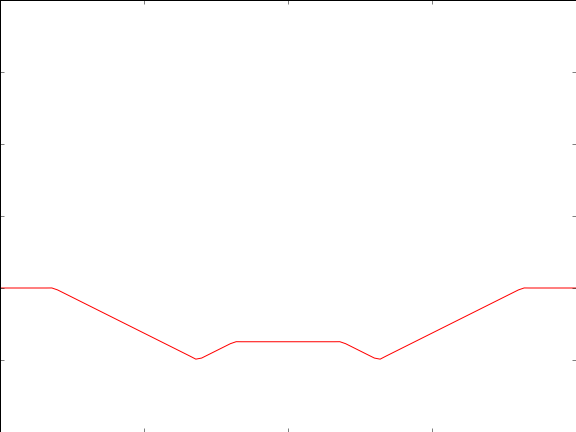
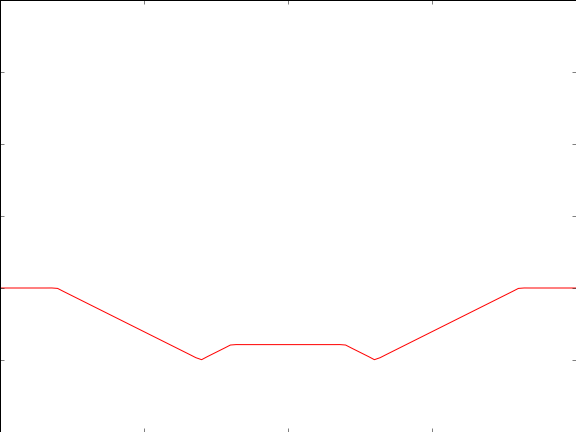
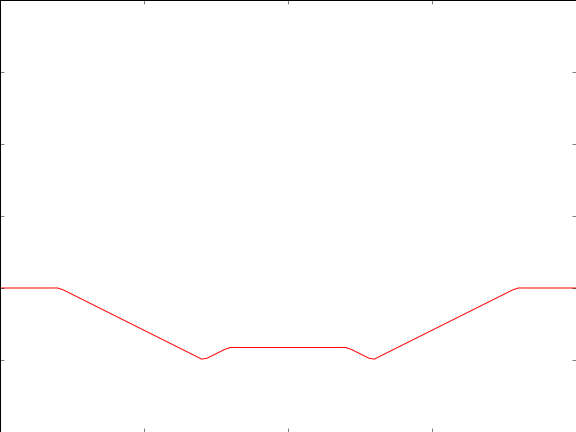
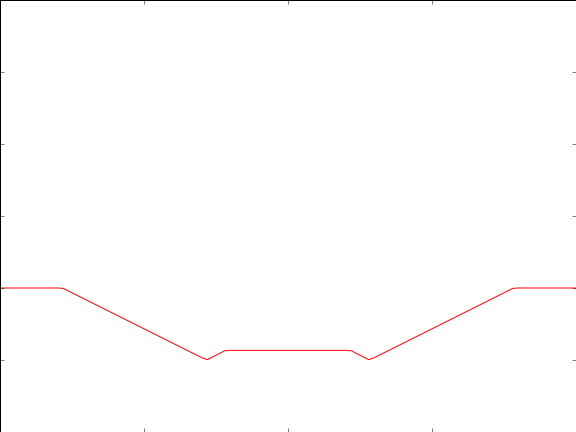
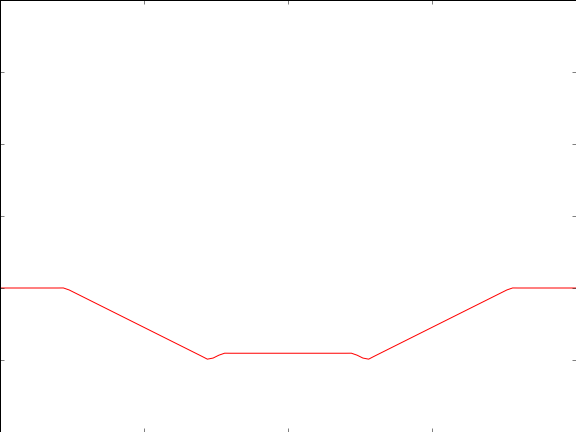
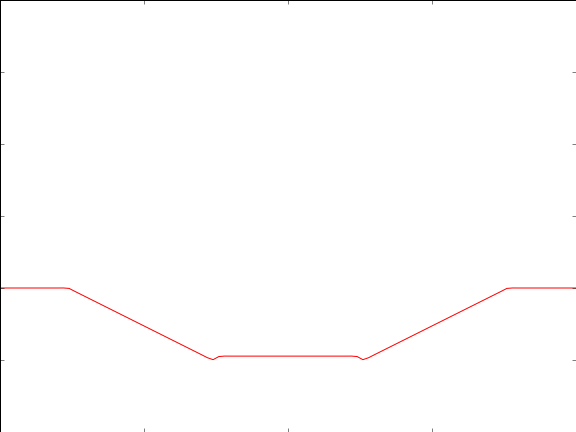
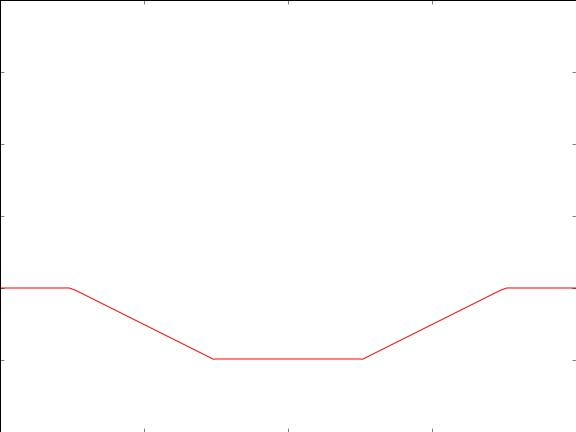
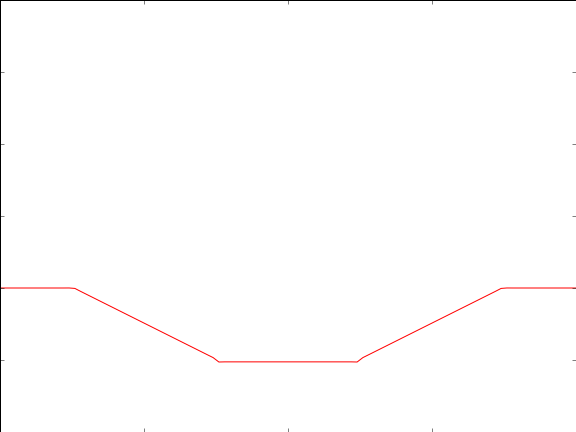
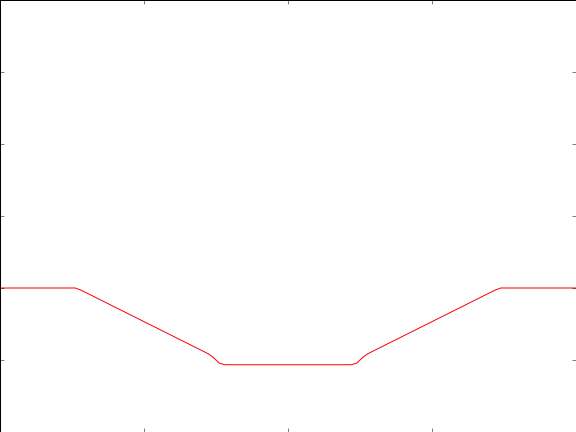
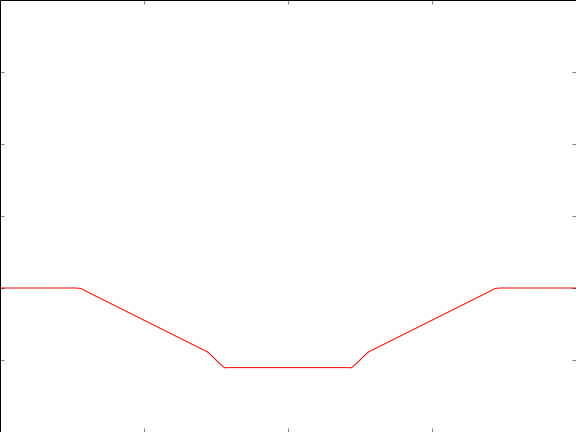
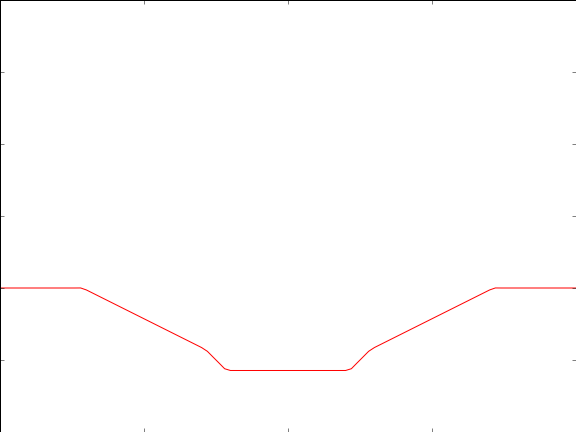
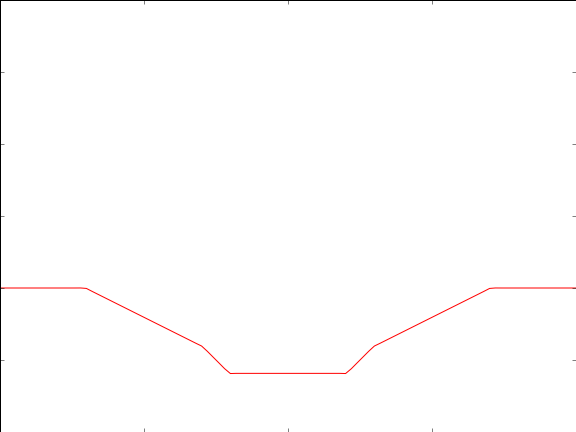
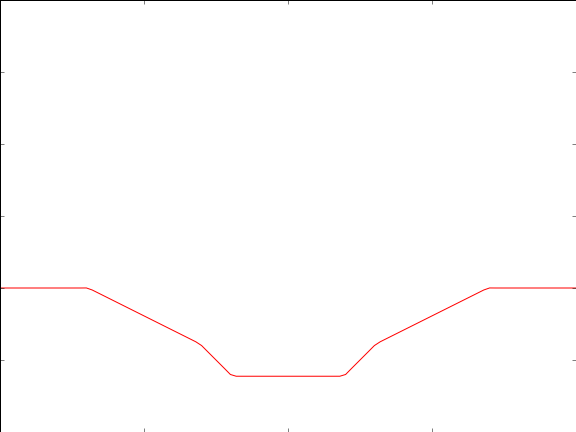
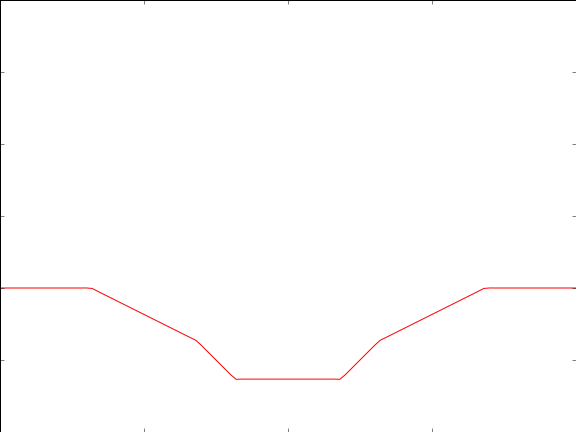
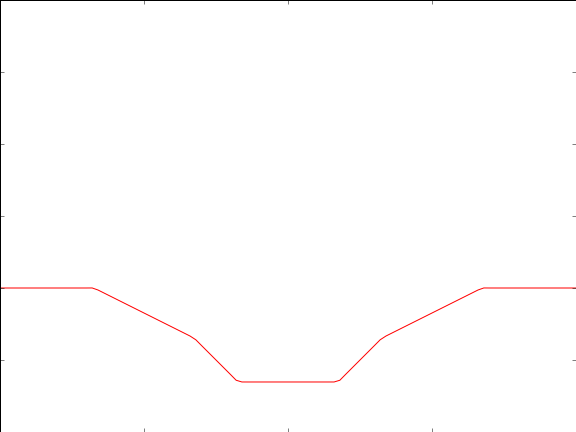
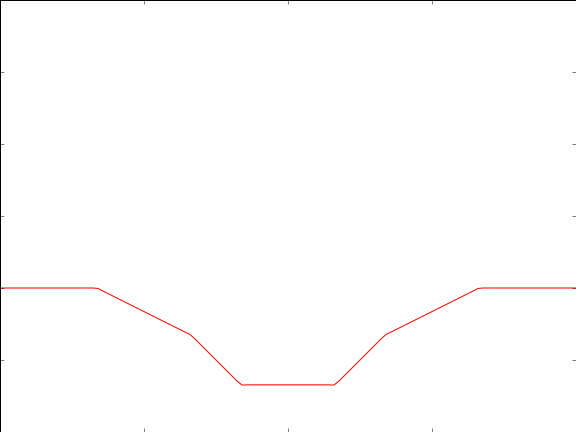
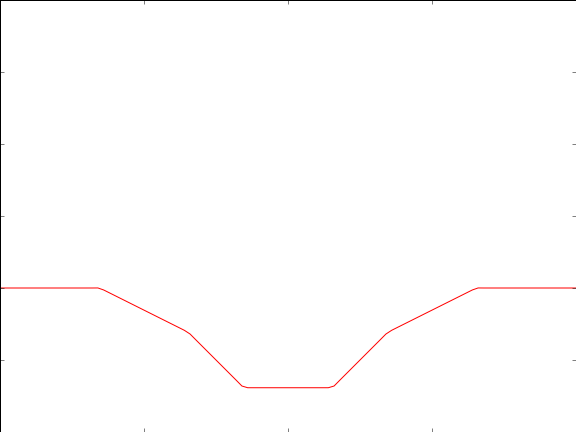
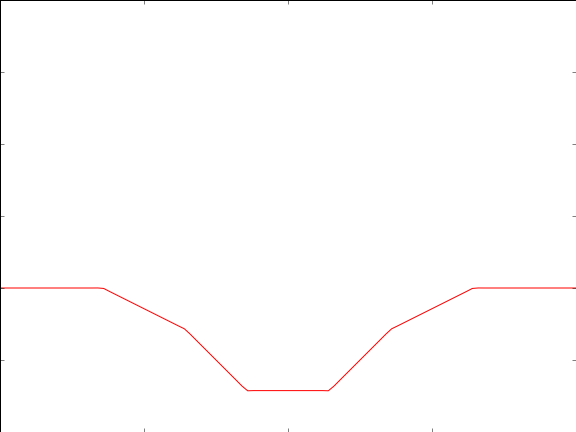
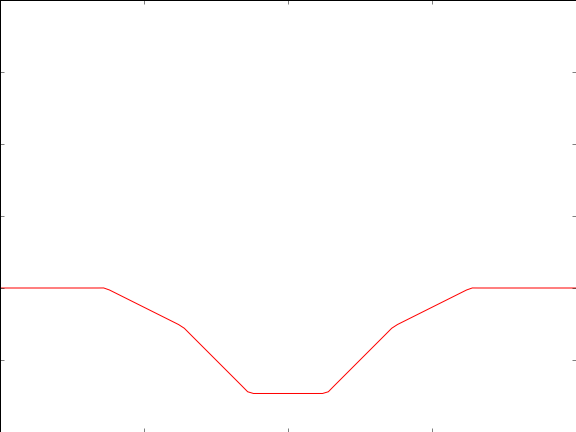
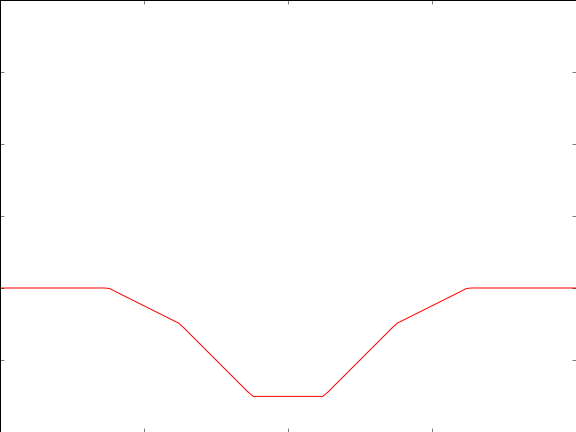
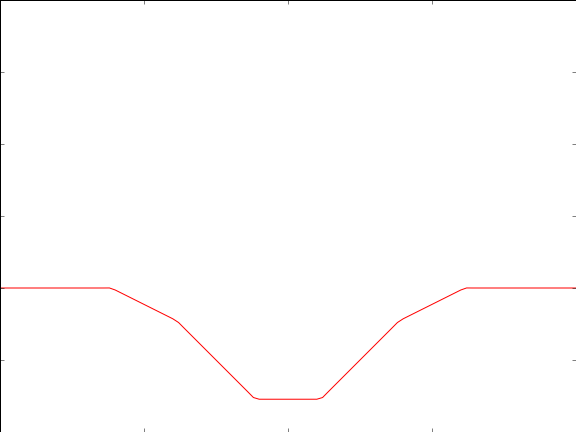
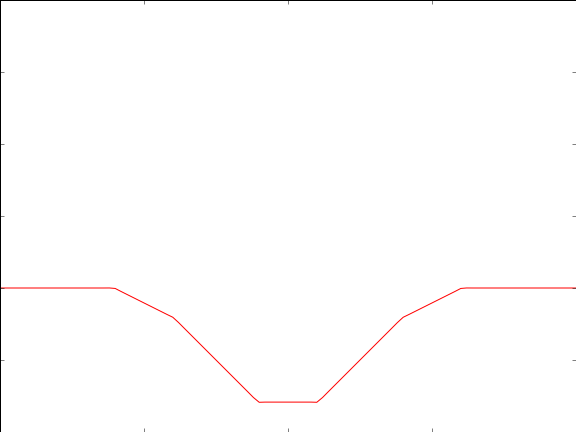
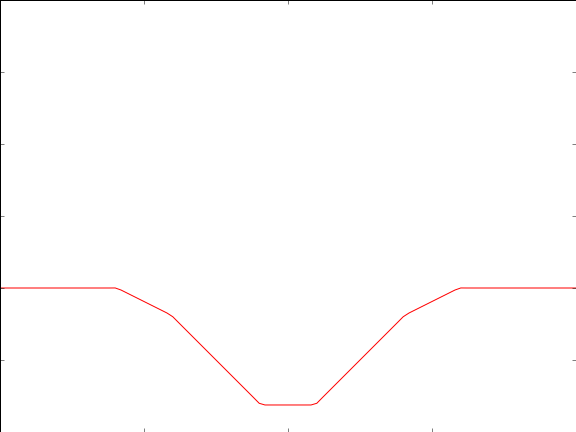
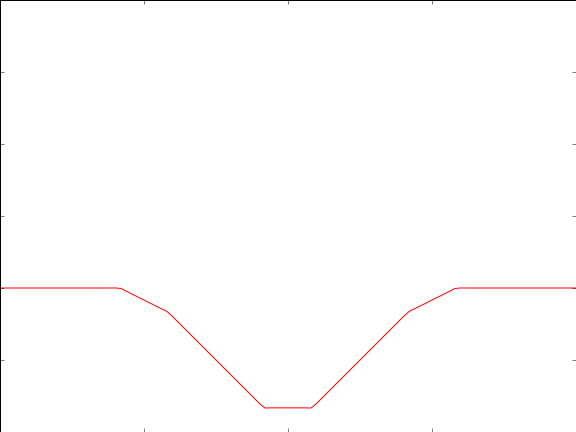
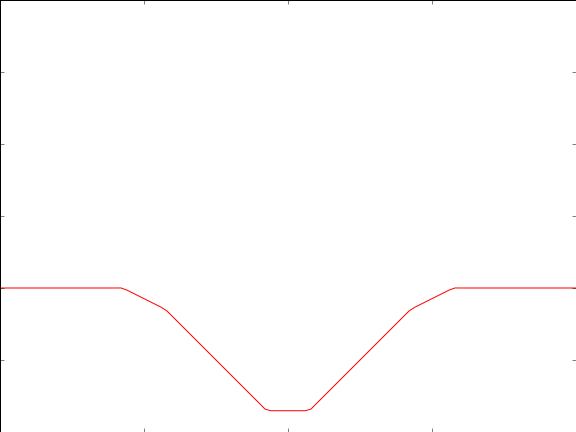
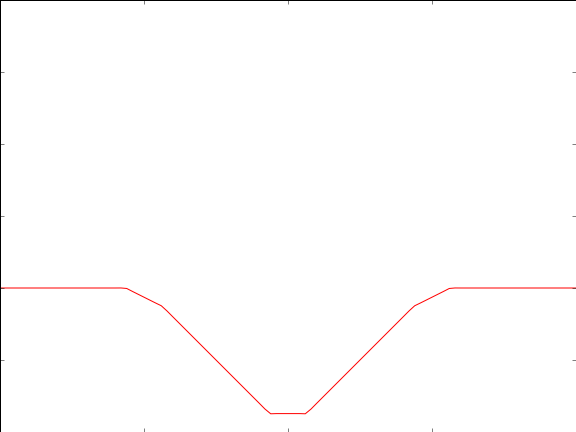
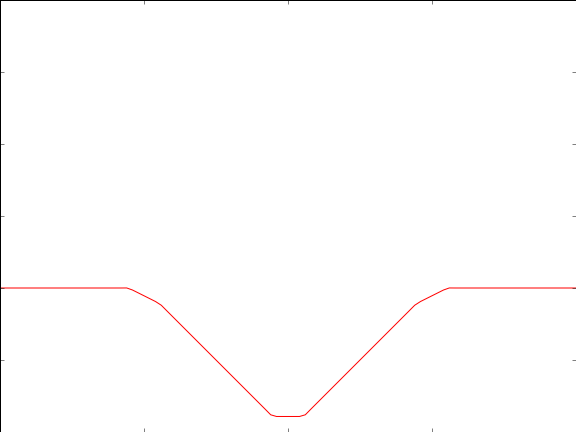
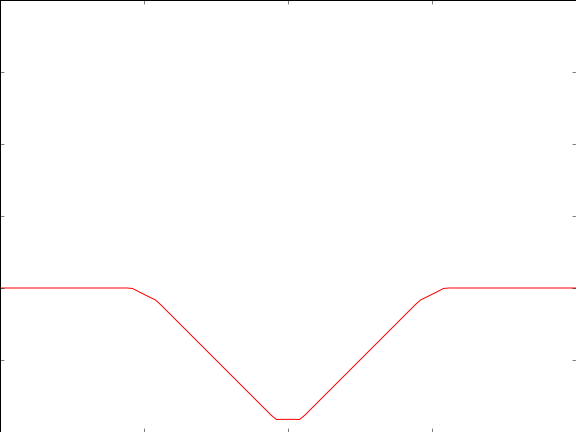
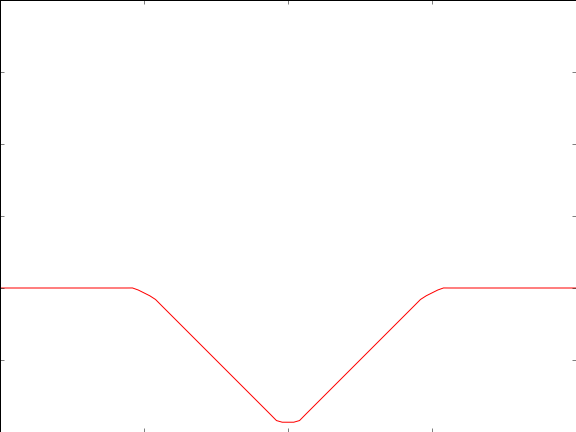
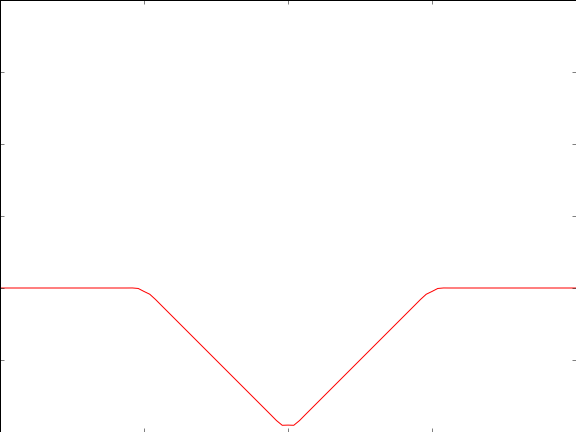
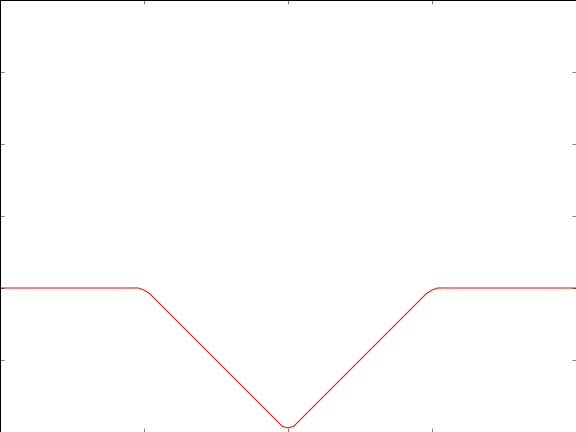
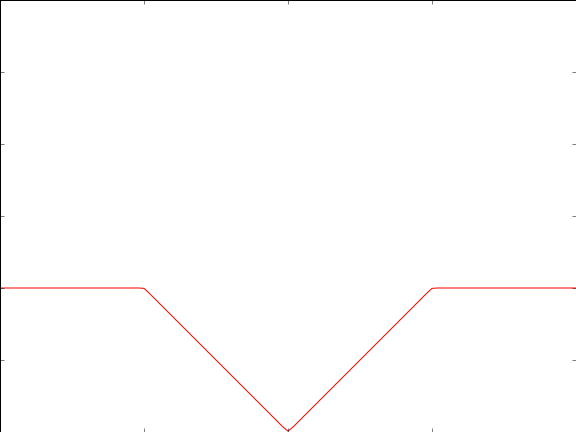
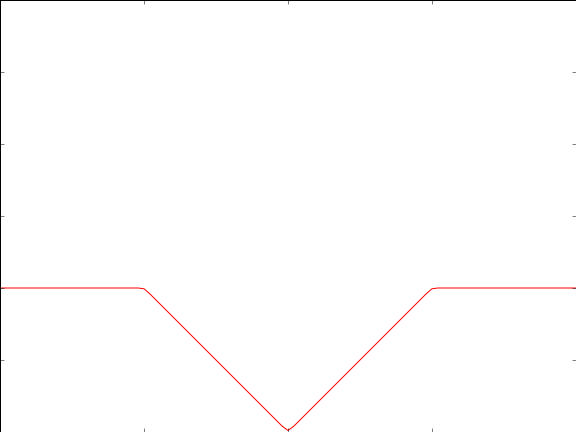
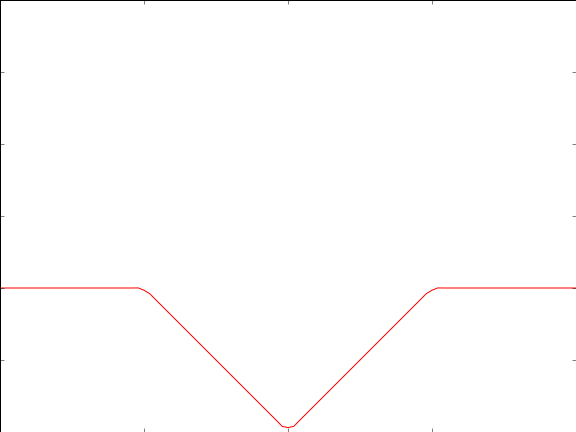
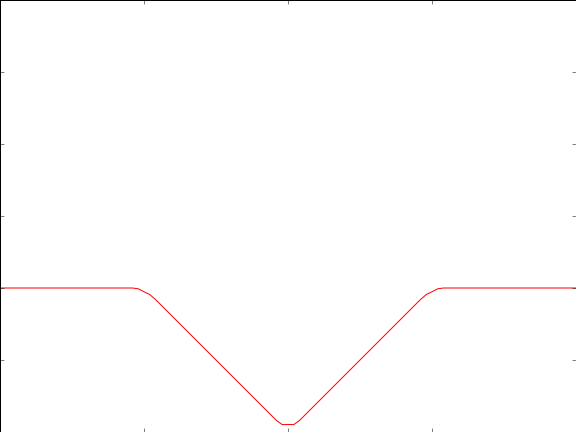
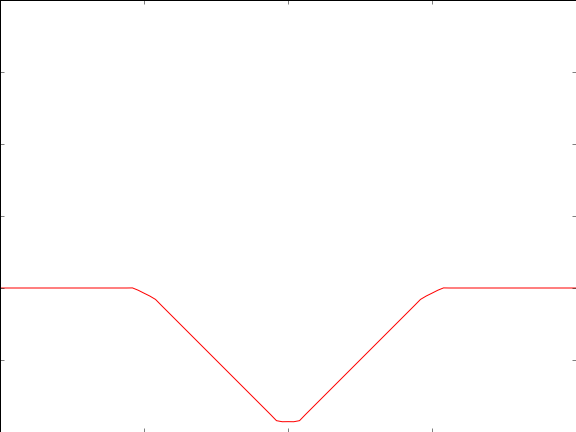
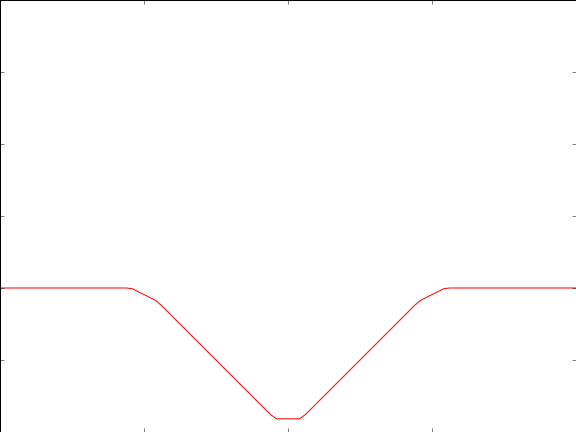
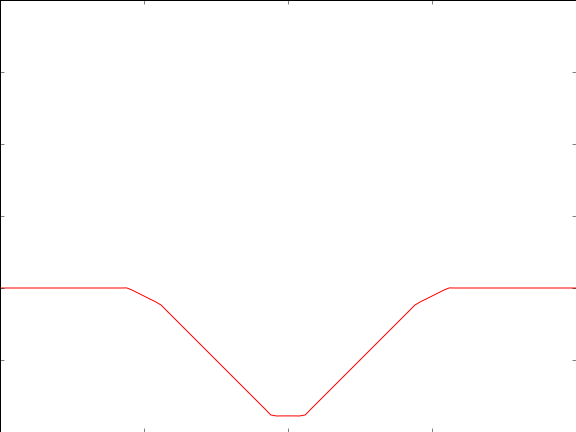
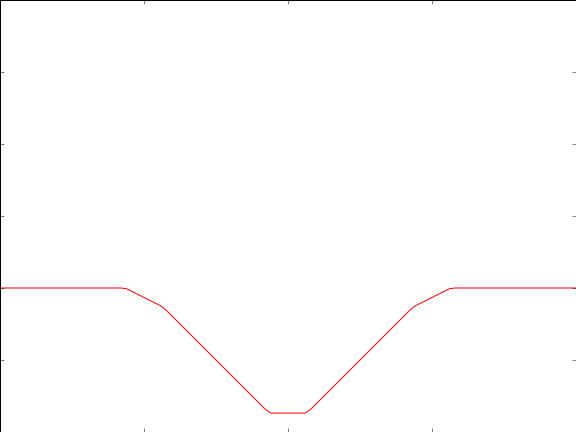
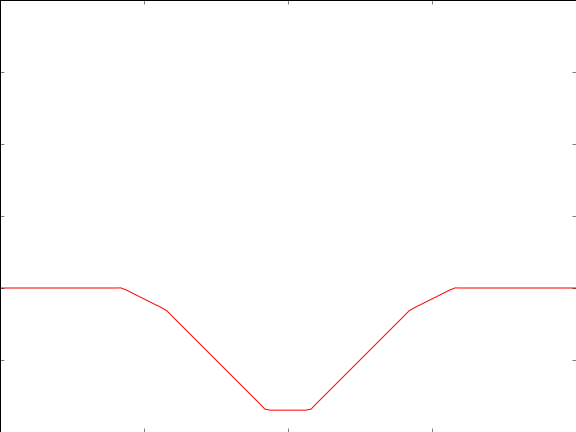
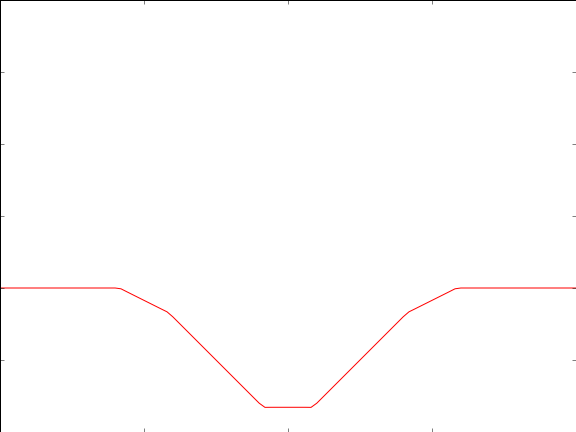
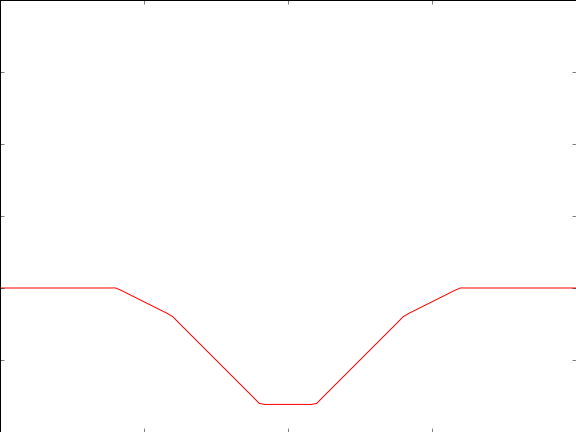
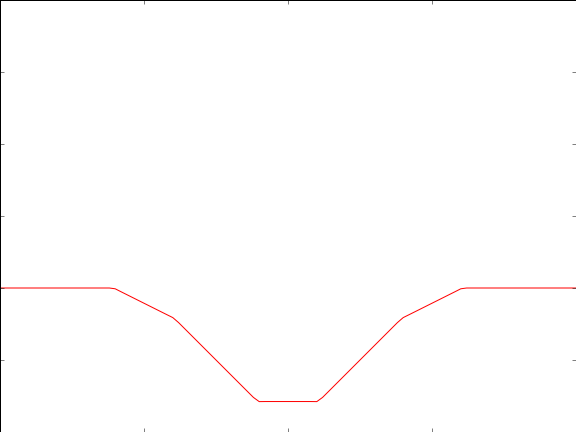
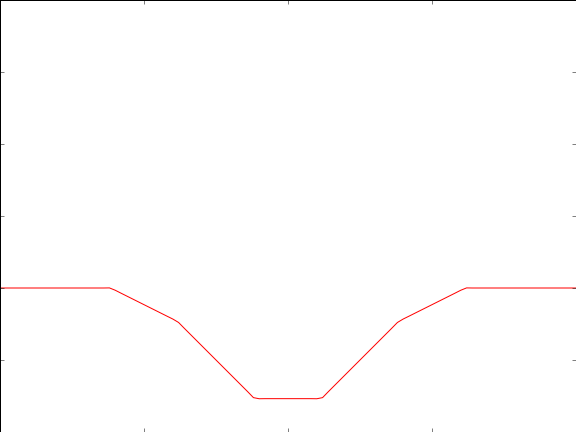
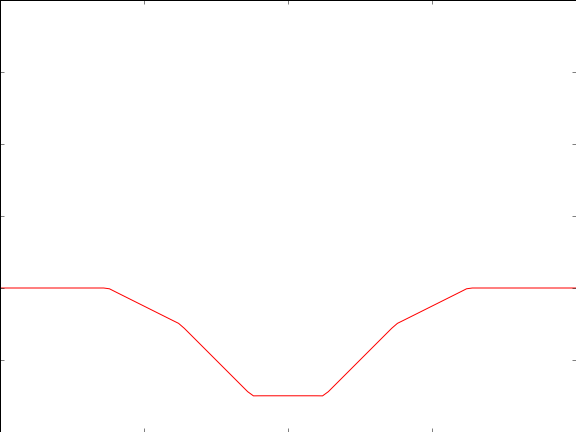
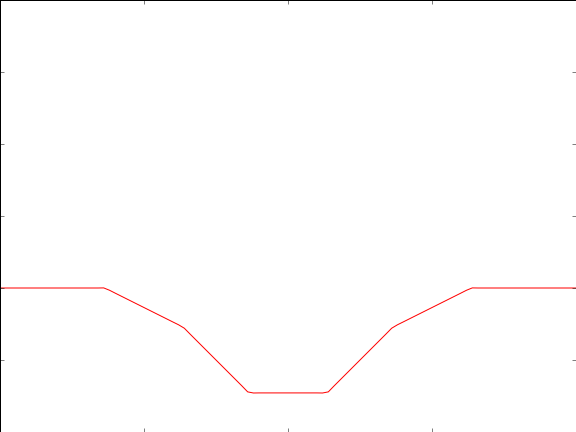
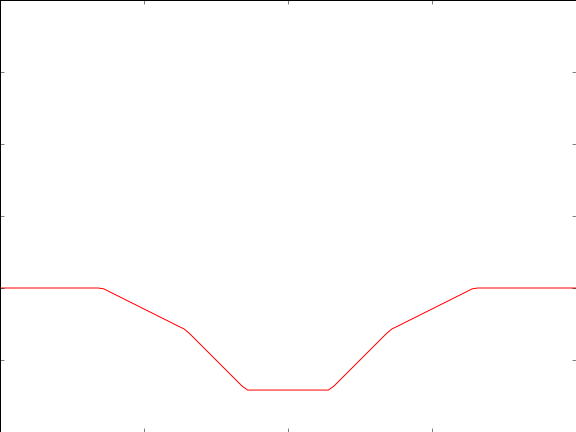
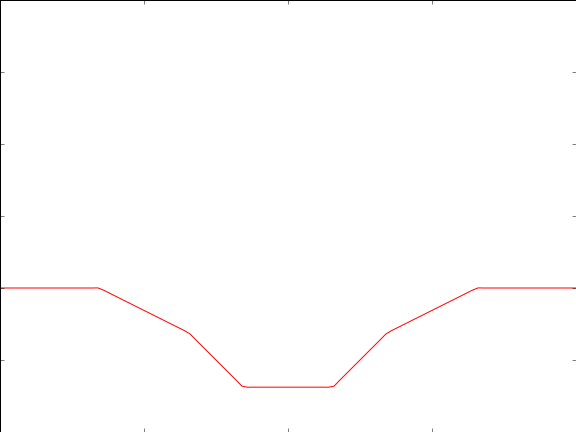
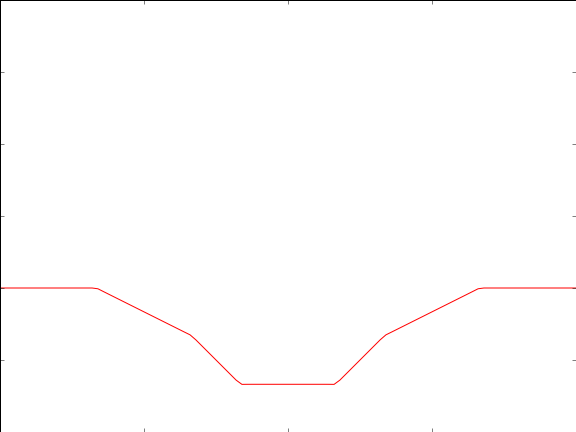
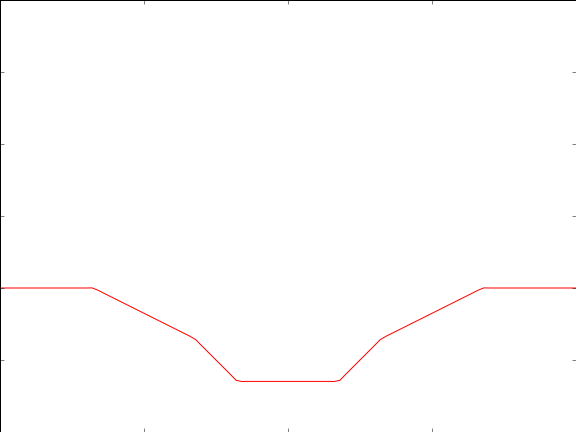
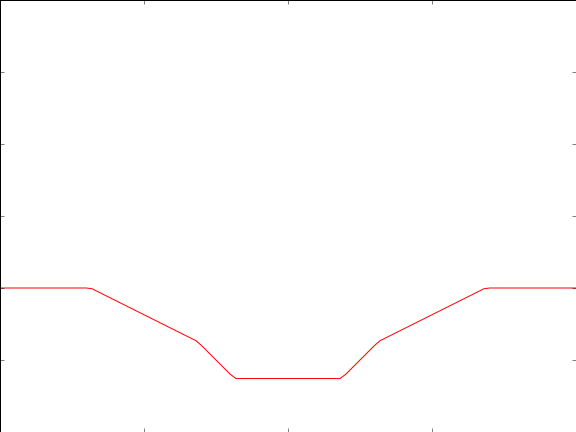
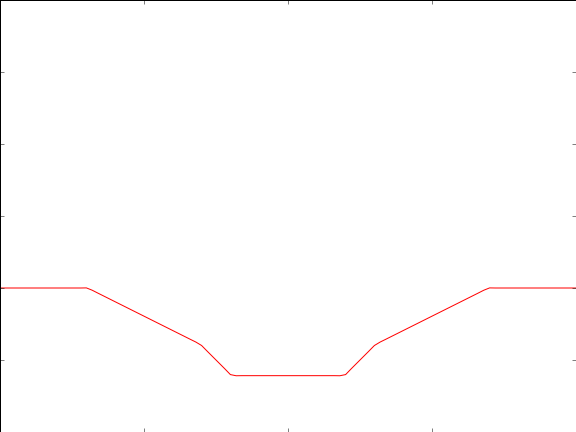
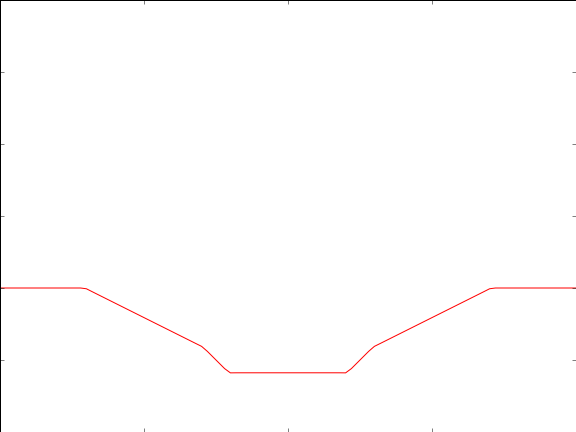
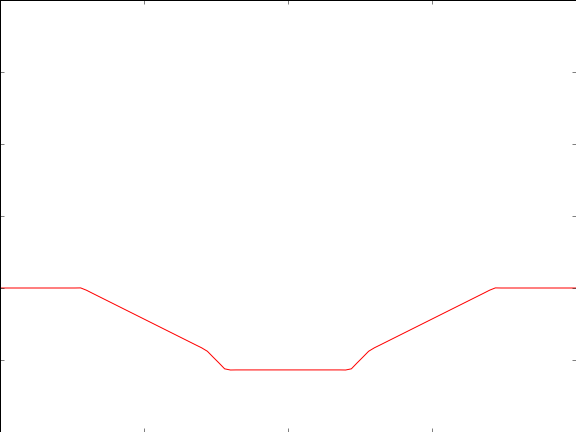
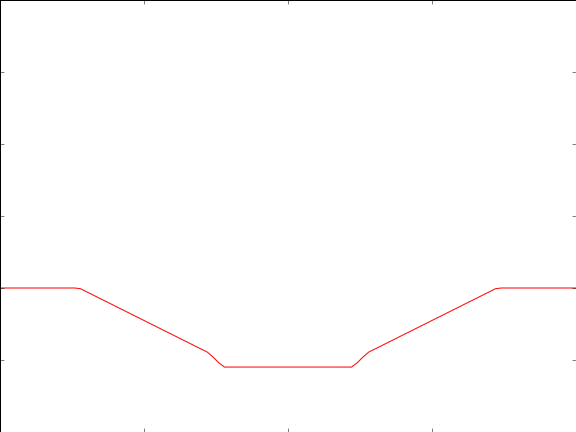
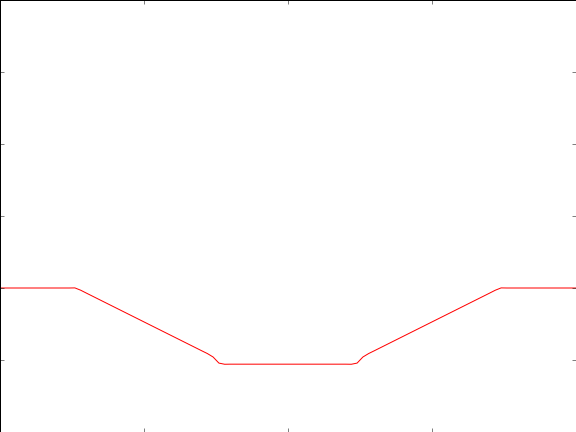
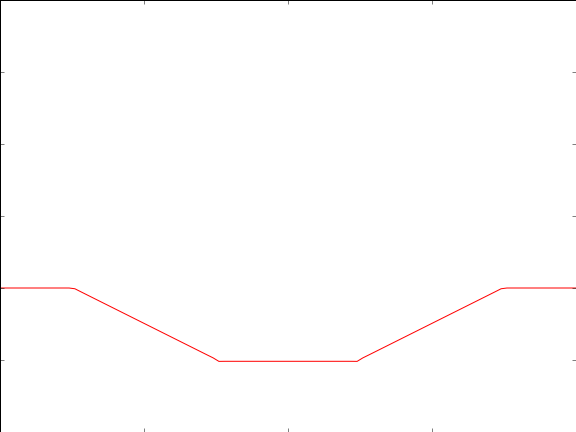
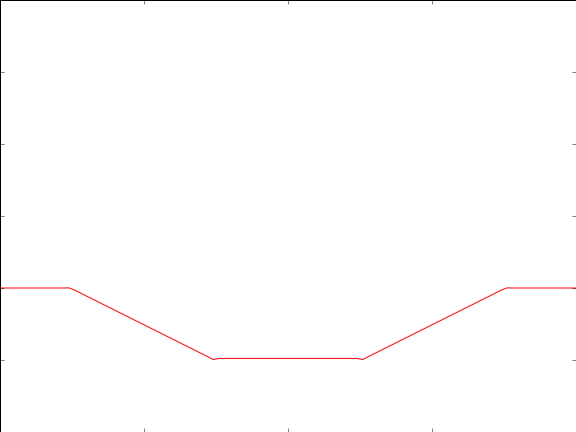
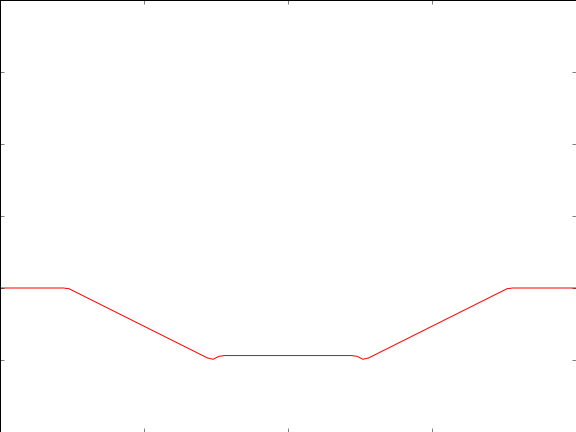
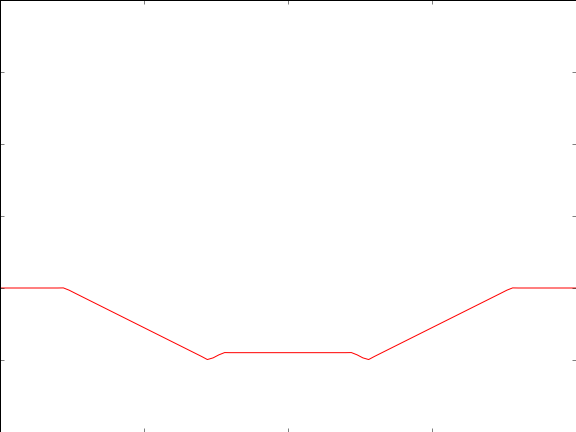
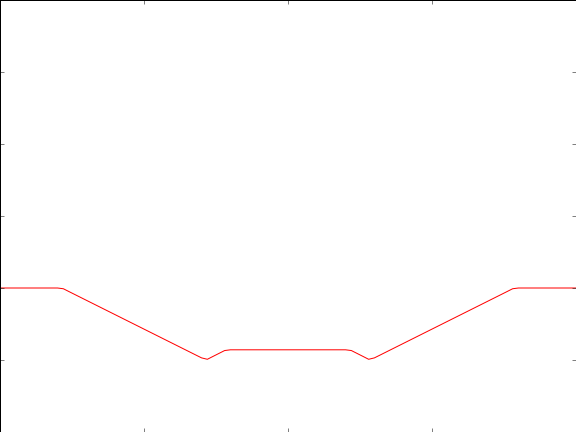
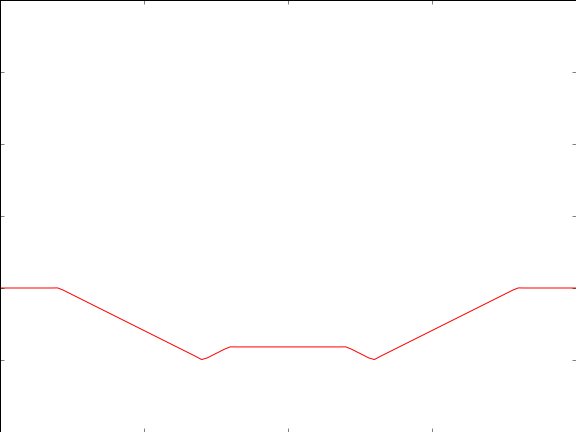
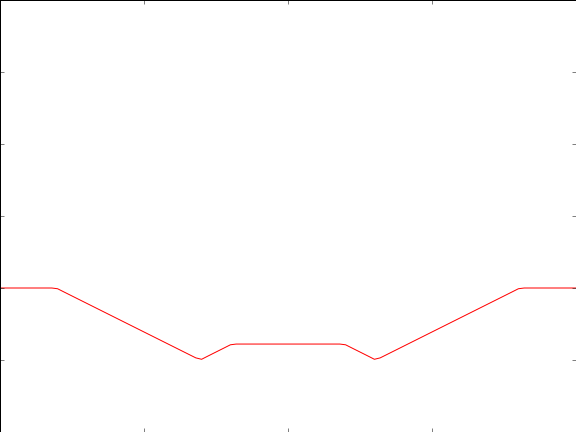
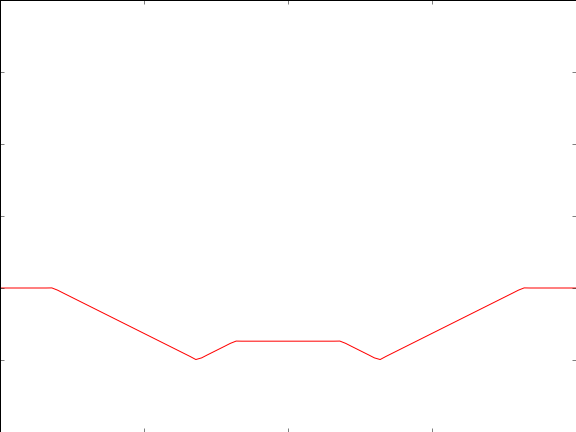
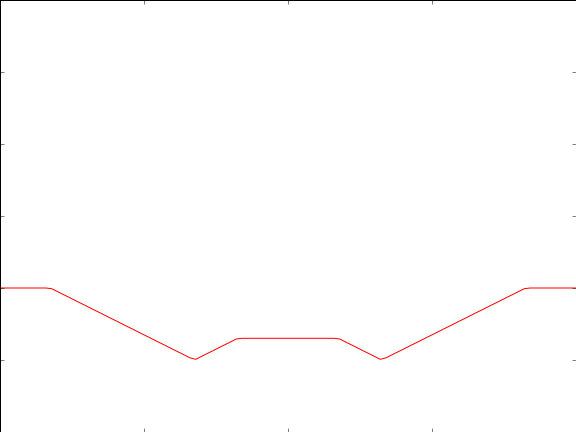
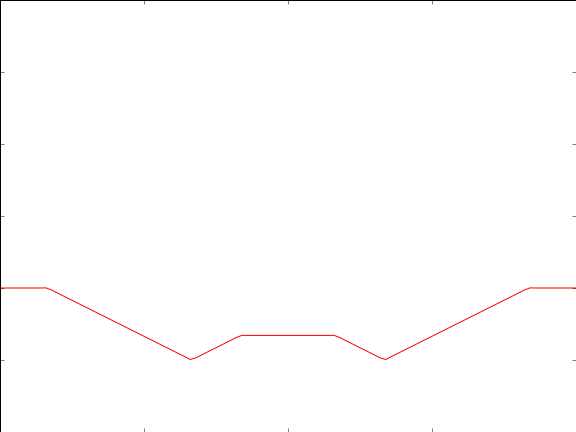
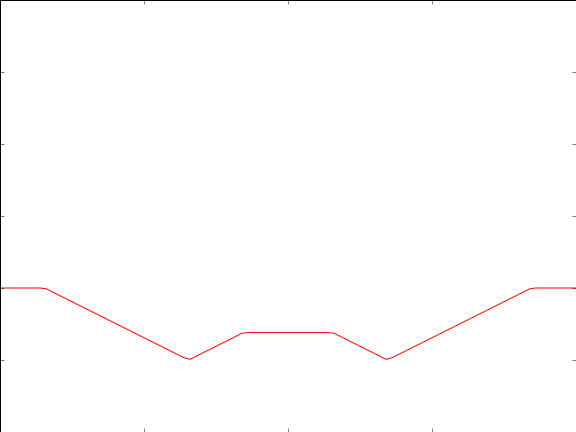
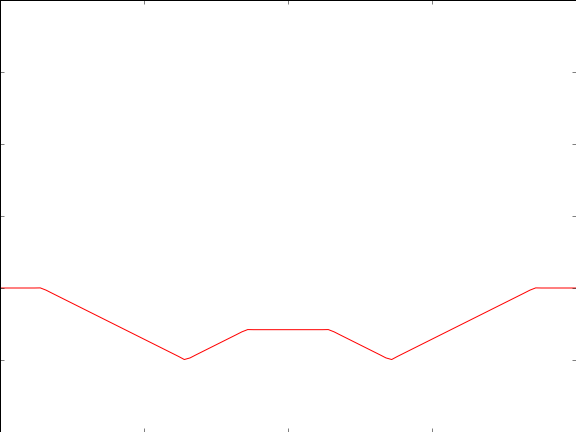
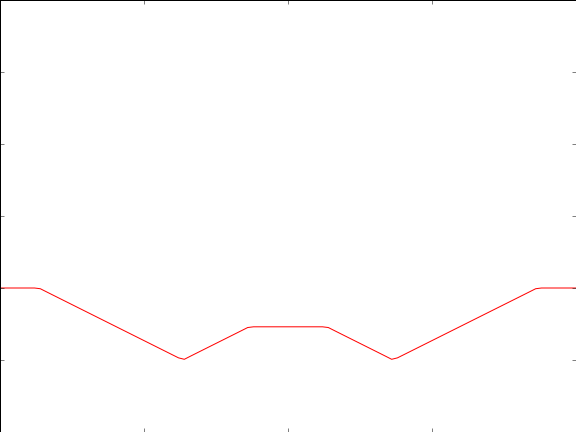
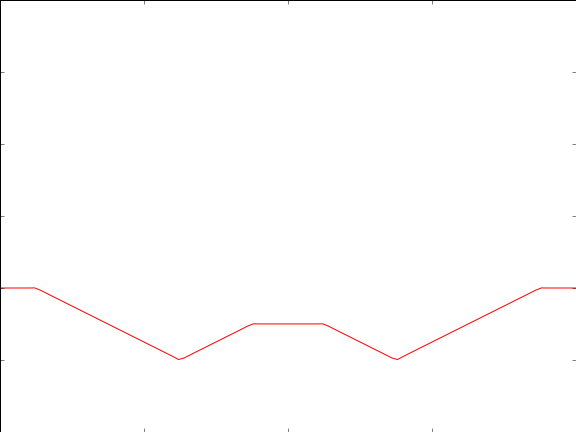
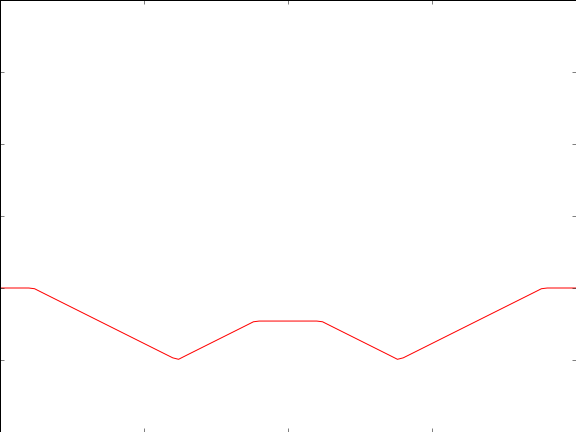
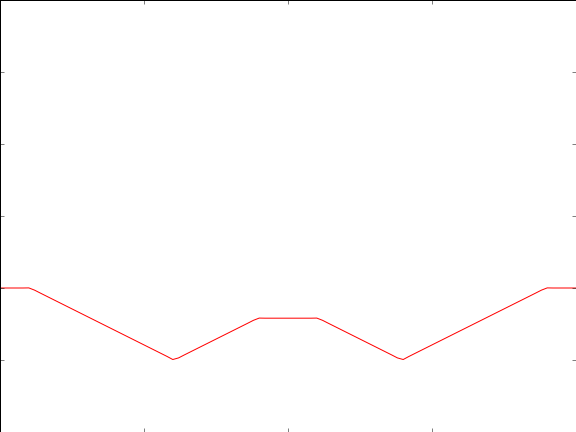
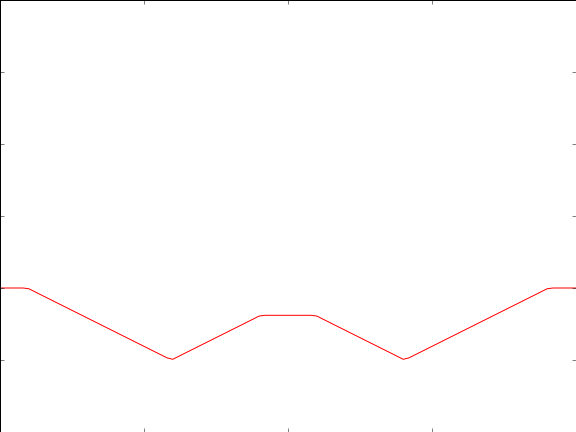
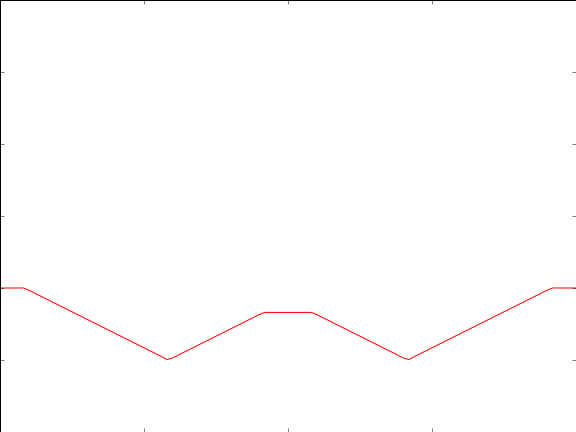
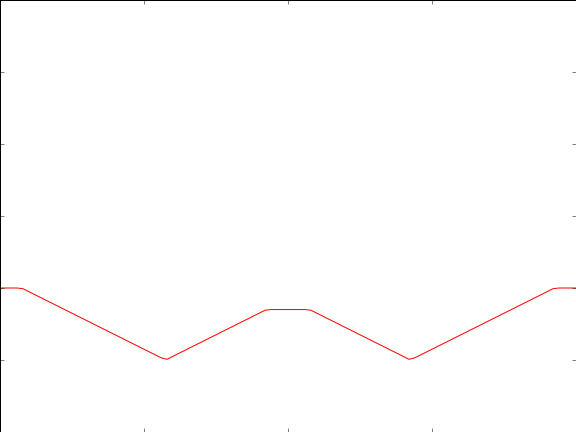
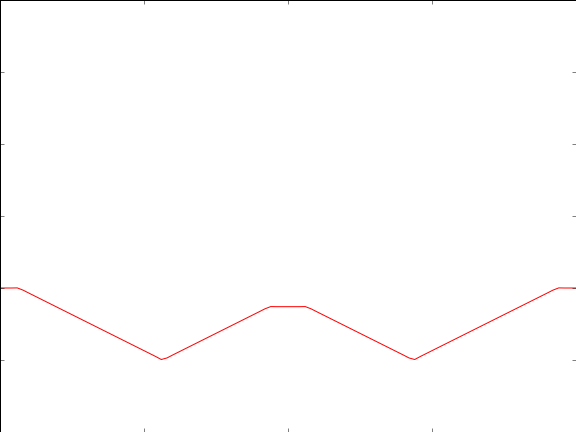
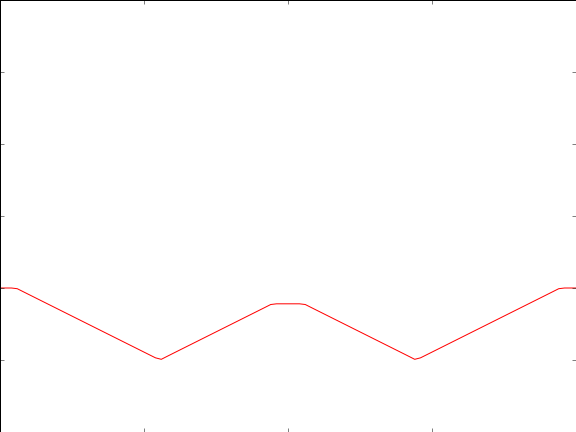
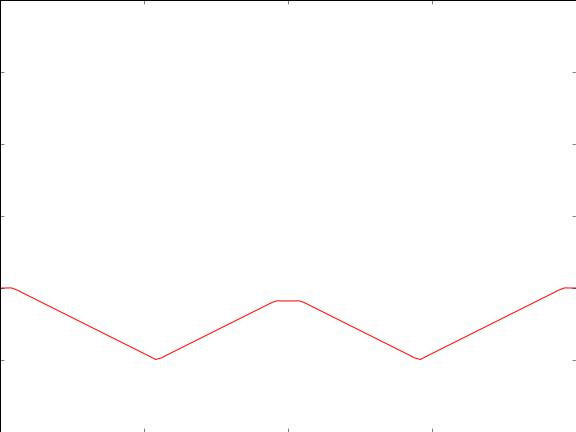
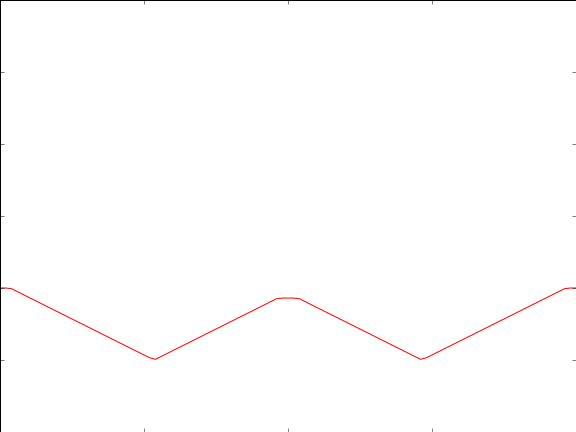
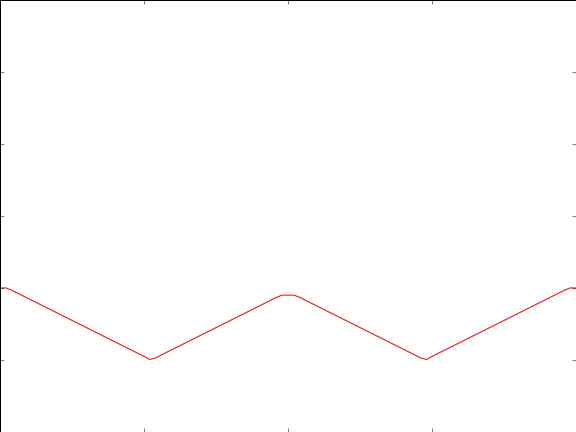
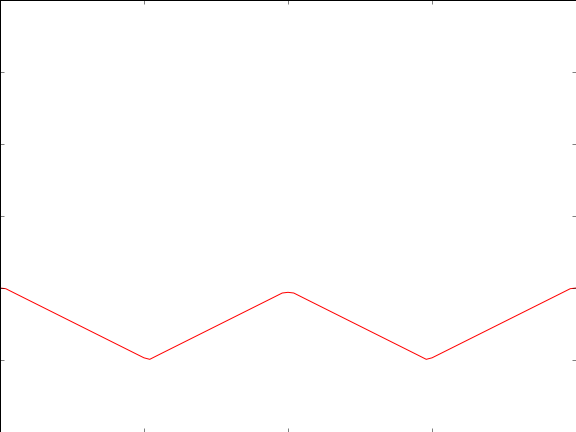
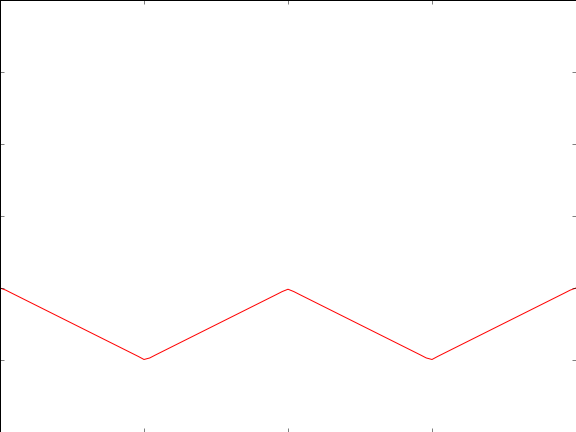
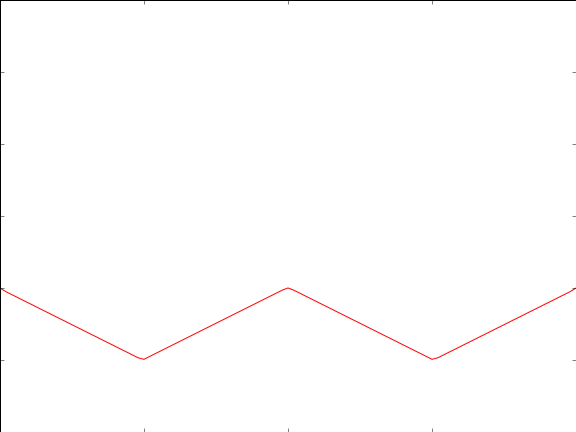
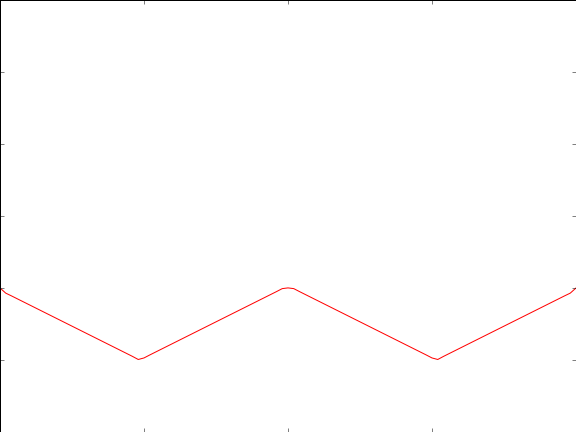
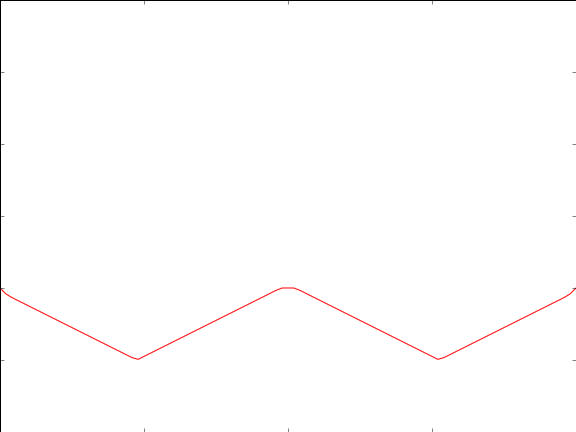
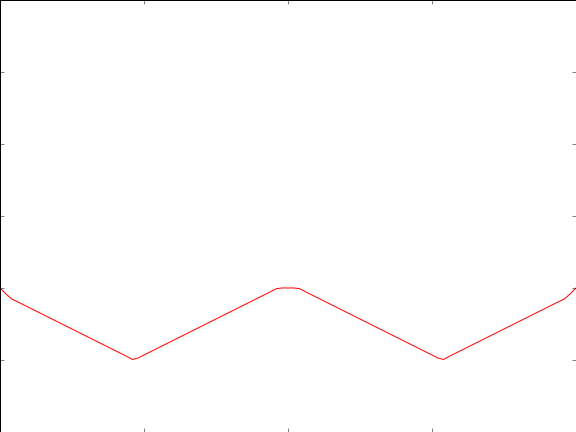
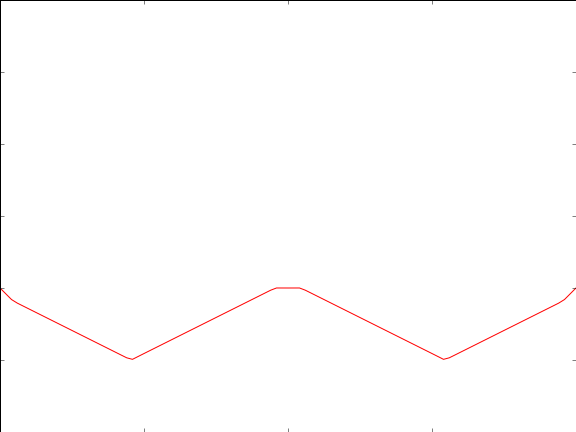
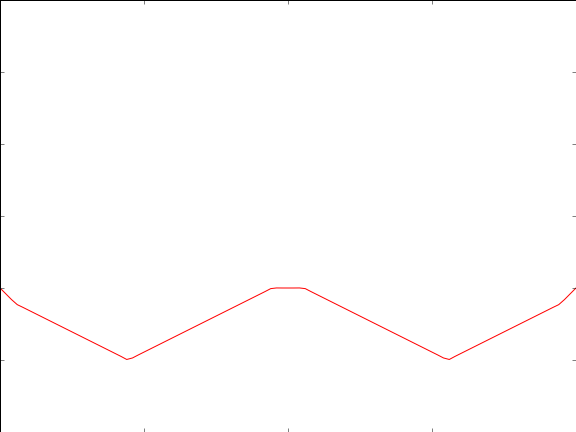
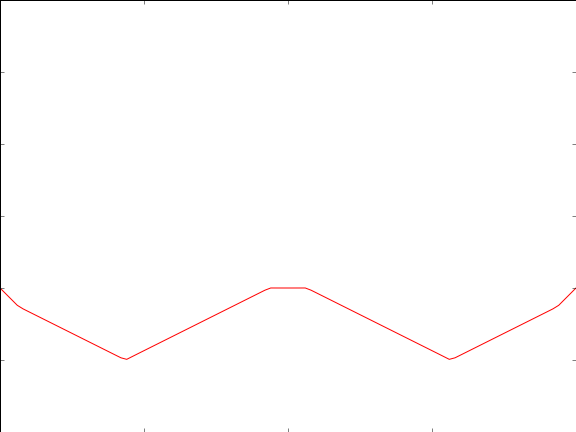
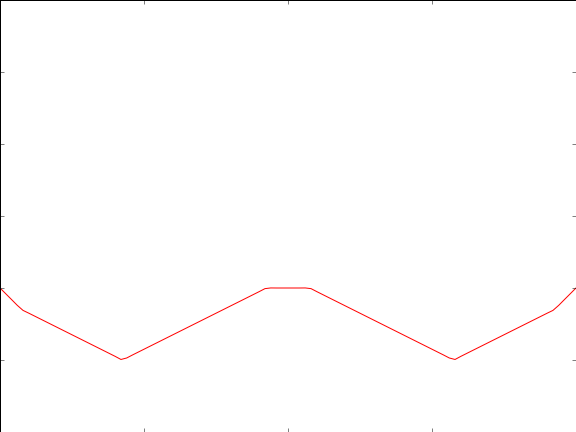
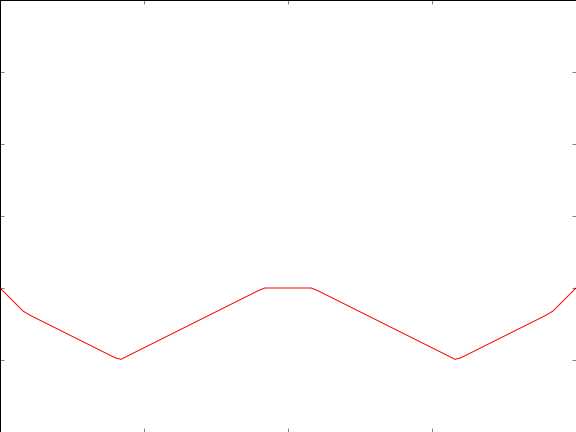
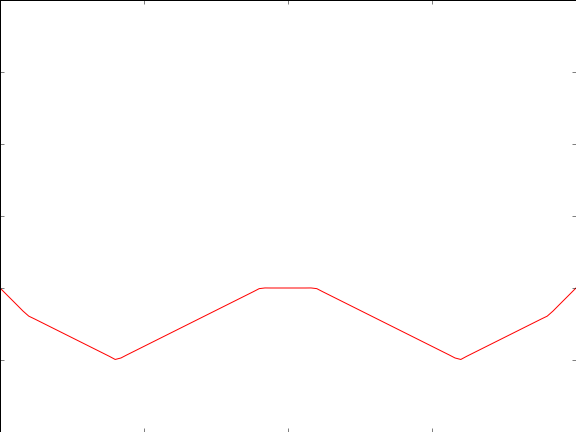
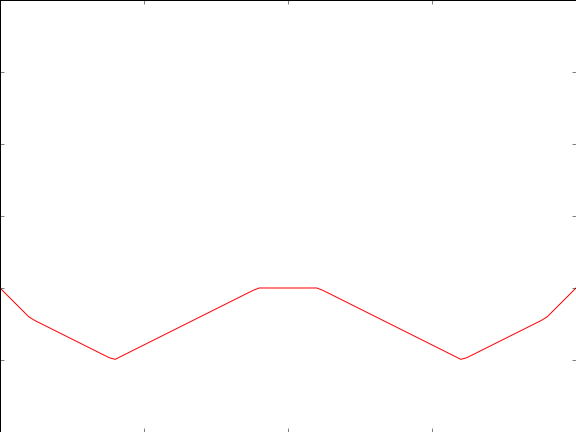
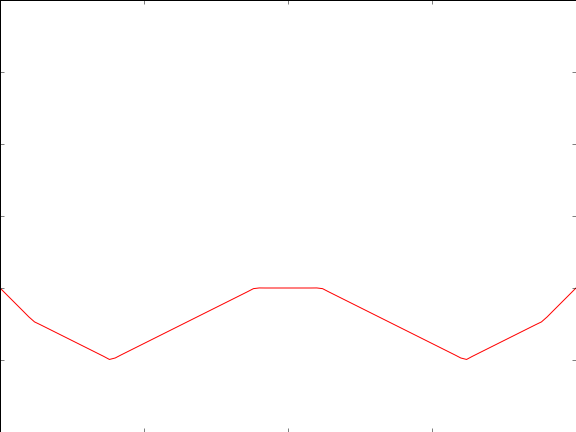
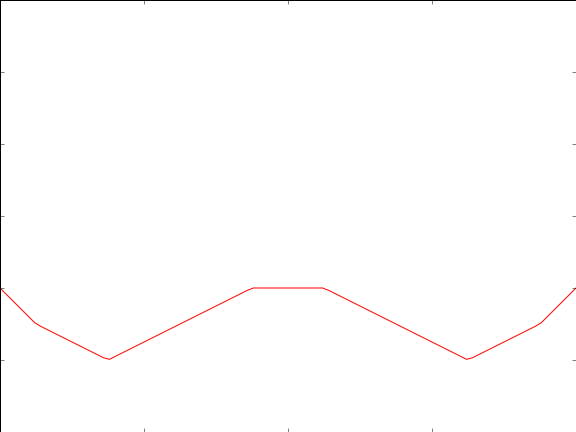
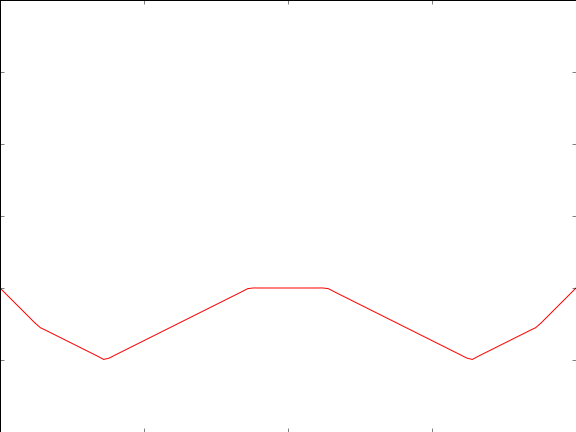
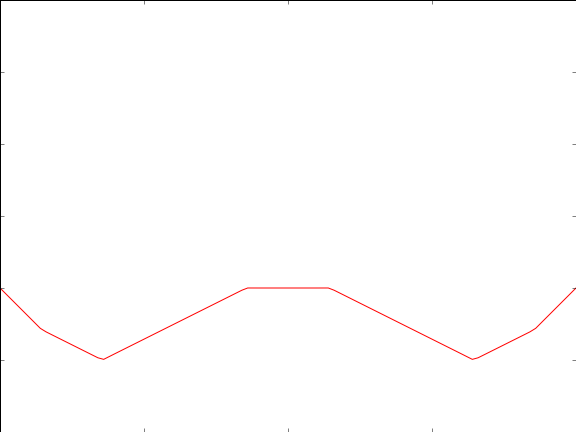
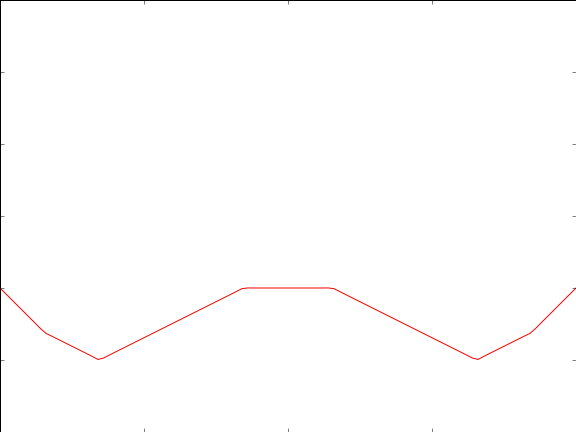
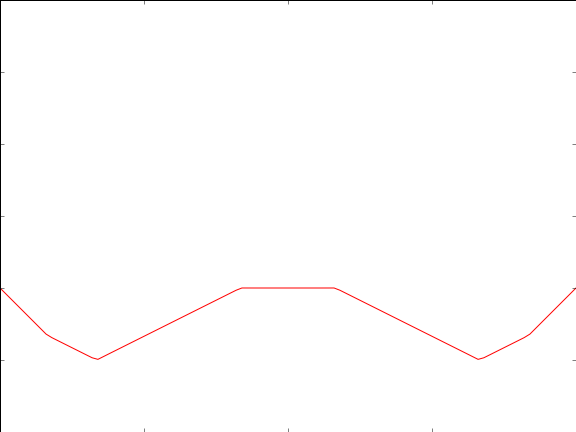
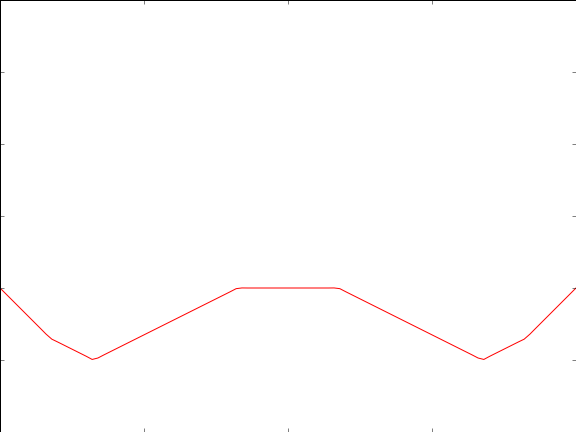
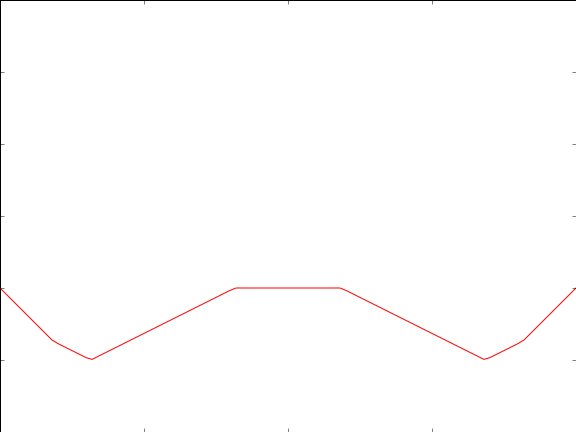
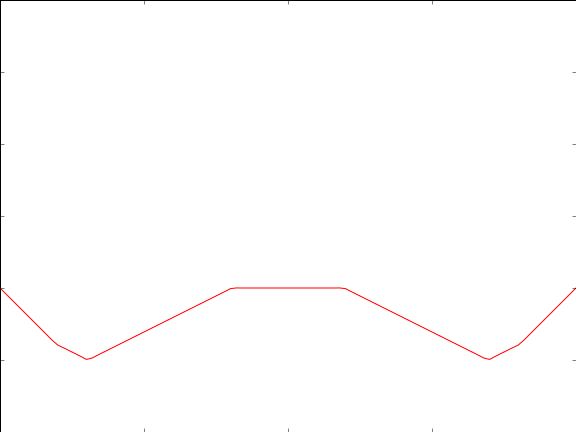
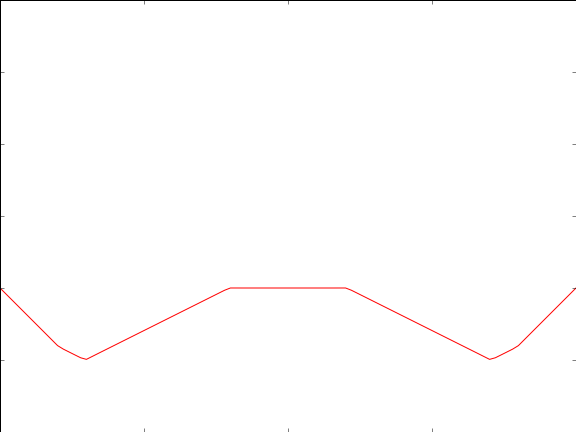
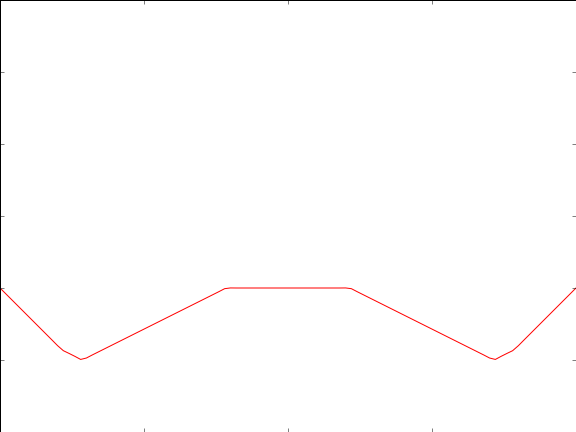
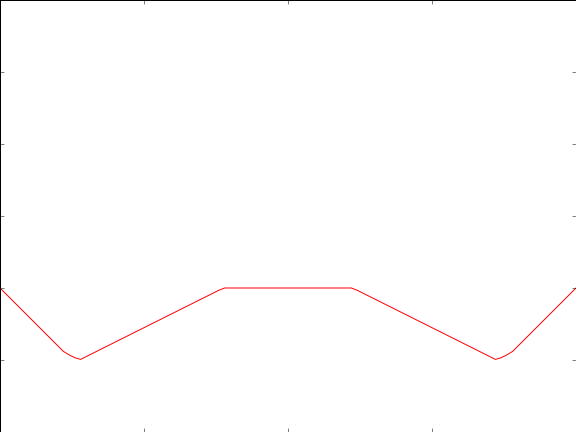
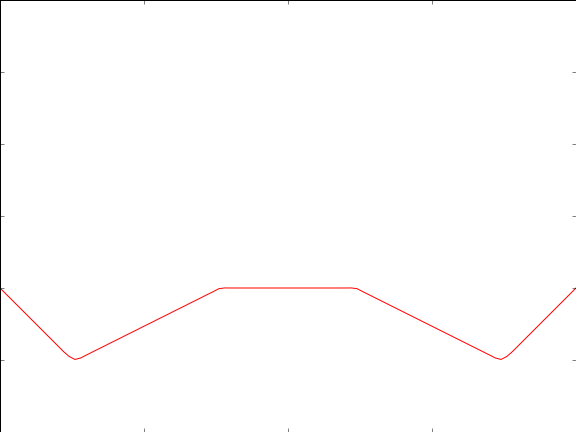
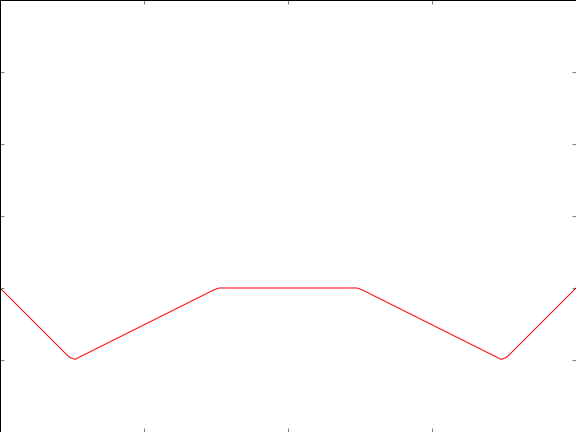
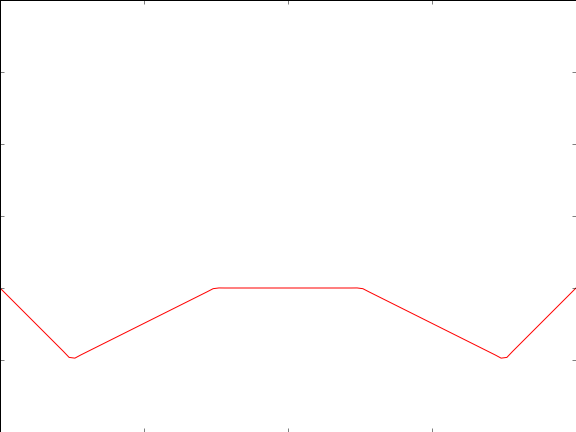
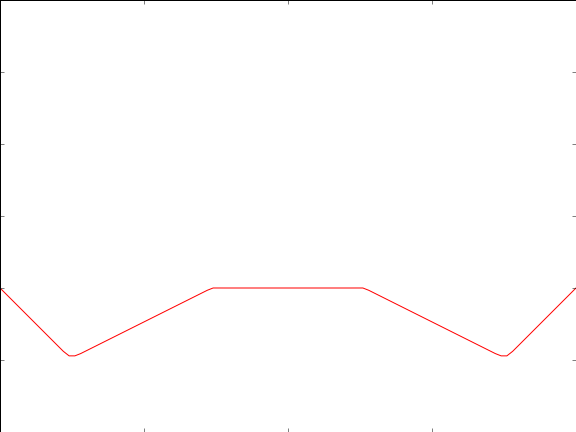
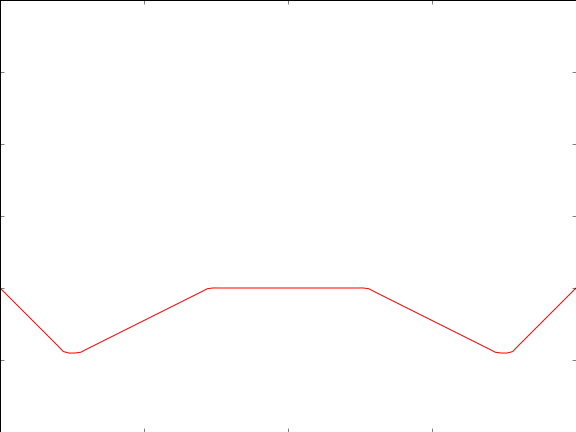
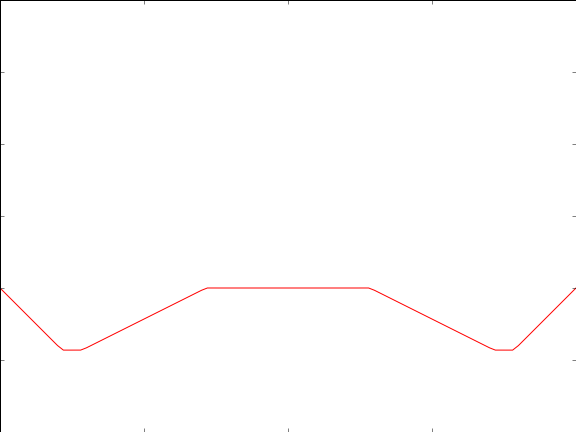
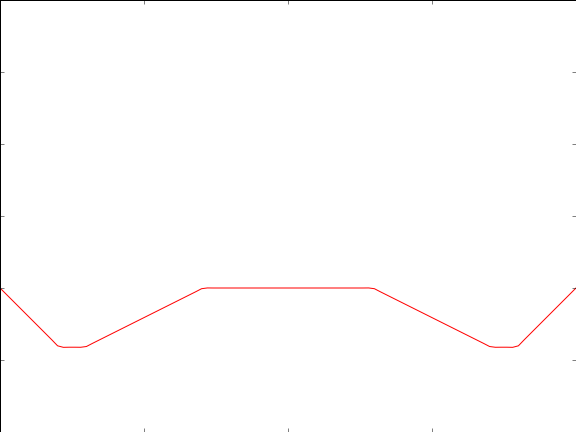
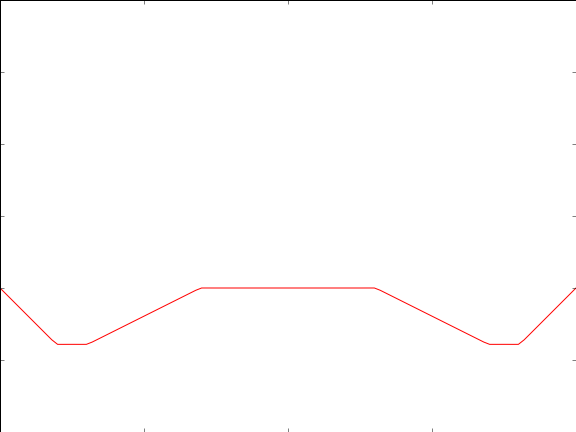
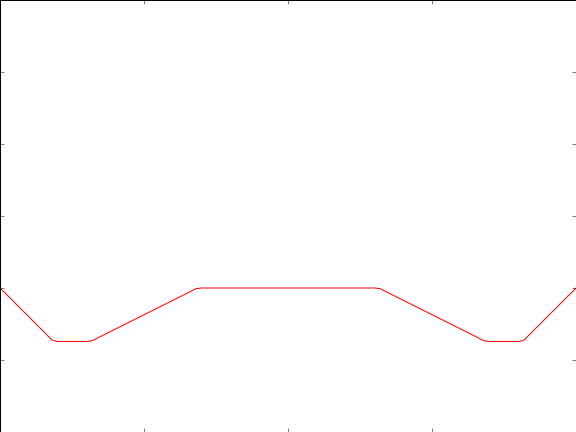
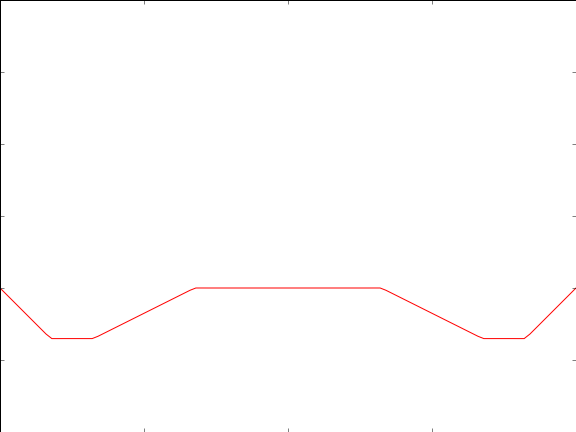
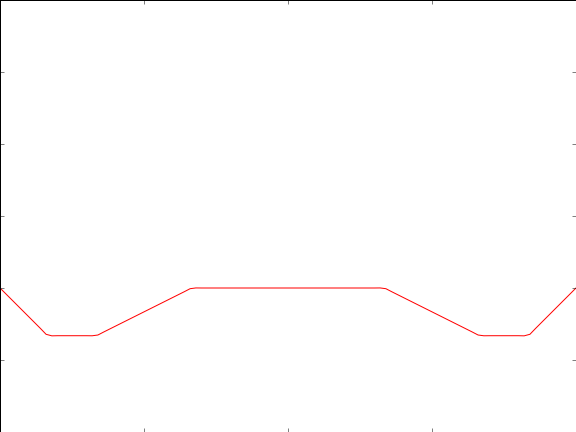
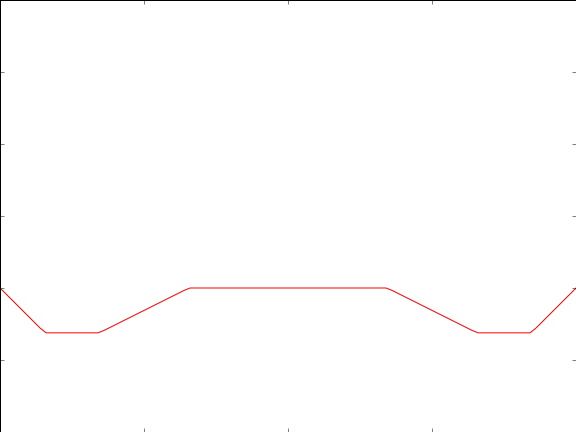
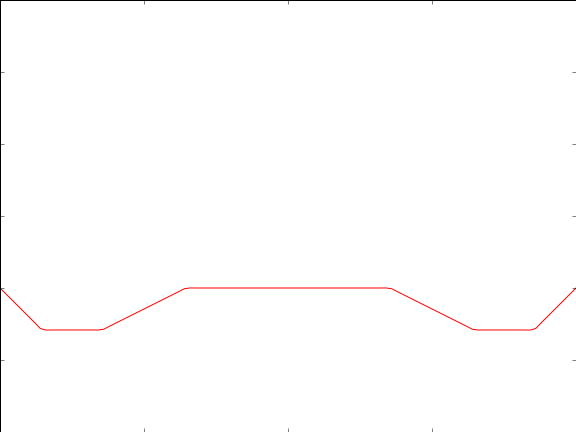
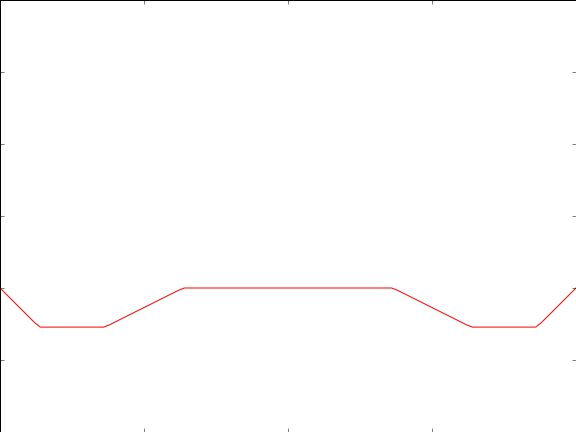
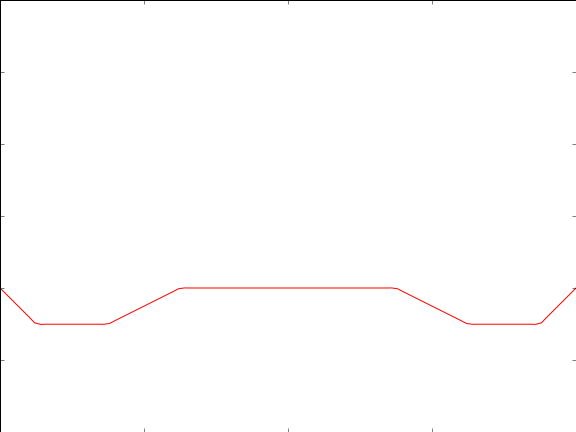
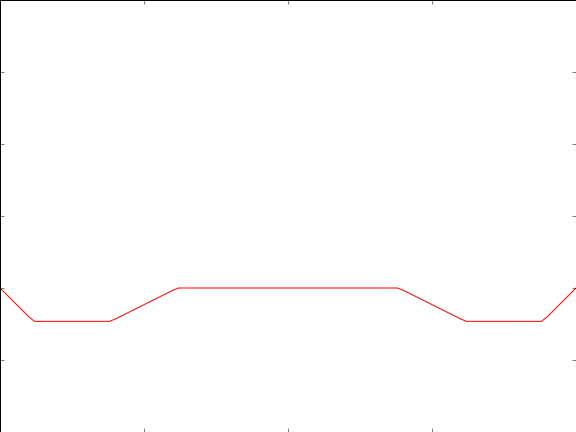
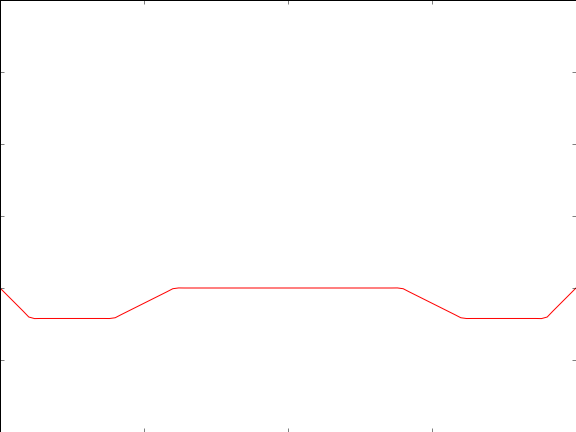
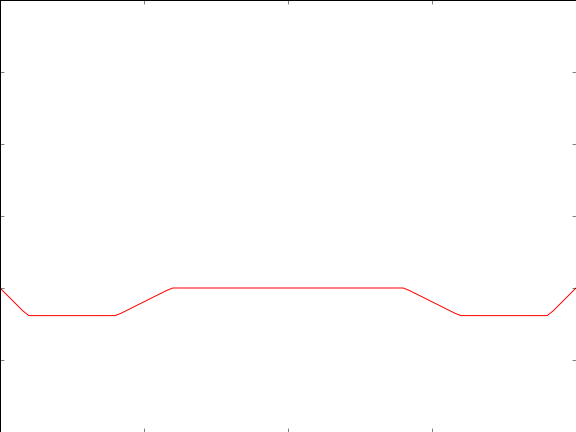
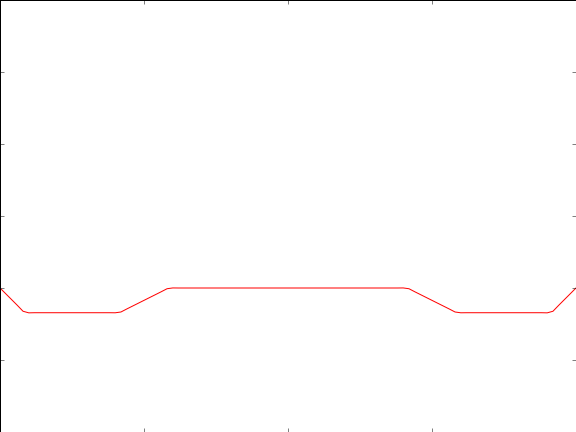
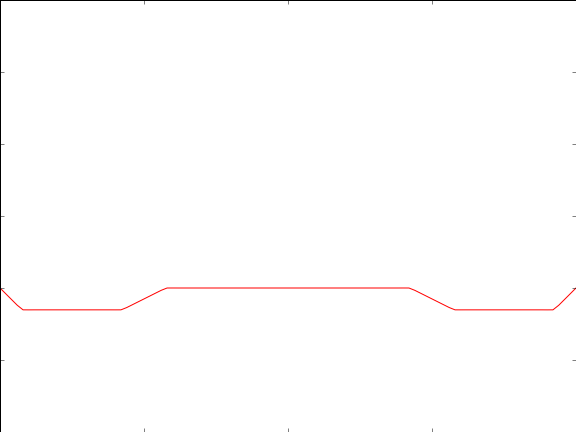
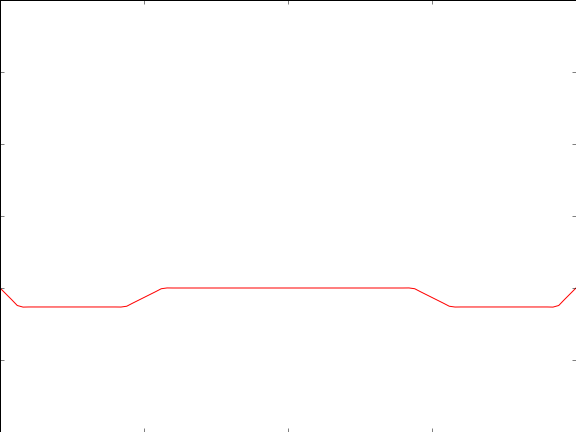
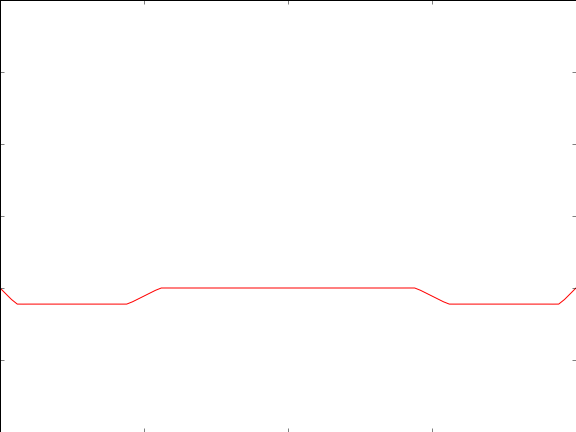
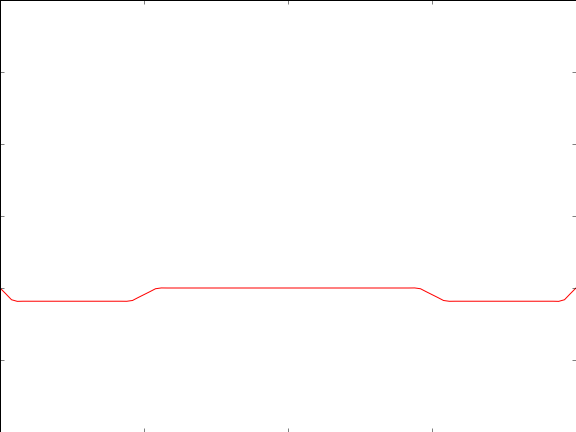
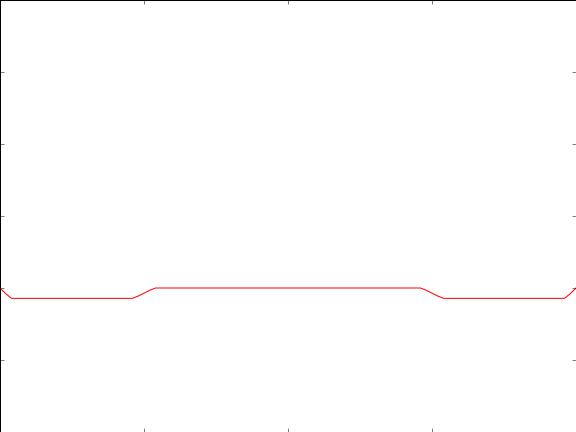
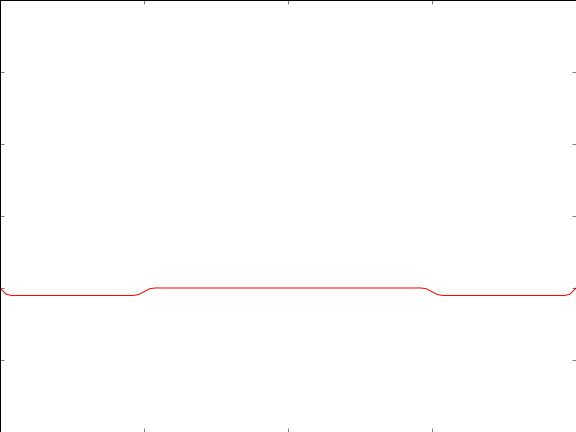
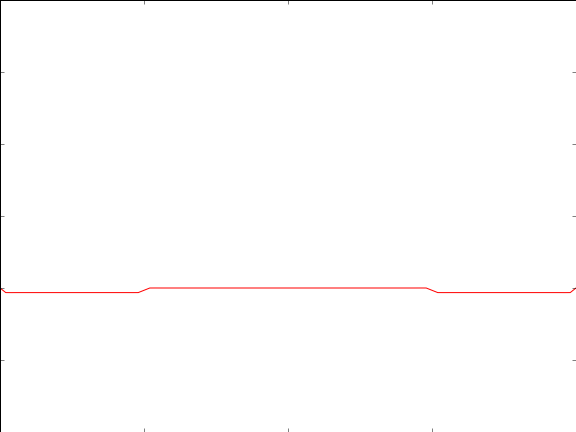
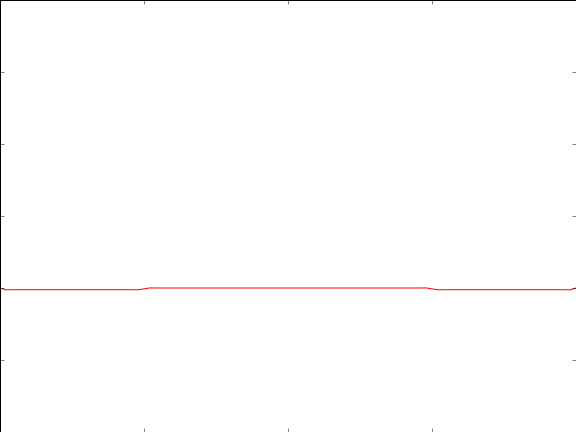
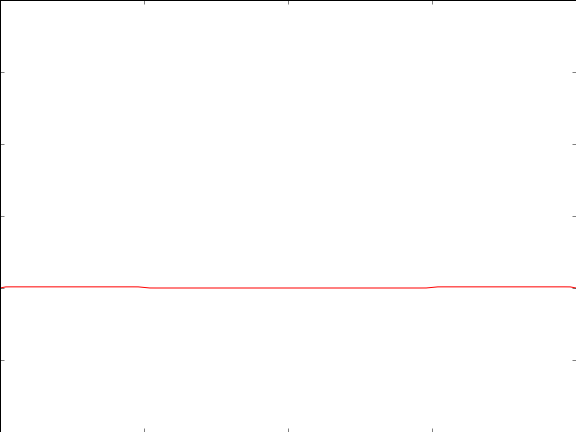
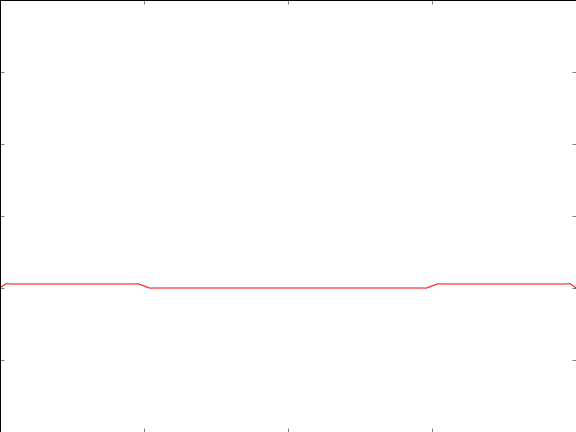
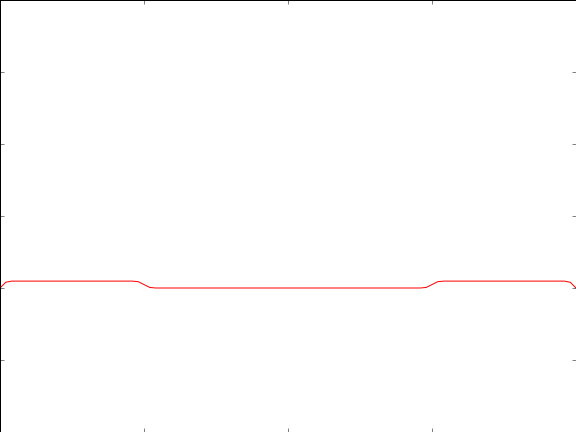
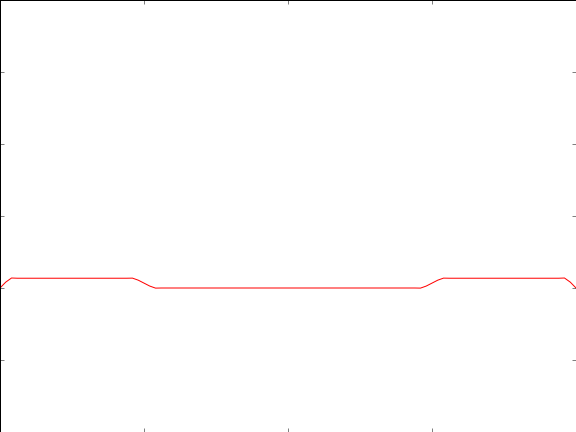
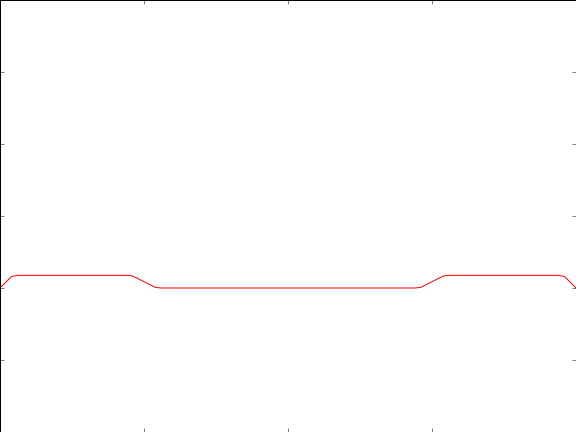
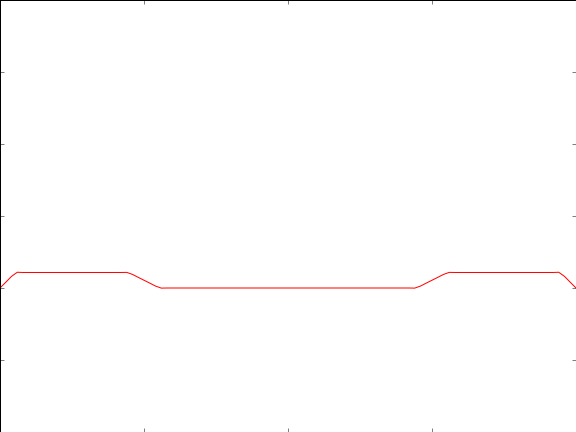
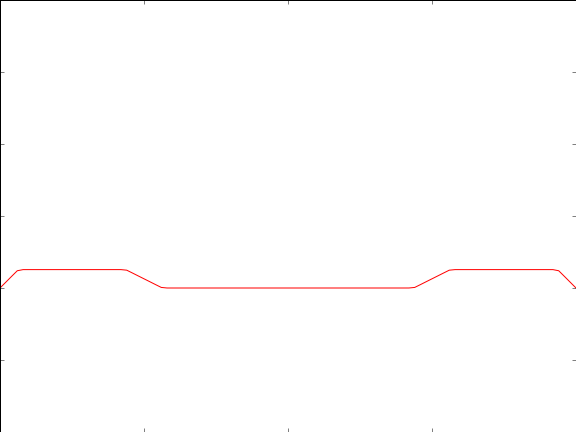
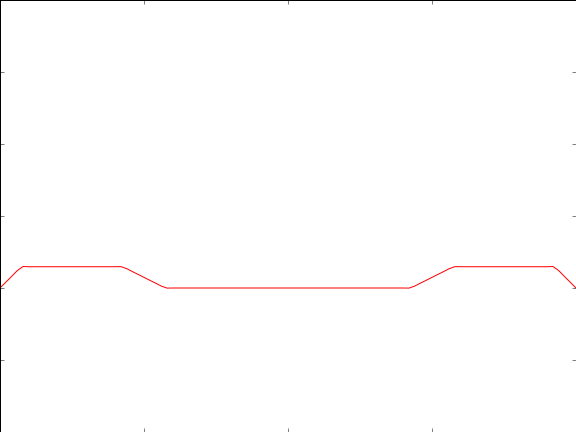
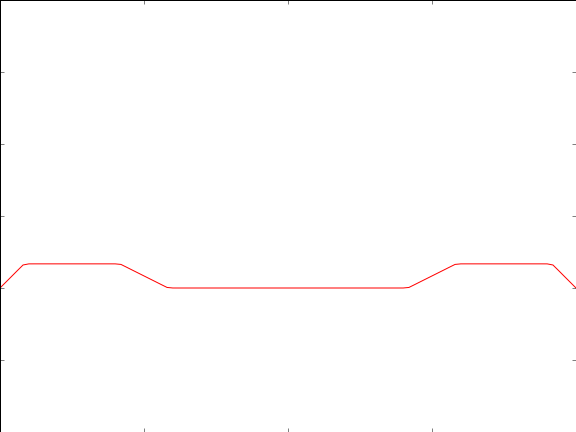
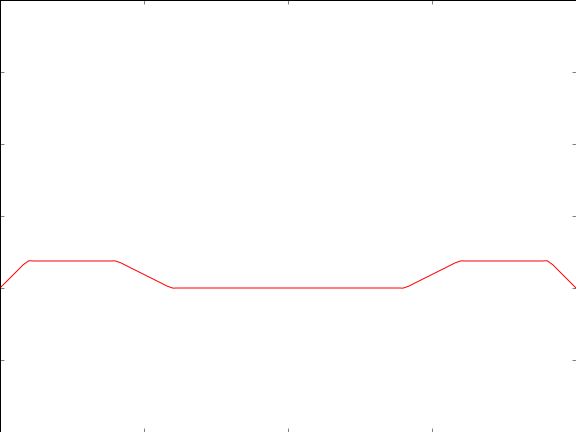
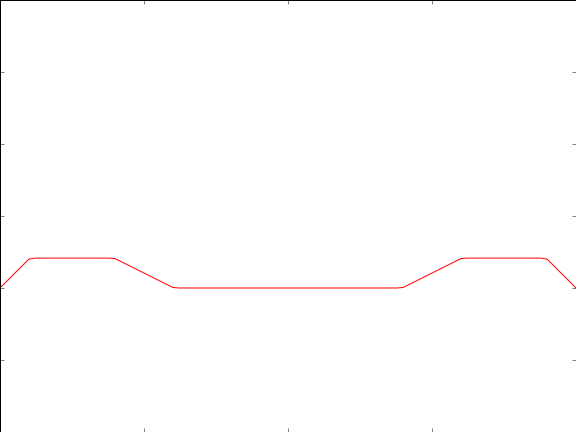
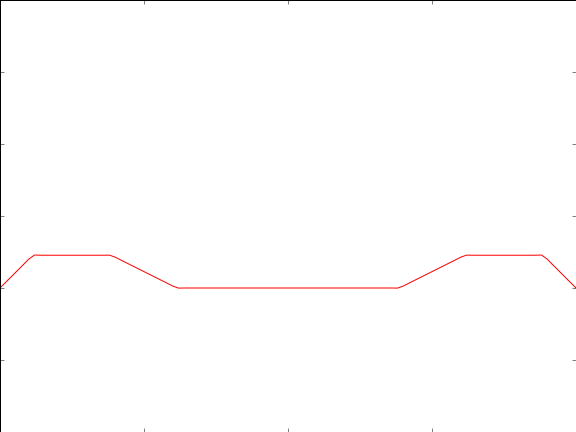
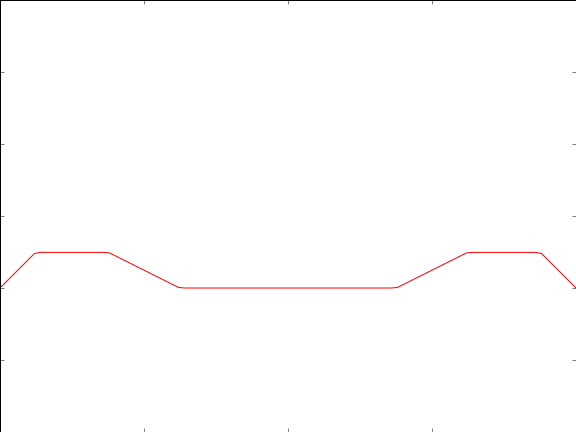
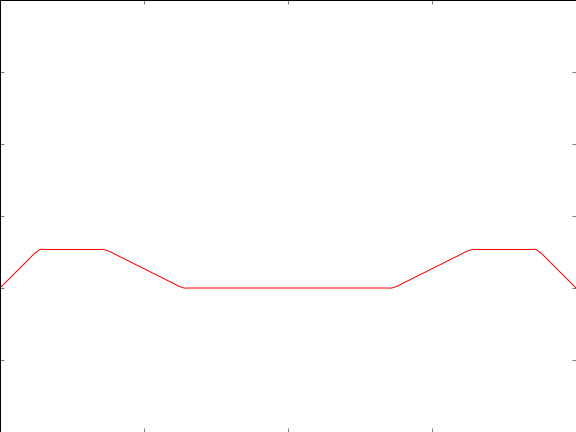
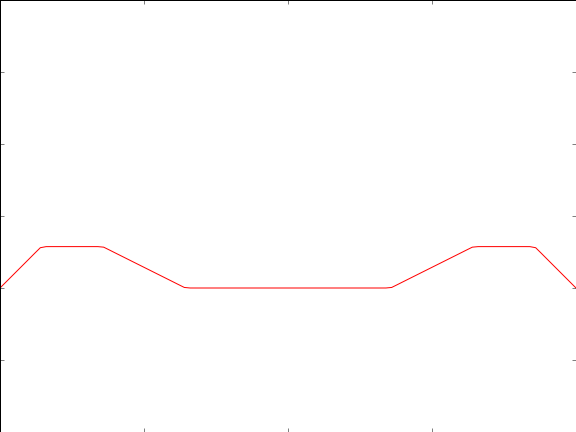
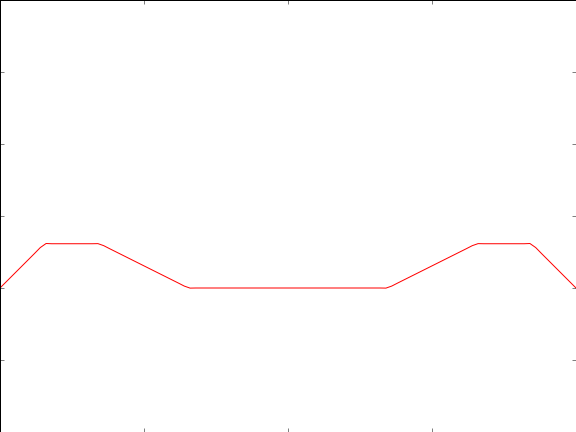
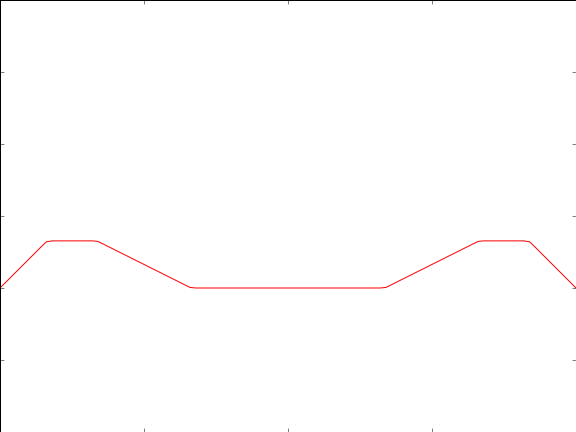
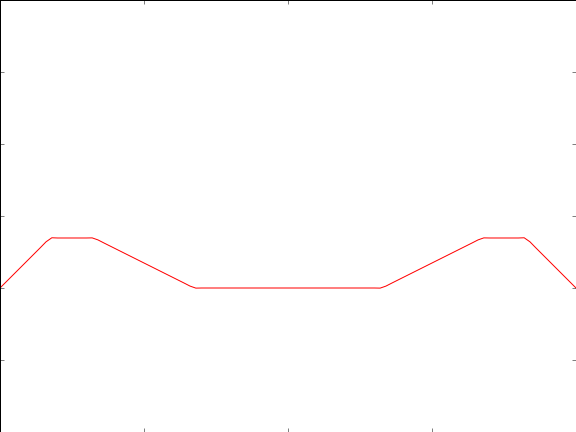
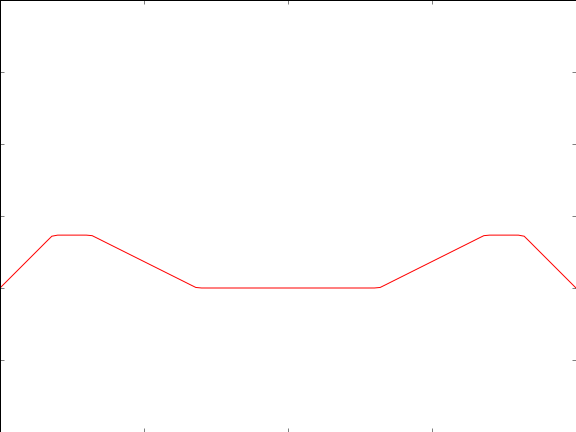
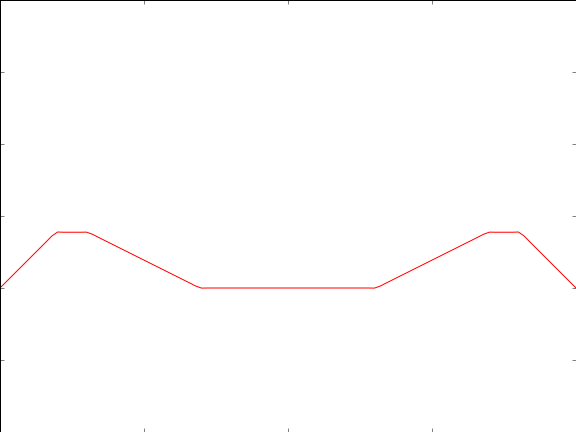
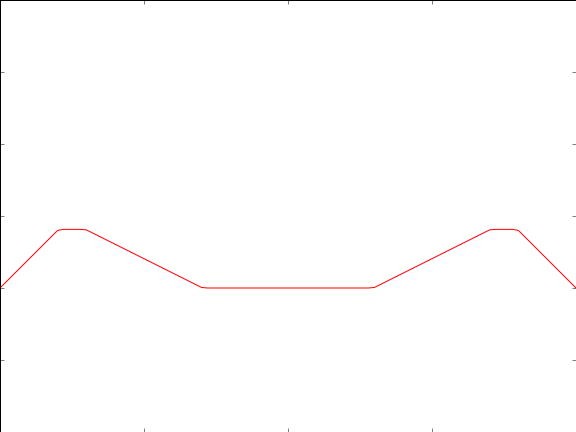
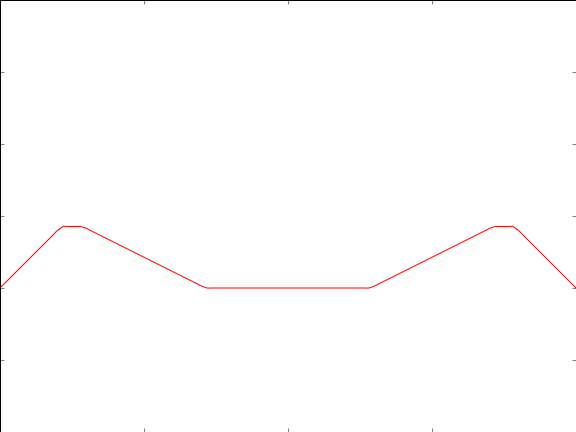
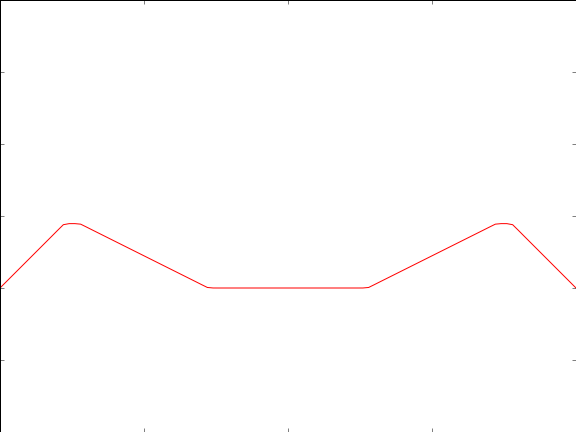
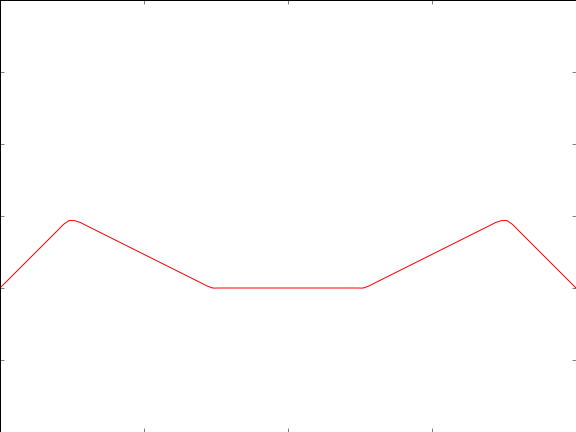
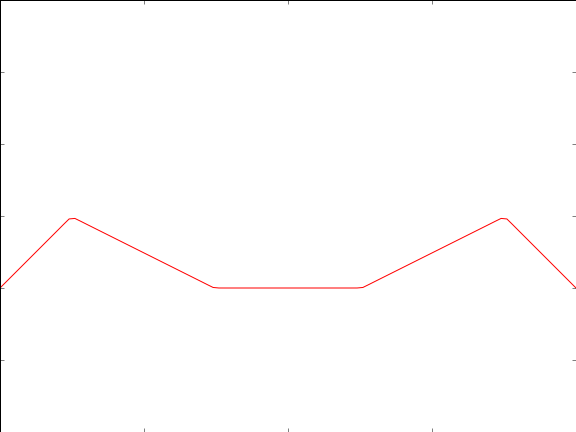
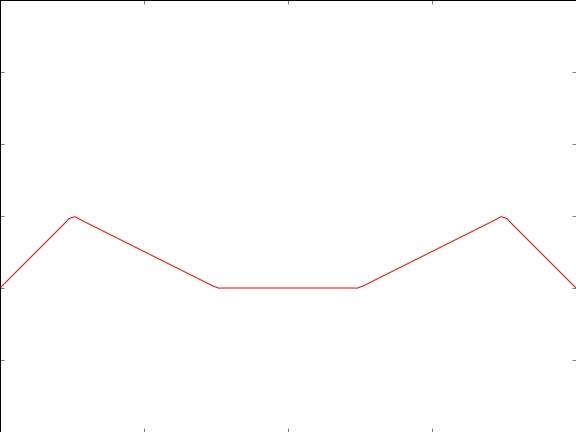
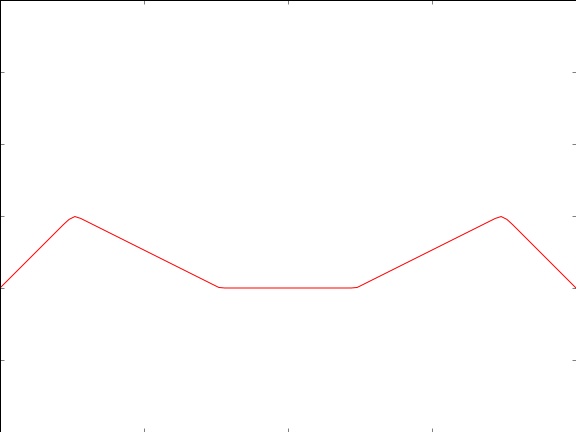
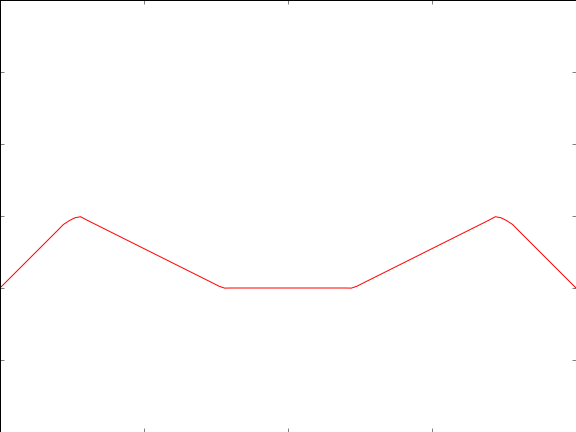
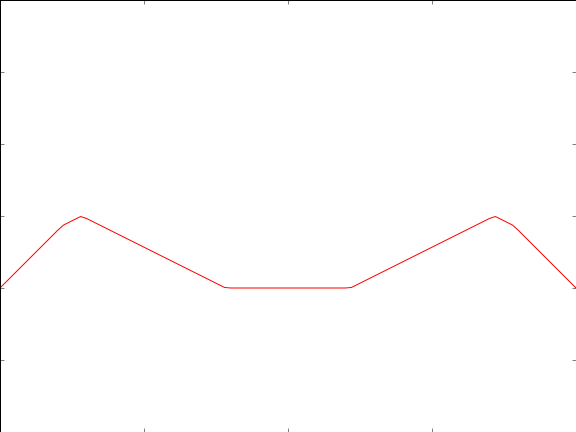
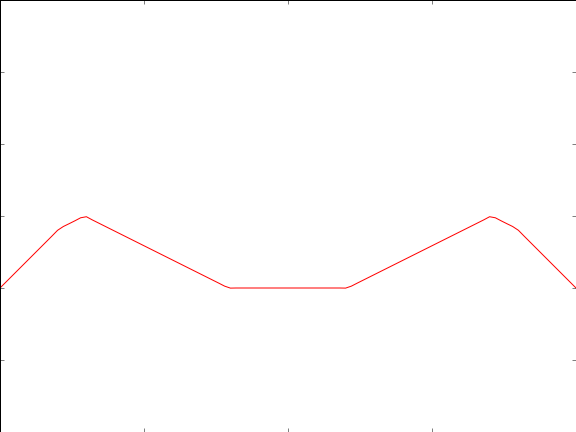
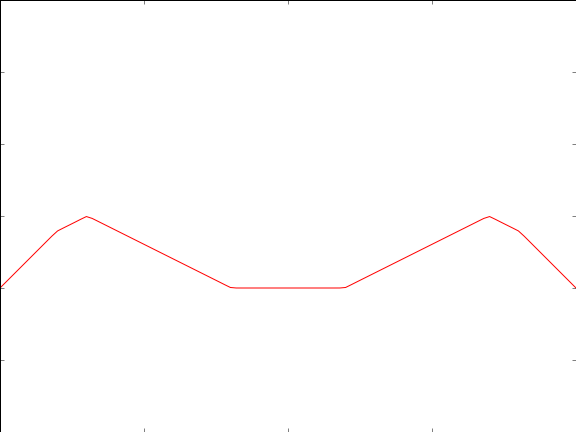
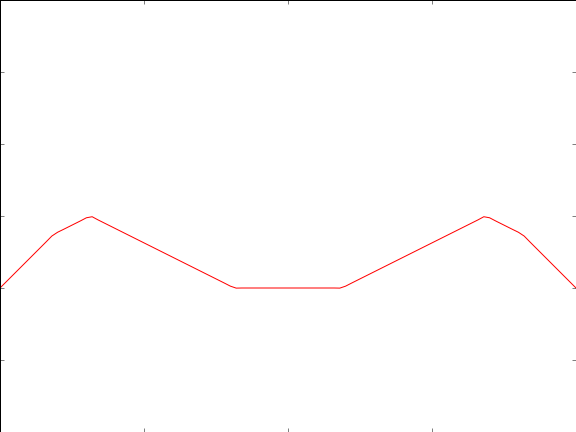
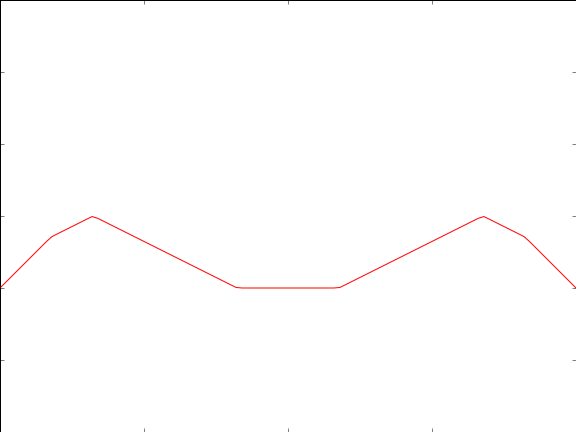
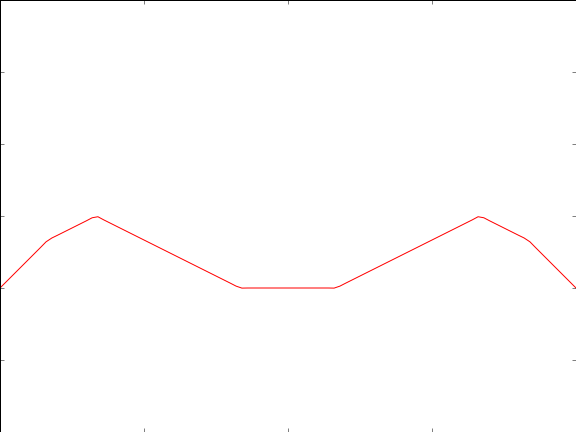
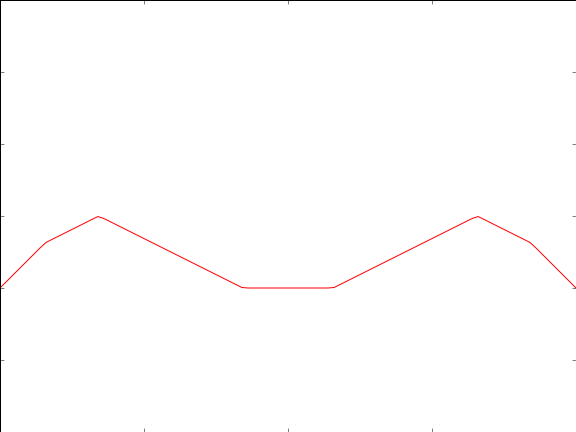
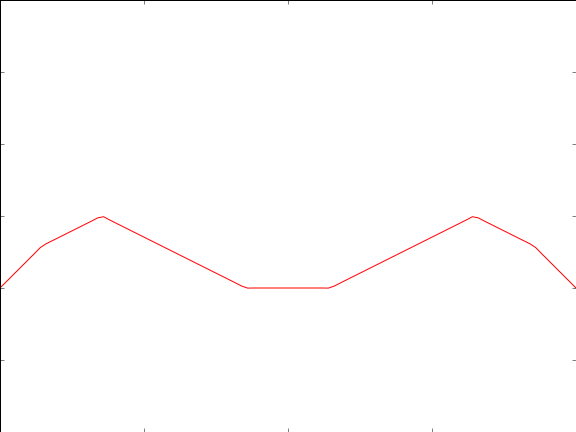
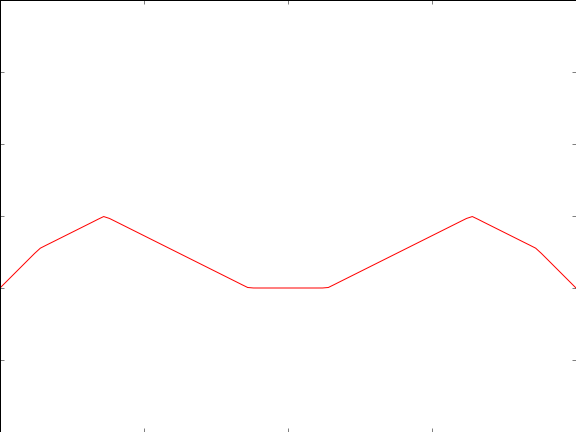
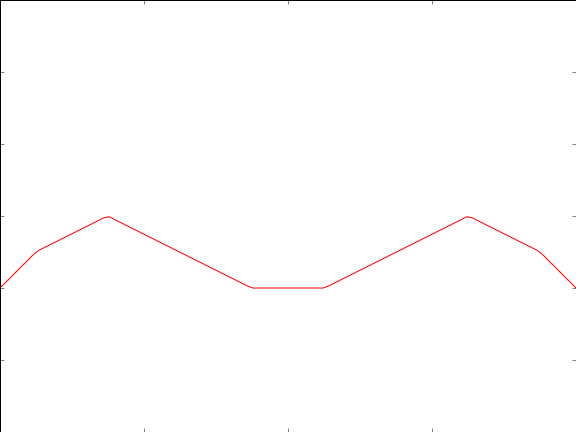
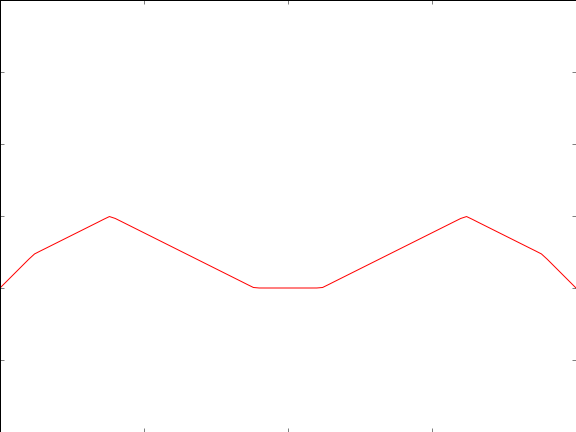
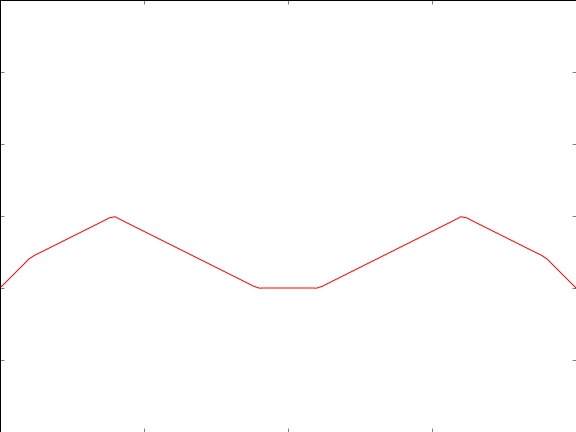
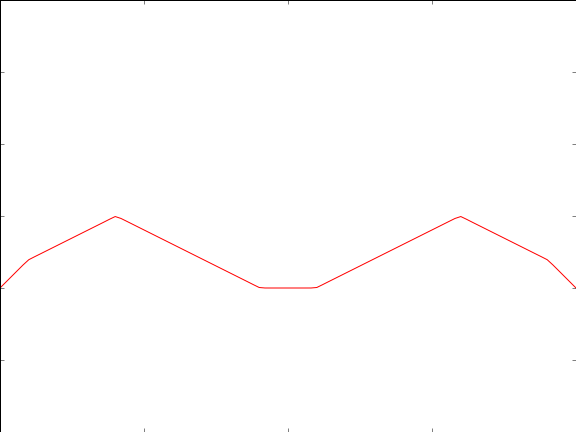
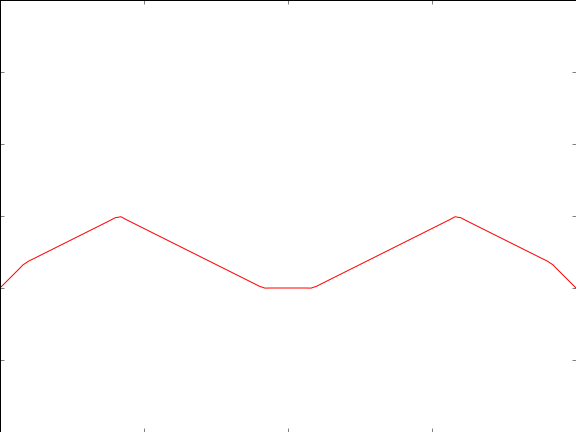
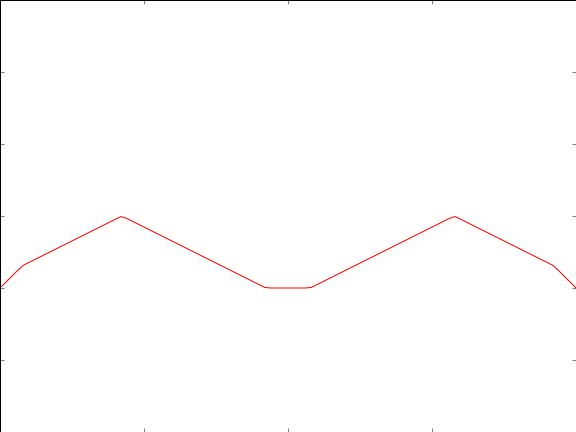
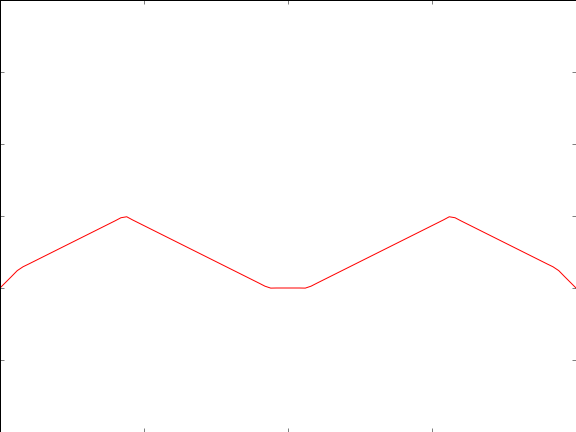
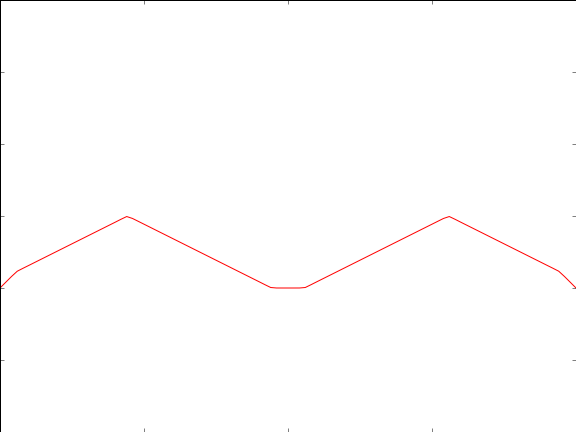
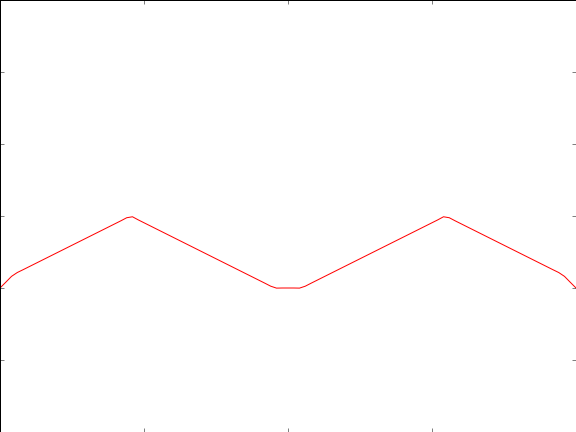
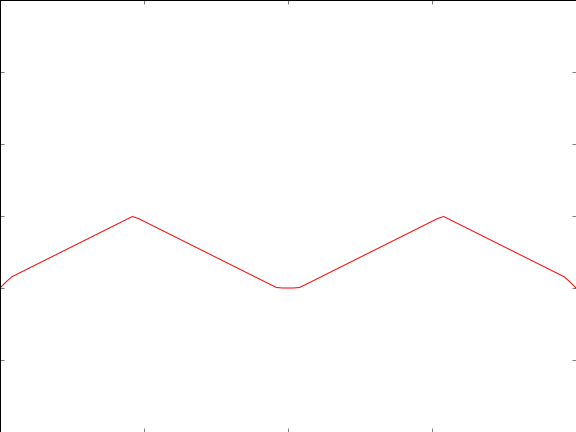
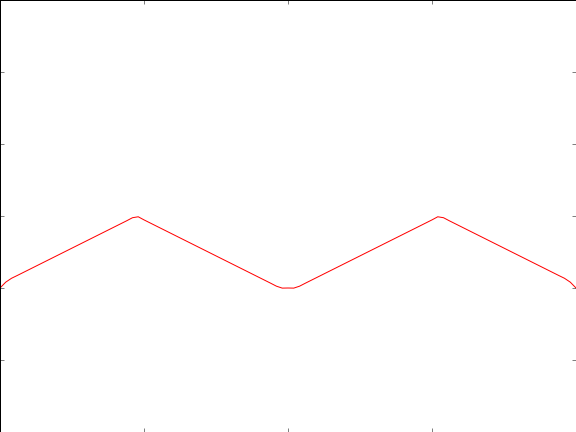

In [56]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[i], 'r') #, x, result[1][i], 'b')
    axis.axis([a, b, -1, 2])

def init():
    axis.plot(x, result[0], 'r') #, x, result[1][0], 'b')
    axis.axis([a, b, -1, 2])


animation.FuncAnimation(fig, animate, frames=len(result), 
                        init_func=init,interval=300, blit=False)

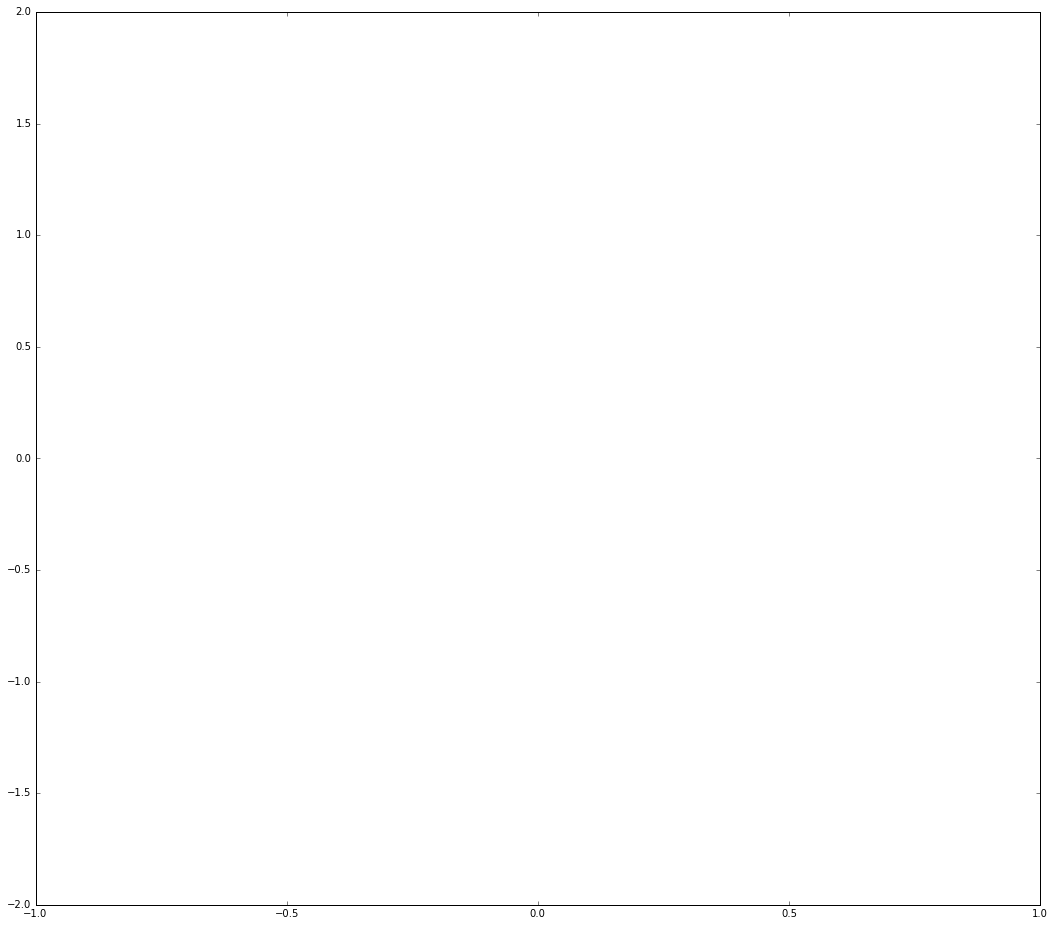

In [57]:
from matplotlib.animation import ArtistAnimation
fig = plt.figure(figsize=(18, 16)) 
ax  = fig.add_subplot(111) 

ax.set_xlim(-1, 1)
ax.set_ylim(-2,2)

images = []
for i in xrange(2*time):
    line, = ax.plot(x,result[i], '-')
    images.append((line,))
line_anim = ArtistAnimation(fig, images, interval=200, blit=False)
line_anim.save('7.mp4')